In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.applications.densenet import DenseNet121
import cv2
import math
import os
from glob import glob
from scipy import stats as s
from sklearn.externals import joblib 

Using TensorFlow backend.
C:\Users\HH TRADERS\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
base_model = DenseNet121(include_top=False, weights='imagenet')

In [3]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
________________________________________________________________________________________

__________________________________________________________________________________________________
conv2_block5_1_bn (BatchNormali (None, None, None, 1 512         conv2_block5_1_conv[0][0]        
__________________________________________________________________________________________________
conv2_block5_1_relu (Activation (None, None, None, 1 0           conv2_block5_1_bn[0][0]          
__________________________________________________________________________________________________
conv2_block5_2_conv (Conv2D)    (None, None, None, 3 36864       conv2_block5_1_relu[0][0]        
__________________________________________________________________________________________________
conv2_block5_concat (Concatenat (None, None, None, 2 0           conv2_block4_concat[0][0]        
                                                                 conv2_block5_2_conv[0][0]        
__________________________________________________________________________________________________
conv2_bloc

conv3_block4_1_conv (Conv2D)    (None, None, None, 1 28672       conv3_block4_0_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_bn (BatchNormali (None, None, None, 1 512         conv3_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_relu (Activation (None, None, None, 1 0           conv3_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_2_conv (Conv2D)    (None, None, None, 3 36864       conv3_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_concat (Concatenat (None, None, None, 2 0           conv3_block3_concat[0][0]        
                                                                 conv3_block4_2_conv[0][0]        
__________

__________________________________________________________________________________________________
conv3_block9_concat (Concatenat (None, None, None, 4 0           conv3_block8_concat[0][0]        
                                                                 conv3_block9_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block10_0_bn (BatchNormal (None, None, None, 4 1664        conv3_block9_concat[0][0]        
__________________________________________________________________________________________________
conv3_block10_0_relu (Activatio (None, None, None, 4 0           conv3_block10_0_bn[0][0]         
__________________________________________________________________________________________________
conv3_block10_1_conv (Conv2D)   (None, None, None, 1 53248       conv3_block10_0_relu[0][0]       
__________________________________________________________________________________________________
conv3_bloc

conv4_block2_2_conv (Conv2D)    (None, None, None, 3 36864       conv4_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block2_concat (Concatenat (None, None, None, 3 0           conv4_block1_concat[0][0]        
                                                                 conv4_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_0_bn (BatchNormali (None, None, None, 3 1280        conv4_block2_concat[0][0]        
__________________________________________________________________________________________________
conv4_block3_0_relu (Activation (None, None, None, 3 0           conv4_block3_0_bn[0][0]          
__________________________________________________________________________________________________
conv4_block3_1_conv (Conv2D)    (None, None, None, 1 40960       conv4_block3_0_relu[0][0]        
__________

conv4_block8_0_relu (Activation (None, None, None, 4 0           conv4_block8_0_bn[0][0]          
__________________________________________________________________________________________________
conv4_block8_1_conv (Conv2D)    (None, None, None, 1 61440       conv4_block8_0_relu[0][0]        
__________________________________________________________________________________________________
conv4_block8_1_bn (BatchNormali (None, None, None, 1 512         conv4_block8_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block8_1_relu (Activation (None, None, None, 1 0           conv4_block8_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block8_2_conv (Conv2D)    (None, None, None, 3 36864       conv4_block8_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv4_block13_2_conv (Conv2D)   (None, None, None, 3 36864       conv4_block13_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block13_concat (Concatena (None, None, None, 6 0           conv4_block12_concat[0][0]       
                                                                 conv4_block13_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block14_0_bn (BatchNormal (None, None, None, 6 2688        conv4_block13_concat[0][0]       
__________________________________________________________________________________________________
conv4_block14_0_relu (Activatio (None, None, None, 6 0           conv4_block14_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv4_block19_0_relu (Activatio (None, None, None, 8 0           conv4_block19_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_block19_1_conv (Conv2D)   (None, None, None, 1 106496      conv4_block19_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_block19_1_bn (BatchNormal (None, None, None, 1 512         conv4_block19_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block19_1_relu (Activatio (None, None, None, 1 0           conv4_block19_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block19_2_conv (Conv2D)   (None, None, None, 3 36864       conv4_block19_1_relu[0][0]       
__________

conv4_block24_1_relu (Activatio (None, None, None, 1 0           conv4_block24_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block24_2_conv (Conv2D)   (None, None, None, 3 36864       conv4_block24_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block24_concat (Concatena (None, None, None, 1 0           conv4_block23_concat[0][0]       
                                                                 conv4_block24_2_conv[0][0]       
__________________________________________________________________________________________________
pool4_bn (BatchNormalization)   (None, None, None, 1 4096        conv4_block24_concat[0][0]       
__________________________________________________________________________________________________
pool4_relu (Activation)         (None, None, None, 1 0           pool4_bn[0][0]                   
__________

__________________________________________________________________________________________________
conv5_block5_1_relu (Activation (None, None, None, 1 0           conv5_block5_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block5_2_conv (Conv2D)    (None, None, None, 3 36864       conv5_block5_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block5_concat (Concatenat (None, None, None, 6 0           conv5_block4_concat[0][0]        
                                                                 conv5_block5_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block6_0_bn (BatchNormali (None, None, None, 6 2688        conv5_block5_concat[0][0]        
__________________________________________________________________________________________________
conv5_bloc

__________________________________________________________________________________________________
conv5_block11_0_bn (BatchNormal (None, None, None, 8 3328        conv5_block10_concat[0][0]       
__________________________________________________________________________________________________
conv5_block11_0_relu (Activatio (None, None, None, 8 0           conv5_block11_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block11_1_conv (Conv2D)   (None, None, None, 1 106496      conv5_block11_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_bn (BatchNormal (None, None, None, 1 512         conv5_block11_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_relu (Activatio (None, None, None, 1 0           conv5_block11_1_bn[0][0]         
__________

conv5_block16_1_bn (BatchNormal (None, None, None, 1 512         conv5_block16_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block16_1_relu (Activatio (None, None, None, 1 0           conv5_block16_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block16_2_conv (Conv2D)   (None, None, None, 3 36864       conv5_block16_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block16_concat (Concatena (None, None, None, 1 0           conv5_block15_concat[0][0]       
                                                                 conv5_block16_2_conv[0][0]       
__________________________________________________________________________________________________
bn (BatchNormalization)         (None, None, None, 1 4096        conv5_block16_concat[0][0]       
__________

In [4]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(50176,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(51, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              51381248  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [6]:
# loading the trained weights
model.load_weights("../Models/weightDenseNet121_OF.hdf5")

In [7]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [8]:
location='../data/test'
classes=[]
videos=[]
test=pd.DataFrame()
for foldername in sorted(os.listdir(location)):
    classes.append(foldername)
    for files in sorted(os.listdir(location+'/'+foldername)):
        videos.append(foldername+'/'+files)
test['video_name']=videos
print(classes)
test_videos=test['video_name']
test.head()

['brush_hair', 'cartwheel', 'catch', 'chew', 'clap', 'climb', 'climb_stairs', 'dive', 'draw_sword', 'dribble', 'drink', 'eat', 'fall_floor', 'fencing', 'flic_flac', 'golf', 'handstand', 'hit', 'hug', 'jump', 'kick', 'kick_ball', 'kiss', 'laugh', 'pick', 'pour', 'pullup', 'punch', 'push', 'pushup', 'ride_bike', 'ride_horse', 'run', 'shake_hands', 'shoot_ball', 'shoot_bow', 'shoot_gun', 'sit', 'situp', 'smile', 'smoke', 'somersault', 'stand', 'swing_baseball', 'sword', 'sword_exercise', 'talk', 'throw', 'turn', 'walk', 'wave']


,video_name
0,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
1,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
2,brush_hair/April_09_brush_hair_u_nm_np1_ba_goo...
3,brush_hair/Blonde_being_brushed_brush_hair_f_n...
4,brush_hair/Blonde_being_brushed_brush_hair_u_c...


In [9]:
# creating the tags
train = pd.read_csv('../data/train_OF.csv')
y = train['class']
y = pd.get_dummies(y)

In [10]:
# creating two lists to store predicted and actual tags
predict = []
actual = []

# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
    count = 0
    videoFile = test_videos[i]
    print('../data/test/'+videoFile)
    cap = cv2.VideoCapture('../data/test/'+videoFile.split(' ')[0].split('/')[0]+'/'+videoFile.split(' ')[0].split('/')[1])   # capturing the video from the given path
    
    frameRate = cap.get(5) #frame rate
#    print(frameRate)
    frameRate=frameRate/2
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#    print(length)
    
    ret, frame1 = cap.read()  
    prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(frame1)
    hsv[...,1] = 255
    x=1
    
    # removing all other files from the temp folder
    files = glob('../data/temp/*')
    for f in files:
        os.remove(f)
    
    #Iterate through every frame
    while(x<length):        
        count = count + 1        
        frameId = cap.get(1) #current frame number
        ret, frame2 = cap.read()
        x+=1
        
        if (ret != True):
            break
            
        #Select frames according to frame rate
        if (frameId % math.floor(frameRate) == 0):   
            # storing the frames in a new folder named train_1
            next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
            flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
            hsv[...,0] = ang*180/np.pi/2
            hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
            rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
            
            filename ='../data/temp/' + "_flow%d.jpg" % count;
            cv2.imwrite(filename, rgb)
    cap.release()
    
    # reading all the frames from temp folder
    images = glob("../data/temp/*.jpg")
    
    prediction_images = []
    for i in range(len(images)):
        img = image.load_img(images[i], target_size=(224,224,3))
        img = image.img_to_array(img)
        img=img/255
        prediction_images.append(img)

    # converting all the frames for a test video into numpy array
    prediction_images = np.array(prediction_images)
    print(prediction_images.shape)
    # extracting features using pre-trained model
    prediction_images = base_model.predict(prediction_images)
    # converting features in one dimensional array
    prediction_images = prediction_images.reshape(prediction_images.shape[0], 7*7*1024)
    # predicting tags for each array
    prediction = model.predict_classes(prediction_images)
    # appending the mode of predictions in predict list to assign the tag to the video
    predict.append(y.columns.values[s.mode(prediction)[0][0]])
    # appending the actual tag of the video
    actual.append(videoFile.split('/')[0])

  0%|          | 0/1530 [00:00<?, ?it/s]

../data/test/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0.avi
(27, 224, 224, 3)


  0%|          | 1/1530 [00:50<21:35:16, 50.83s/it]

../data/test/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_1.avi
(26, 224, 224, 3)


  0%|          | 2/1530 [01:07<17:12:12, 40.53s/it]

../data/test/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_2.avi
(21, 224, 224, 3)


  0%|          | 3/1530 [01:20<13:45:19, 32.43s/it]

../data/test/brush_hair/Blonde_being_brushed_brush_hair_f_nm_np2_ri_med_0.avi
(5, 224, 224, 3)


  0%|          | 4/1530 [01:23<9:58:27, 23.53s/it] 

../data/test/brush_hair/Blonde_being_brushed_brush_hair_u_cm_np2_ri_med_1.avi
(18, 224, 224, 3)


  0%|          | 5/1530 [01:35<8:29:08, 20.03s/it]

../data/test/brush_hair/Brushing_Hair_with_Beth_brush_hair_h_nm_np1_le_goo_0.avi
(14, 224, 224, 3)


  0%|          | 6/1530 [01:44<7:02:54, 16.65s/it]

../data/test/brush_hair/Brushing_Hair_with_Beth_brush_hair_u_nm_np1_fr_goo_1.avi
(9, 224, 224, 3)


  0%|          | 7/1530 [01:49<5:39:13, 13.36s/it]

../data/test/brush_hair/Brushing_Hair_with_Beth_brush_hair_u_nm_np1_fr_goo_2.avi
(20, 224, 224, 3)


  1%|          | 8/1530 [02:03<5:37:01, 13.29s/it]

../data/test/brush_hair/Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_fr_goo_0.avi
(21, 224, 224, 3)


  1%|          | 9/1530 [02:16<5:40:34, 13.43s/it]

../data/test/brush_hair/Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_le_goo_1.avi
(9, 224, 224, 3)


  1%|          | 10/1530 [02:22<4:42:10, 11.14s/it]

../data/test/brush_hair/Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_le_goo_2.avi
(17, 224, 224, 3)


  1%|          | 11/1530 [02:32<4:36:03, 10.90s/it]

../data/test/brush_hair/Brushing_my_waist_lenth_hair_brush_hair_u_nm_np1_ba_goo_0.avi
(14, 224, 224, 3)


  1%|          | 12/1530 [02:42<4:22:39, 10.38s/it]

../data/test/brush_hair/Brushing_my_waist_lenth_hair_brush_hair_u_nm_np1_ba_goo_1.avi
(11, 224, 224, 3)


  1%|          | 13/1530 [02:49<3:58:27,  9.43s/it]

../data/test/brush_hair/Brushing_my_waist_lenth_hair_brush_hair_u_nm_np1_ba_goo_2.avi
(34, 224, 224, 3)


  1%|          | 14/1530 [03:11<5:35:28, 13.28s/it]

../data/test/brush_hair/Lektion_3__-_Das_Haare_b_rsten_brush_hair_h_nm_np1_fr_med_1.avi
(6, 224, 224, 3)


  1%|          | 15/1530 [03:14<4:17:39, 10.20s/it]

../data/test/brush_hair/Lektion_3__-_Das_Haare_b_rsten_brush_hair_h_nm_np1_fr_med_2.avi
(24, 224, 224, 3)


  1%|          | 16/1530 [03:32<5:13:18, 12.42s/it]

../data/test/brush_hair/Lektion_3__-_Das_Haare_b_rsten_brush_hair_h_nm_np1_le_med_0.avi
(22, 224, 224, 3)


  1%|          | 17/1530 [03:46<5:28:42, 13.04s/it]

../data/test/brush_hair/Slave_brush_my_hair_brush_hair_u_cm_np2_le_goo_0.avi
(30, 224, 224, 3)


  1%|          | 18/1530 [04:05<6:14:36, 14.87s/it]

../data/test/brush_hair/Slave_brush_my_hair_brush_hair_u_cm_np2_le_goo_1.avi
(28, 224, 224, 3)


  1%|          | 19/1530 [04:23<6:38:24, 15.82s/it]

../data/test/brush_hair/Slave_brush_my_hair_brush_hair_u_cm_np2_le_goo_2.avi
(23, 224, 224, 3)


  1%|▏         | 20/1530 [04:38<6:31:34, 15.56s/it]

../data/test/brush_hair/Trannydude___Brushing_SyntheticHair___OhNOES!__those_fukin_knots!_brush_hair_u_nm_np1_fr_goo_0.avi
(17, 224, 224, 3)


  1%|▏         | 21/1530 [04:50<6:00:34, 14.34s/it]

../data/test/brush_hair/Trannydude___Brushing_SyntheticHair___OhNOES!__those_fukin_knots!_brush_hair_u_nm_np1_fr_goo_1.avi
(15, 224, 224, 3)


  1%|▏         | 22/1530 [04:59<5:23:04, 12.85s/it]

../data/test/brush_hair/Trannydude___Brushing_SyntheticHair___OhNOES!__those_fukin_knots!_brush_hair_u_nm_np1_fr_goo_2.avi
(27, 224, 224, 3)


  2%|▏         | 23/1530 [05:17<6:00:45, 14.36s/it]

../data/test/brush_hair/brushing_hair_brush_hair_f_cm_np2_ri_goo_0.avi
(13, 224, 224, 3)


  2%|▏         | 24/1530 [05:25<5:14:43, 12.54s/it]

../data/test/brush_hair/brushing_hair_brush_hair_f_nm_np2_ba_goo_2.avi
(10, 224, 224, 3)


  2%|▏         | 25/1530 [05:32<4:26:33, 10.63s/it]

../data/test/brush_hair/brushing_hair_brush_hair_f_nm_np2_ba_goo_4.avi
(11, 224, 224, 3)


  2%|▏         | 26/1530 [05:38<3:58:10,  9.50s/it]

../data/test/brush_hair/brushing_hair_brush_hair_f_nm_np2_ri_goo_1.avi
(15, 224, 224, 3)


  2%|▏         | 27/1530 [05:48<3:56:18,  9.43s/it]

../data/test/brush_hair/brushing_hair_brush_hair_f_nm_np2_ri_goo_3.avi
(10, 224, 224, 3)


  2%|▏         | 28/1530 [05:54<3:32:32,  8.49s/it]

../data/test/brush_hair/indianrapunzels_com---silky_long_hair_brushing_brush_hair_u_cm_np2_fr_goo_0.avi
(32, 224, 224, 3)


  2%|▏         | 29/1530 [06:15<5:06:16, 12.24s/it]

../data/test/brush_hair/indianrapunzels_com---silky_long_hair_brushing_brush_hair_u_cm_np2_ri_goo_1.avi
(20, 224, 224, 3)


  2%|▏         | 30/1530 [06:29<5:16:33, 12.66s/it]

../data/test/cartwheel/Bodenturnen_cartwheel_f_cm_np1_le_med_3.avi
(8, 224, 224, 3)


  2%|▏         | 31/1530 [06:34<4:20:13, 10.42s/it]

../data/test/cartwheel/Bodenturnen_cartwheel_f_cm_np1_ri_med_2.avi
(6, 224, 224, 3)


  2%|▏         | 32/1530 [06:38<3:30:22,  8.43s/it]

../data/test/cartwheel/Bodenturnen_cartwheel_f_cm_np1_ri_med_4.avi
(5, 224, 224, 3)


  2%|▏         | 33/1530 [06:41<2:51:00,  6.85s/it]

../data/test/cartwheel/Cartwheel_Contest_cartwheel_f_cm_np1_fr_med_2.avi
(5, 224, 224, 3)


  2%|▏         | 34/1530 [06:44<2:23:20,  5.75s/it]

../data/test/cartwheel/Cartwheel_Contest_cartwheel_f_cm_np1_fr_med_3.avi
(5, 224, 224, 3)


  2%|▏         | 35/1530 [06:47<2:04:02,  4.98s/it]

../data/test/cartwheel/Cartwheel_Contest_cartwheel_f_cm_np2_fr_med_0.avi
(4, 224, 224, 3)


  2%|▏         | 36/1530 [06:50<1:46:18,  4.27s/it]

../data/test/cartwheel/Cartwheel_Contest_cartwheel_f_cm_np2_fr_med_1.avi
(5, 224, 224, 3)


  2%|▏         | 37/1530 [06:53<1:37:56,  3.94s/it]

../data/test/cartwheel/Handstandk_nig_cartwheel_f_cm_np1_le_med_0.avi
(3, 224, 224, 3)


  2%|▏         | 38/1530 [06:55<1:21:59,  3.30s/it]

../data/test/cartwheel/Handstandk_nig_cartwheel_f_cm_np1_ri_med_4.avi
(5, 224, 224, 3)


  3%|▎         | 39/1530 [06:58<1:19:52,  3.21s/it]

../data/test/cartwheel/How_to_Do_an_Aerial_-_Aerial_vs__Cartwheel_cartwheel_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


  3%|▎         | 40/1530 [07:01<1:18:22,  3.16s/it]

../data/test/cartwheel/How_to_Do_an_Aerial_-_Aerial_vs__Cartwheel_cartwheel_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)


  3%|▎         | 41/1530 [07:04<1:16:45,  3.09s/it]

../data/test/cartwheel/How_to_do_a_Cartwheel_cartwheel_f_nm_np1_le_med_1.avi
(6, 224, 224, 3)


  3%|▎         | 42/1530 [07:07<1:21:16,  3.28s/it]

../data/test/cartwheel/How_to_do_a_Cartwheel_cartwheel_f_nm_np1_ri_med_0.avi
(6, 224, 224, 3)


  3%|▎         | 43/1530 [07:11<1:25:38,  3.46s/it]

../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_le_med_2.avi
(2, 224, 224, 3)


  3%|▎         | 44/1530 [07:13<1:10:12,  2.84s/it]

../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_le_med_5.avi
(2, 224, 224, 3)


  3%|▎         | 45/1530 [07:14<59:25,  2.40s/it]  

../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_ri_med_0.avi
(2, 224, 224, 3)


  3%|▎         | 46/1530 [07:15<51:17,  2.07s/it]

../data/test/cartwheel/Jessica_Heinz_-_Leverkusen_Cup_2006__floor_routine_cartwheel_f_cm_np1_ri_med_4.avi
(2, 224, 224, 3)


  3%|▎         | 47/1530 [07:17<45:27,  1.84s/it]

../data/test/cartwheel/Mirco_turnt_die_5_2_LAD___Schraube_rw_cartwheel_f_cm_np1_le_med_2.avi
(2, 224, 224, 3)


  3%|▎         | 48/1530 [07:18<41:32,  1.68s/it]

../data/test/cartwheel/Mirco_turnt_die_5_2_LAD___Schraube_rw_cartwheel_f_cm_np1_ri_med_0.avi
(2, 224, 224, 3)


  3%|▎         | 49/1530 [07:19<38:12,  1.55s/it]

../data/test/cartwheel/Mirco_turnt_die_5_2_LAD___Schraube_rw_cartwheel_f_cm_np1_ri_med_1.avi
(2, 224, 224, 3)


  3%|▎         | 50/1530 [07:20<36:02,  1.46s/it]

../data/test/cartwheel/Mirco_turnt_die_5_2_LAD___Schraube_rw_cartwheel_f_cm_np1_ri_med_3.avi
(2, 224, 224, 3)


  3%|▎         | 51/1530 [07:22<34:17,  1.39s/it]

../data/test/cartwheel/Monica_cartwheel_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


  3%|▎         | 52/1530 [07:25<48:10,  1.96s/it]

../data/test/cartwheel/Monikas_Staatsexamen__Turnen_cartwheel_f_cm_np1_le_med_3.avi
(5, 224, 224, 3)


  3%|▎         | 53/1530 [07:28<57:31,  2.34s/it]

../data/test/cartwheel/Monikas_Staatsexamen__Turnen_cartwheel_f_cm_np1_ri_med_4.avi
(5, 224, 224, 3)


  4%|▎         | 54/1530 [07:31<1:01:55,  2.52s/it]

../data/test/cartwheel/Projekt_SPOHO_2008_-_27_02_08_-_Training-_Bodenk_r_3_cartwheel_f_cm_np1_le_med_3.avi
(5, 224, 224, 3)


  4%|▎         | 55/1530 [07:34<1:05:03,  2.65s/it]

../data/test/cartwheel/Turnk_r_Pippi_Michel_cartwheel_f_cm_np2_le_med_6.avi
(5, 224, 224, 3)


  4%|▎         | 56/1530 [07:37<1:07:02,  2.73s/it]

../data/test/cartwheel/Zwei_hoffnungslose_Pflegef_lle_beim_Turnen(Part4)_cartwheel_f_cm_np1_ri_bad_0.avi
(6, 224, 224, 3)


  4%|▎         | 57/1530 [07:41<1:14:58,  3.05s/it]

../data/test/cartwheel/anna_turnen_cartwheel_f_cm_np1_le_bad_0.avi
(5, 224, 224, 3)


  4%|▍         | 58/1530 [07:44<1:15:36,  3.08s/it]

../data/test/cartwheel/gimnasia_cartwheel_f_cm_np1_le_med_3.avi
(7, 224, 224, 3)


  4%|▍         | 59/1530 [07:48<1:24:52,  3.46s/it]

../data/test/cartwheel/park_cartwheel_f_cm_np1_ba_med_0.avi
(5, 224, 224, 3)


  4%|▍         | 60/1530 [07:51<1:22:25,  3.36s/it]

../data/test/catch/Finding_Forrester_3_catch_f_nm_np2_ba_med_7.avi
(5, 224, 224, 3)


  4%|▍         | 61/1530 [07:55<1:21:11,  3.32s/it]

../data/test/catch/Finding_Forrester_3_catch_u_cm_np1_fr_goo_11.avi
(2, 224, 224, 3)


  4%|▍         | 62/1530 [07:56<1:06:44,  2.73s/it]

../data/test/catch/Frisbee_catch_f_cm_np1_fr_bad_2.avi
(2, 224, 224, 3)


  4%|▍         | 63/1530 [07:57<56:31,  2.31s/it]  

../data/test/catch/Frisbee_catch_f_cm_np1_ri_med_0.avi
(3, 224, 224, 3)


  4%|▍         | 64/1530 [07:59<52:46,  2.16s/it]

../data/test/catch/Frisbee_catch_f_cm_np1_ri_med_1.avi
(3, 224, 224, 3)


  4%|▍         | 65/1530 [08:01<50:20,  2.06s/it]

../data/test/catch/Goal_Keeping_Tips_catch_f_cm_np1_fr_med_0.avi
(4, 224, 224, 3)


  4%|▍         | 66/1530 [08:04<53:59,  2.21s/it]

../data/test/catch/Goal_Keeping_Tips_catch_f_cm_np1_fr_med_2.avi
(4, 224, 224, 3)


  4%|▍         | 67/1530 [08:06<55:43,  2.29s/it]

../data/test/catch/Goal_Keeping_Tips_catch_u_cm_np1_fr_med_1.avi
(3, 224, 224, 3)


  4%|▍         | 68/1530 [08:08<53:04,  2.18s/it]

../data/test/catch/Goal_Keeping_Tips_catch_u_cm_np1_fr_med_3.avi
(4, 224, 224, 3)


  5%|▍         | 69/1530 [08:10<54:58,  2.26s/it]

../data/test/catch/How_to_Play_Wide_Receiver_in_Football_-_How_to_Catch_a_High_Ball_in_Football_catch_f_nm_np1_ri_goo_0.avi
(2, 224, 224, 3)


  5%|▍         | 70/1530 [08:12<48:37,  2.00s/it]

../data/test/catch/How_to_Play_Wide_Receiver_in_Football_-_How_to_Catch_a_High_Ball_in_Football_catch_f_nm_np1_ri_med_1.avi
(3, 224, 224, 3)


  5%|▍         | 71/1530 [08:14<48:39,  2.00s/it]

../data/test/catch/Torwarttraining_catch_f_cm_np1_ba_bad_10.avi
(2, 224, 224, 3)


  5%|▍         | 72/1530 [08:15<43:09,  1.78s/it]

../data/test/catch/Torwarttraining_catch_f_cm_np1_ba_bad_8.avi
(1, 224, 224, 3)


  5%|▍         | 73/1530 [08:16<35:59,  1.48s/it]

../data/test/catch/Torwarttraining_catch_f_cm_np1_ba_bad_9.avi
(1, 224, 224, 3)


  5%|▍         | 74/1530 [08:17<30:26,  1.25s/it]

../data/test/catch/Torwarttraining_catch_f_cm_np1_le_bad_11.avi
(2, 224, 224, 3)


  5%|▍         | 75/1530 [08:18<30:40,  1.27s/it]

../data/test/catch/Torwarttraining_catch_f_cm_np1_le_bad_3.avi
(2, 224, 224, 3)


  5%|▍         | 76/1530 [08:19<30:34,  1.26s/it]

../data/test/catch/Torwarttraining_catch_f_cm_np1_le_bad_5.avi
(2, 224, 224, 3)


  5%|▌         | 77/1530 [08:20<30:19,  1.25s/it]

../data/test/catch/Torwarttraining_catch_u_cm_np1_fr_bad_4.avi
(1, 224, 224, 3)


  5%|▌         | 78/1530 [08:21<26:37,  1.10s/it]

../data/test/catch/Torwarttraining_catch_u_cm_np1_le_bad_6.avi
(2, 224, 224, 3)


  5%|▌         | 79/1530 [08:22<27:34,  1.14s/it]

../data/test/catch/Torwarttraining_catch_u_cm_np1_le_bad_7.avi
(2, 224, 224, 3)


  5%|▌         | 80/1530 [08:24<28:22,  1.17s/it]

../data/test/catch/Torwarttraining_catch_u_cm_np1_ri_med_0.avi
(2, 224, 224, 3)


  5%|▌         | 81/1530 [08:25<28:56,  1.20s/it]

../data/test/catch/Torwarttraining_catch_u_cm_np1_ri_med_1.avi
(2, 224, 224, 3)


  5%|▌         | 82/1530 [08:26<29:03,  1.20s/it]

../data/test/catch/Torwarttraining_catch_u_cm_np1_ri_med_2.avi
(2, 224, 224, 3)


  5%|▌         | 83/1530 [08:27<29:14,  1.21s/it]

../data/test/catch/torwart_de-Camp_2009_-_Hohe_B_lle_catch_f_cm_np1_ba_med_0.avi
(4, 224, 224, 3)


  5%|▌         | 84/1530 [08:30<40:49,  1.69s/it]

../data/test/catch/torwart_de-Camp_2009_-_Hohe_B_lle_catch_f_cm_np1_ba_med_1.avi
(3, 224, 224, 3)


  6%|▌         | 85/1530 [08:32<42:56,  1.78s/it]

../data/test/catch/torwart_de-Camp_2009_-_Hohe_B_lle_catch_f_cm_np1_ba_med_2.avi
(3, 224, 224, 3)


  6%|▌         | 86/1530 [08:34<43:51,  1.82s/it]

../data/test/catch/torwart_de_-_Torwarttraining_Werder_Bremen_catch_f_cm_np1_ba_bad_0.avi
(2, 224, 224, 3)


  6%|▌         | 87/1530 [08:35<39:41,  1.65s/it]

../data/test/catch/torwart_de_-_Torwarttraining_Werder_Bremen_catch_f_cm_np1_ba_bad_1.avi
(2, 224, 224, 3)


  6%|▌         | 88/1530 [08:36<36:46,  1.53s/it]

../data/test/catch/torwart_de_-_Torwarttraining_Werder_Bremen_catch_f_cm_np1_fr_bad_2.avi
(3, 224, 224, 3)


  6%|▌         | 89/1530 [08:38<39:04,  1.63s/it]

../data/test/catch/torwart_de_-_Torwarttraining_Werder_Bremen_catch_f_cm_np1_fr_bad_3.avi
(3, 224, 224, 3)


  6%|▌         | 90/1530 [08:40<40:28,  1.69s/it]

../data/test/chew/Big_League_Chew_chew_h_nm_np1_fr_goo_0.avi
(10, 224, 224, 3)


  6%|▌         | 91/1530 [08:47<1:14:27,  3.10s/it]

../data/test/chew/Big_League_Chew_chew_h_nm_np1_fr_goo_1.avi
(10, 224, 224, 3)


  6%|▌         | 92/1530 [08:53<1:34:54,  3.96s/it]

../data/test/chew/Big_League_Chew_chew_h_nm_np1_fr_goo_2.avi
(11, 224, 224, 3)


  6%|▌         | 93/1530 [08:59<1:54:51,  4.80s/it]

../data/test/chew/Bubble_Blowing_Bubble_Gum_chew_h_nm_np1_fr_bad_1.avi
(5, 224, 224, 3)


  6%|▌         | 94/1530 [09:03<1:44:16,  4.36s/it]

../data/test/chew/Bubble_Blowing_Bubble_Gum_chew_h_nm_np1_fr_bad_2.avi
(7, 224, 224, 3)


  6%|▌         | 95/1530 [09:07<1:45:10,  4.40s/it]

../data/test/chew/Bubble_gum!_XD_chew_h_cm_np1_fr_bad_2.avi
(5, 224, 224, 3)


  6%|▋         | 96/1530 [09:10<1:35:31,  4.00s/it]

../data/test/chew/Bubble_gum!_XD_chew_h_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


  6%|▋         | 97/1530 [09:13<1:29:47,  3.76s/it]

../data/test/chew/Bubble_gum!_XD_chew_h_cm_np1_fr_med_1.avi
(7, 224, 224, 3)


  6%|▋         | 98/1530 [09:18<1:36:14,  4.03s/it]

../data/test/chew/Dubble_bubble_compilation_-_all_on_8_pieces_chew_h_nm_np1_fr_med_0.avi
(4, 224, 224, 3)


  6%|▋         | 99/1530 [09:21<1:25:43,  3.59s/it]

../data/test/chew/Dubble_bubble_compilation_-_all_on_8_pieces_chew_h_nm_np1_fr_med_1.avi
(8, 224, 224, 3)


  7%|▋         | 100/1530 [09:26<1:35:18,  4.00s/it]

../data/test/chew/Fun_Chewing_Gum!_chew_h_nm_np1_fr_med_0.avi
(6, 224, 224, 3)


  7%|▋         | 101/1530 [09:29<1:34:25,  3.96s/it]

../data/test/chew/Fun_Chewing_Gum!_chew_h_nm_np1_fr_med_1.avi
(8, 224, 224, 3)


  7%|▋         | 102/1530 [09:35<1:44:31,  4.39s/it]

../data/test/chew/Fun_Chewing_Gum!_chew_h_nm_np1_fr_med_2.avi
(8, 224, 224, 3)


  7%|▋         | 103/1530 [09:40<1:50:35,  4.65s/it]

../data/test/chew/Fun_Chewing_Gum!_chew_h_nm_np2_fr_med_3.avi
(6, 224, 224, 3)


  7%|▋         | 104/1530 [09:44<1:44:05,  4.38s/it]

../data/test/chew/Fun_Chewing_Gum!_chew_h_nm_np2_fr_med_4.avi
(9, 224, 224, 3)


  7%|▋         | 105/1530 [09:50<1:53:43,  4.79s/it]

../data/test/chew/Gum_Chewing_Girl_chew_h_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


  7%|▋         | 106/1530 [09:53<1:42:21,  4.31s/it]

../data/test/chew/Gum_Chewing_Girl_chew_h_nm_np1_fr_med_1.avi
(6, 224, 224, 3)


  7%|▋         | 107/1530 [09:56<1:38:10,  4.14s/it]

../data/test/chew/Gum_Chewing_Girl_chew_h_nm_np1_fr_med_2.avi
(6, 224, 224, 3)


  7%|▋         | 108/1530 [10:00<1:35:23,  4.03s/it]

../data/test/chew/Sexy_girl_on_the_bed_teasing_chew_u_nm_np1_fr_med_1.avi
(8, 224, 224, 3)


  7%|▋         | 109/1530 [10:05<1:43:47,  4.38s/it]

../data/test/chew/Sexy_girl_on_the_bed_teasing_chew_u_nm_np1_fr_med_2.avi
(7, 224, 224, 3)


  7%|▋         | 110/1530 [10:10<1:44:06,  4.40s/it]

../data/test/chew/Tara_Bush_blowing_bubbles_5_chew_h_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)


  7%|▋         | 111/1530 [10:13<1:36:21,  4.07s/it]

../data/test/chew/Tara_Bush_blowing_bubbles_5_chew_h_nm_np1_fr_goo_2.avi
(6, 224, 224, 3)


  7%|▋         | 112/1530 [10:17<1:34:28,  4.00s/it]

../data/test/chew/Tara_Bush_blowing_bubbles_5_chew_h_nm_np1_le_goo_1.avi
(5, 224, 224, 3)


  7%|▋         | 113/1530 [10:20<1:29:21,  3.78s/it]

../data/test/chew/WeddingCrashers_chew_h_nm_np1_fr_goo_6.avi
(3, 224, 224, 3)


  7%|▋         | 114/1530 [10:23<1:18:29,  3.33s/it]

../data/test/chew/chewing_bubble_gum_chew_h_cm_np1_ri_bad_2.avi
(7, 224, 224, 3)


  8%|▊         | 115/1530 [10:27<1:26:04,  3.65s/it]

../data/test/chew/chewing_bubble_gum_chew_h_cm_np1_ri_med_1.avi
(7, 224, 224, 3)


  8%|▊         | 116/1530 [10:31<1:30:20,  3.83s/it]

../data/test/chew/lol_im_so_weird___BLOWIN_BUBBLE_GUM__oops_i_burped_at_the_end_my_bad_lol_chew_h_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


  8%|▊         | 117/1530 [10:35<1:26:21,  3.67s/it]

../data/test/chew/lol_im_so_weird___BLOWIN_BUBBLE_GUM__oops_i_burped_at_the_end_my_bad_lol_chew_h_cm_np1_le_med_1.avi
(6, 224, 224, 3)


  8%|▊         | 118/1530 [10:38<1:28:01,  3.74s/it]

../data/test/chew/lol_im_so_weird___BLOWIN_BUBBLE_GUM__oops_i_burped_at_the_end_my_bad_lol_chew_h_nm_np1_fr_med_2.avi
(5, 224, 224, 3)


  8%|▊         | 119/1530 [10:42<1:23:55,  3.57s/it]

../data/test/chew/prideandprejudice1_chew_u_nm_np1_fr_goo_6.avi
(4, 224, 224, 3)


  8%|▊         | 120/1530 [10:44<1:18:47,  3.35s/it]

../data/test/clap/103_years_old_japanese_woman__Nao_is_clapping_with_piano_music_by_beethoven_clap_u_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


  8%|▊         | 121/1530 [10:48<1:17:53,  3.32s/it]

../data/test/clap/103_years_old_japanese_woman__Nao_is_clapping_with_piano_music_by_beethoven_clap_u_nm_np1_fr_med_0.avi
(4, 224, 224, 3)


  8%|▊         | 122/1530 [10:50<1:12:45,  3.10s/it]

../data/test/clap/Alex_applauding_himself_clap_u_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


  8%|▊         | 123/1530 [10:53<1:12:58,  3.11s/it]

../data/test/clap/Alex_applauding_himself_clap_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


  8%|▊         | 124/1530 [10:56<1:12:26,  3.09s/it]

../data/test/clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


  8%|▊         | 125/1530 [10:59<1:11:56,  3.07s/it]

../data/test/clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


  8%|▊         | 126/1530 [11:02<1:10:51,  3.03s/it]

../data/test/clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi
(5, 224, 224, 3)


  8%|▊         | 127/1530 [11:05<1:10:29,  3.01s/it]

../data/test/clap/Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


  8%|▊         | 128/1530 [11:08<1:10:38,  3.02s/it]

../data/test/clap/Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


  8%|▊         | 129/1530 [11:12<1:11:05,  3.04s/it]

../data/test/clap/Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_2.avi
(3, 224, 224, 3)


  8%|▊         | 130/1530 [11:13<1:02:57,  2.70s/it]

../data/test/clap/Clap_Hands_clap_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


  9%|▊         | 131/1530 [11:16<1:04:56,  2.79s/it]

../data/test/clap/Clap_Hands_clap_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


  9%|▊         | 132/1530 [11:19<1:06:15,  2.84s/it]

../data/test/clap/Clap_Hands_clap_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)


  9%|▊         | 133/1530 [11:22<1:07:03,  2.88s/it]

../data/test/clap/Faith_Rewarded_clap_u_cm_np1_fr_med_43.avi
(2, 224, 224, 3)


  9%|▉         | 134/1530 [11:24<57:14,  2.46s/it]  

../data/test/clap/Faith_Rewarded_clap_u_cm_np1_le_med_0.avi
(5, 224, 224, 3)


  9%|▉         | 135/1530 [11:27<1:03:16,  2.72s/it]

../data/test/clap/Faith_Rewarded_clap_u_cm_np1_ri_goo_1.avi
(3, 224, 224, 3)


  9%|▉         | 136/1530 [11:29<57:50,  2.49s/it]  

../data/test/clap/Faith_Rewarded_clap_u_nm_np1_fr_goo_87.avi
(4, 224, 224, 3)


  9%|▉         | 137/1530 [11:32<57:39,  2.48s/it]

../data/test/clap/Hand_Clapping_Game__Bim_Bum__clap_f_nm_np2_fr_med_0.avi
(5, 224, 224, 3)


  9%|▉         | 138/1530 [11:35<1:01:23,  2.65s/it]

../data/test/clap/Hand_Clapping_Game__Bim_Bum__clap_f_nm_np2_fr_med_1.avi
(5, 224, 224, 3)


  9%|▉         | 139/1530 [11:38<1:03:42,  2.75s/it]

../data/test/clap/Hand_Clapping_Game__Bim_Bum__clap_f_nm_np2_fr_med_2.avi
(5, 224, 224, 3)


  9%|▉         | 140/1530 [11:41<1:06:35,  2.87s/it]

../data/test/clap/My_Lil__Man_clapping_his_Hands_clap_u_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)


  9%|▉         | 141/1530 [11:44<1:08:19,  2.95s/it]

../data/test/clap/My_Lil__Man_clapping_his_Hands_clap_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


  9%|▉         | 142/1530 [11:47<1:09:17,  3.00s/it]

../data/test/clap/Song_I_Can_Wave_My_Hands_-_Cullen_s_Abc_s_clap_u_cm_np1_fr_med_3.avi
(5, 224, 224, 3)


  9%|▉         | 143/1530 [11:50<1:10:57,  3.07s/it]

../data/test/clap/Song_I_Can_Wave_My_Hands_-_Cullen_s_Abc_s_clap_u_cm_np1_fr_med_4.avi
(5, 224, 224, 3)


  9%|▉         | 144/1530 [11:53<1:12:03,  3.12s/it]

../data/test/clap/Song_I_Can_Wave_My_Hands_-_Cullen_s_Abc_s_clap_u_cm_np1_fr_med_5.avi
(6, 224, 224, 3)


  9%|▉         | 145/1530 [11:57<1:17:25,  3.35s/it]

../data/test/clap/_Boom_Snap_Clap__challenge_clap_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


 10%|▉         | 146/1530 [12:00<1:15:18,  3.26s/it]

../data/test/clap/_Boom_Snap_Clap__challenge_clap_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


 10%|▉         | 147/1530 [12:03<1:12:55,  3.16s/it]

../data/test/clap/boomsnapclap!_clap_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


 10%|▉         | 148/1530 [12:07<1:13:04,  3.17s/it]

../data/test/clap/boomsnapclap!_clap_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


 10%|▉         | 149/1530 [12:10<1:13:16,  3.18s/it]

../data/test/clap/boomsnapclap!_clap_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)


 10%|▉         | 150/1530 [12:13<1:13:24,  3.19s/it]

../data/test/climb/Climbing_Wall_Adventure_climb_f_cm_np1_ba_med_1.avi
(13, 224, 224, 3)


 10%|▉         | 151/1530 [12:21<1:49:21,  4.76s/it]

../data/test/climb/Climbing_Wall_Adventure_climb_f_cm_np1_le_med_0.avi
(17, 224, 224, 3)


 10%|▉         | 152/1530 [12:33<2:33:45,  6.69s/it]

../data/test/climb/Climbing_roof_in_TCA_climb_f_cm_np1_ba_med_0.avi
(20, 224, 224, 3)


 10%|█         | 153/1530 [12:45<3:12:57,  8.41s/it]

../data/test/climb/Climbing_roof_in_TCA_climb_f_cm_np1_ba_med_1.avi
(15, 224, 224, 3)


 10%|█         | 154/1530 [12:55<3:20:27,  8.74s/it]

../data/test/climb/Climbing_roof_in_TCA_climb_f_cm_np1_ba_med_2.avi
(41, 224, 224, 3)


 10%|█         | 155/1530 [13:21<5:23:11, 14.10s/it]

../data/test/climb/DM_Sportklettern_2006-_Finale_Herren_-_Markus_Hoppe_climb_f_cm_np1_ri_med_0.avi
(6, 224, 224, 3)


 10%|█         | 156/1530 [13:25<4:15:45, 11.17s/it]

../data/test/climb/DM_Sportklettern_2006-_Finale_Herren_-_Markus_Hoppe_climb_f_cm_np1_ri_med_1.avi
(7, 224, 224, 3)


 10%|█         | 157/1530 [13:30<3:32:23,  9.28s/it]

../data/test/climb/DM_Sportklettern_2006-_Video_Qualifikation_-_Julia_Winter_climb_f_cm_np1_ba_med_1.avi
(8, 224, 224, 3)


 10%|█         | 158/1530 [13:36<3:04:22,  8.06s/it]

../data/test/climb/DM_Sportklettern_2006-_Video_Qualifikation_-_Julia_Winter_climb_f_cm_np1_ba_med_2.avi
(6, 224, 224, 3)


 10%|█         | 159/1530 [13:39<2:33:52,  6.73s/it]

../data/test/climb/Dan_Osman_-_Speed_rock_climbing_climb_f_cm_np1_ba_bad_0.avi
(3, 224, 224, 3)


 10%|█         | 160/1530 [13:41<2:00:31,  5.28s/it]

../data/test/climb/Dan_Osman_-_Speed_rock_climbing_climb_f_cm_np1_ba_bad_1.avi
(5, 224, 224, 3)


 11%|█         | 161/1530 [13:44<1:45:21,  4.62s/it]

../data/test/climb/Dan_Osman_-_Speed_rock_climbing_climb_f_cm_np1_fr_bad_5.avi
(5, 224, 224, 3)


 11%|█         | 162/1530 [13:47<1:34:14,  4.13s/it]

../data/test/climb/Dan_Osman_-_Speed_rock_climbing_climb_f_cm_np1_le_bad_2.avi
(3, 224, 224, 3)


 11%|█         | 163/1530 [13:49<1:19:45,  3.50s/it]

../data/test/climb/Dan_Osman_-_Speed_rock_climbing_climb_f_cm_np1_le_bad_3.avi
(4, 224, 224, 3)


 11%|█         | 164/1530 [13:52<1:12:33,  3.19s/it]

../data/test/climb/Janini_an_der_Kletterwand_climb_f_cm_np1_ba_med_0.avi
(11, 224, 224, 3)


 11%|█         | 165/1530 [13:58<1:37:20,  4.28s/it]

../data/test/climb/Janini_an_der_Kletterwand_climb_f_cm_np1_ba_med_1.avi
(13, 224, 224, 3)


 11%|█         | 166/1530 [14:07<2:06:51,  5.58s/it]

../data/test/climb/Janini_an_der_Kletterwand_climb_f_cm_np1_ba_med_2.avi
(16, 224, 224, 3)


 11%|█         | 167/1530 [14:17<2:35:21,  6.84s/it]

../data/test/climb/Jez__roof_climbing_in_Mile_End_climb_f_cm_np1_ba_med_0.avi
(8, 224, 224, 3)


 11%|█         | 168/1530 [14:22<2:23:13,  6.31s/it]

../data/test/climb/Klettern_by_Kurt_Hackner_climb_f_cm_np1_ba_med_0.avi
(7, 224, 224, 3)


 11%|█         | 169/1530 [14:26<2:09:05,  5.69s/it]

../data/test/climb/Klettern_by_Kurt_Hackner_climb_f_cm_np1_ba_med_2.avi
(9, 224, 224, 3)


 11%|█         | 170/1530 [14:32<2:07:32,  5.63s/it]

../data/test/climb/Klettern_by_Kurt_Hackner_climb_f_cm_np1_le_med_1.avi
(7, 224, 224, 3)


 11%|█         | 171/1530 [14:36<1:59:07,  5.26s/it]

../data/test/climb/Mexican_Climbing_Fence_climb_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 11%|█         | 172/1530 [14:39<1:45:03,  4.64s/it]

../data/test/climb/Mexican_Climbing_Fence_climb_f_cm_np1_ba_med_2.avi
(5, 224, 224, 3)


 11%|█▏        | 173/1530 [14:42<1:33:52,  4.15s/it]

../data/test/climb/Mexican_Climbing_Fence_climb_f_cm_np1_ba_med_3.avi
(9, 224, 224, 3)


 11%|█▏        | 174/1530 [14:48<1:42:33,  4.54s/it]

../data/test/climb/Rock_Climbing_Nationals_08_Emily_Harrington_and_Lauren_Lee_climb_f_cm_np1_ba_med_0.avi
(10, 224, 224, 3)


 11%|█▏        | 175/1530 [14:54<1:54:43,  5.08s/it]

../data/test/climb/Rock_Climbing_Nationals_08_Emily_Harrington_and_Lauren_Lee_climb_f_cm_np1_ba_med_2.avi
(18, 224, 224, 3)


 12%|█▏        | 176/1530 [15:05<2:35:26,  6.89s/it]

../data/test/climb/Rock_Climbing_Nationals_08_Emily_Harrington_and_Lauren_Lee_climb_f_cm_np1_ba_med_3.avi
(12, 224, 224, 3)


 12%|█▏        | 177/1530 [15:13<2:43:14,  7.24s/it]

../data/test/climb/megan_roof_climbing_climb_f_cm_np1_ri_goo_0.avi
(9, 224, 224, 3)


 12%|█▏        | 178/1530 [15:19<2:34:39,  6.86s/it]

../data/test/climb/megan_roof_climbing_climb_f_cm_np1_ri_goo_1.avi
(5, 224, 224, 3)


 12%|█▏        | 179/1530 [15:22<2:09:48,  5.76s/it]

../data/test/climb/rope_climbing_climb_f_nm_np1_ba_med_1.avi
(7, 224, 224, 3)


 12%|█▏        | 180/1530 [15:27<2:01:55,  5.42s/it]

../data/test/climb_stairs/BATMAN_BEGINS_climb_stairs_f_cm_np1_ba_bad_15.avi
(3, 224, 224, 3)


 12%|█▏        | 181/1530 [15:29<1:40:10,  4.46s/it]

../data/test/climb_stairs/BIG_FISH_climb_stairs_f_nm_np1_fr_med_1.avi
(6, 224, 224, 3)


 12%|█▏        | 182/1530 [15:33<1:37:24,  4.34s/it]

../data/test/climb_stairs/Empire_State_Building_Run-Up_climb_stairs_f_cm_np1_ba_med_3.avi
(5, 224, 224, 3)


 12%|█▏        | 183/1530 [15:37<1:30:02,  4.01s/it]

../data/test/climb_stairs/Empire_State_Building_Run-Up_climb_stairs_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 12%|█▏        | 184/1530 [15:40<1:24:06,  3.75s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_4.avi
(5, 224, 224, 3)


 12%|█▏        | 185/1530 [15:43<1:20:49,  3.61s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_5.avi
(2, 224, 224, 3)


 12%|█▏        | 186/1530 [15:44<1:05:37,  2.93s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_6.avi
(4, 224, 224, 3)


 12%|█▏        | 187/1530 [15:47<1:03:03,  2.82s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_9.avi
(5, 224, 224, 3)


 12%|█▏        | 188/1530 [15:50<1:05:35,  2.93s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_fr_med_8.avi
(5, 224, 224, 3)


 12%|█▏        | 189/1530 [15:53<1:07:02,  3.00s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np2_ba_med_0.avi
(5, 224, 224, 3)


 12%|█▏        | 190/1530 [15:56<1:08:17,  3.06s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np3_ba_med_1.avi
(5, 224, 224, 3)


 12%|█▏        | 191/1530 [16:00<1:09:14,  3.10s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np3_ba_med_2.avi
(5, 224, 224, 3)


 13%|█▎        | 192/1530 [16:03<1:08:31,  3.07s/it]

../data/test/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np3_ba_med_3.avi
(5, 224, 224, 3)


 13%|█▎        | 193/1530 [16:06<1:08:01,  3.05s/it]

../data/test/climb_stairs/How_to_Exercise_Outdoors_-_Outdoor_Step_Running_Exercises_climb_stairs_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 13%|█▎        | 194/1530 [16:09<1:08:02,  3.06s/it]

../data/test/climb_stairs/How_to_Exercise_Outdoors_-_Outdoor_Step_Running_Exercises_climb_stairs_f_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


 13%|█▎        | 195/1530 [16:12<1:09:59,  3.15s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_0.avi
(5, 224, 224, 3)


 13%|█▎        | 196/1530 [16:15<1:10:39,  3.18s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 13%|█▎        | 197/1530 [16:18<1:10:01,  3.15s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_2.avi
(5, 224, 224, 3)


 13%|█▎        | 198/1530 [16:21<1:09:15,  3.12s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_3.avi
(5, 224, 224, 3)


 13%|█▎        | 199/1530 [16:24<1:08:17,  3.08s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_4.avi
(5, 224, 224, 3)


 13%|█▎        | 200/1530 [16:28<1:08:40,  3.10s/it]

../data/test/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_5.avi
(5, 224, 224, 3)


 13%|█▎        | 201/1530 [16:31<1:09:31,  3.14s/it]

../data/test/climb_stairs/Jerry_Lewis_Cinderfella_dance_climb_stairs_f_nm_np1_fr_bad_0.avi
(5, 224, 224, 3)


 13%|█▎        | 202/1530 [16:34<1:10:21,  3.18s/it]

../data/test/climb_stairs/Jerry_Lewis_Cinderfella_dance_climb_stairs_f_nm_np1_fr_med_2.avi
(5, 224, 224, 3)


 13%|█▎        | 203/1530 [16:37<1:09:20,  3.14s/it]

../data/test/climb_stairs/Return_of_the_King_4_climb_stairs_f_cm_np1_ba_bad_6.avi
(6, 224, 224, 3)


 13%|█▎        | 204/1530 [16:40<1:08:23,  3.09s/it]

../data/test/climb_stairs/Stairs_to_Perpetual_Youth_and_Longevity___Taishan_(Mount_Tai)_climb_stairs_f_cm_np1_fr_med_1.avi
(6, 224, 224, 3)


 13%|█▎        | 205/1530 [16:43<1:08:15,  3.09s/it]

../data/test/climb_stairs/Stairs_to_Perpetual_Youth_and_Longevity___Taishan_(Mount_Tai)_climb_stairs_f_nm_np3_ba_med_0.avi
(5, 224, 224, 3)


 13%|█▎        | 206/1530 [16:46<1:05:12,  2.96s/it]

../data/test/climb_stairs/TheLastManOnearth_climb_stairs_f_cm_np1_ba_med_33.avi
(3, 224, 224, 3)


 14%|█▎        | 207/1530 [16:48<58:41,  2.66s/it]  

../data/test/climb_stairs/TheLastManOnearth_climb_stairs_f_nm_np1_ba_med_56.avi
(3, 224, 224, 3)


 14%|█▎        | 208/1530 [16:50<53:26,  2.43s/it]

../data/test/climb_stairs/Walking_up_the_stairs_climb_stairs_l_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 14%|█▎        | 209/1530 [16:52<55:32,  2.52s/it]

../data/test/climb_stairs/Walking_up_the_stairs_climb_stairs_l_cm_np1_ba_med_2.avi
(7, 224, 224, 3)


 14%|█▎        | 210/1530 [16:57<1:08:15,  3.10s/it]

../data/test/dive/50_FIRST_DATES_dive_f_cm_np1_ri_bad_32.avi
(2, 224, 224, 3)


 14%|█▍        | 211/1530 [16:58<56:36,  2.58s/it]  

../data/test/dive/50_FIRST_DATES_dive_f_cm_np1_ri_bad_35.avi
(2, 224, 224, 3)


 14%|█▍        | 212/1530 [17:00<48:55,  2.23s/it]

../data/test/dive/Bridge_diving_in_Mostar_dive_f_cm_np1_ri_bad_0.avi
(8, 224, 224, 3)


 14%|█▍        | 213/1530 [17:05<1:09:34,  3.17s/it]

../data/test/dive/Bungee_Jump_-_Shit_dive_u_cm_np1_ba_bad_0.avi
(3, 224, 224, 3)


 14%|█▍        | 214/1530 [17:07<1:01:54,  2.82s/it]

../data/test/dive/Bungee_Jumping_Europabr_cke_192m_dive_f_cm_np1_le_bad_3.avi
(3, 224, 224, 3)


 14%|█▍        | 215/1530 [17:09<55:53,  2.55s/it]  

../data/test/dive/Bungee_Jumping_Europabr_cke_192m_dive_f_cm_np1_ri_bad_1.avi
(3, 224, 224, 3)


 14%|█▍        | 216/1530 [17:11<51:52,  2.37s/it]

../data/test/dive/Bungee_Jumping_Europabr_cke_192m_dive_f_cm_np1_ri_bad_4.avi
(4, 224, 224, 3)


 14%|█▍        | 217/1530 [17:14<54:06,  2.47s/it]

../data/test/dive/Bungee_Jumping_in_Switzerland_-_Compilation_Part_1_dive_f_cm_np1_fr_bad_0.avi
(3, 224, 224, 3)


 14%|█▍        | 218/1530 [17:16<50:41,  2.32s/it]

../data/test/dive/Bungee_Jumping_in_Switzerland_-_Compilation_Part_1_dive_f_cm_np1_fr_bad_1.avi
(3, 224, 224, 3)


 14%|█▍        | 219/1530 [17:17<48:08,  2.20s/it]

../data/test/dive/Bungee_Jumping_in_Switzerland_-__Compilation_Part_2_dive_f_cm_np1_fr_bad_0.avi
(3, 224, 224, 3)


 14%|█▍        | 220/1530 [17:19<46:10,  2.11s/it]

../data/test/dive/Bungee_Jumping_in_Switzerland_-__Compilation_Part_2_dive_f_cm_np1_fr_bad_2.avi
(3, 224, 224, 3)


 14%|█▍        | 221/1530 [17:21<45:19,  2.08s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ba_bad_2.avi
(5, 224, 224, 3)


 15%|█▍        | 222/1530 [17:25<53:21,  2.45s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ba_bad_4.avi
(5, 224, 224, 3)


 15%|█▍        | 223/1530 [17:28<56:15,  2.58s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ba_bad_7.avi
(5, 224, 224, 3)


 15%|█▍        | 224/1530 [17:31<58:36,  2.69s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_0.avi
(5, 224, 224, 3)


 15%|█▍        | 225/1530 [17:34<1:02:43,  2.88s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_11.avi
(3, 224, 224, 3)


 15%|█▍        | 226/1530 [17:36<56:12,  2.59s/it]  

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_12.avi
(4, 224, 224, 3)


 15%|█▍        | 227/1530 [17:38<55:35,  2.56s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_5.avi
(4, 224, 224, 3)


 15%|█▍        | 228/1530 [17:41<54:11,  2.50s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_le_bad_8.avi
(5, 224, 224, 3)


 15%|█▍        | 229/1530 [17:44<57:26,  2.65s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ri_bad_1.avi
(3, 224, 224, 3)


 15%|█▌        | 230/1530 [17:45<51:51,  2.39s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ri_bad_3.avi
(5, 224, 224, 3)


 15%|█▌        | 231/1530 [17:49<56:45,  2.62s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ri_bad_6.avi
(5, 224, 224, 3)


 15%|█▌        | 232/1530 [17:52<1:00:08,  2.78s/it]

../data/test/dive/GoalKeeper_Training_2_dive_f_cm_np1_ri_bad_9.avi
(5, 224, 224, 3)


 15%|█▌        | 233/1530 [17:55<1:02:15,  2.88s/it]

../data/test/dive/K_pfer_vom_10_meter_turm_im_Freibad_Schw_bisch_Hall_dive_f_cm_np1_le_bad_0.avi
(5, 224, 224, 3)


 15%|█▌        | 234/1530 [17:58<1:03:53,  2.96s/it]

../data/test/dive/Parkour_Dive_dive_f_cm_np1_le_bad_0.avi
(5, 224, 224, 3)


 15%|█▌        | 235/1530 [18:01<1:05:45,  3.05s/it]

../data/test/dive/Pirates_3_dive_f_cm_np1_fr_bad_2.avi
(5, 224, 224, 3)


 15%|█▌        | 236/1530 [18:05<1:07:50,  3.15s/it]

../data/test/dive/Pirates_5_dive_f_cm_np1_ba_bad_0.avi
(3, 224, 224, 3)


 15%|█▌        | 237/1530 [18:06<59:29,  2.76s/it]  

../data/test/dive/Pirates_5_dive_f_cm_np1_fr_bad_6.avi
(4, 224, 224, 3)


 16%|█▌        | 238/1530 [18:09<58:37,  2.72s/it]

../data/test/dive/Pirates_5_dive_f_cm_np1_le_bad_3.avi
(3, 224, 224, 3)


 16%|█▌        | 239/1530 [18:11<53:36,  2.49s/it]

../data/test/dive/Red_Bull_Cliff_Diving_2009_Croatia_-_Oliver_Pocher_dive_u_cm_np1_ba_bad_0.avi
(6, 224, 224, 3)


 16%|█▌        | 240/1530 [18:15<1:03:01,  2.93s/it]

../data/test/draw_sword/A_point_about_drawing_swords_draw_sword_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


 16%|█▌        | 241/1530 [18:17<59:39,  2.78s/it]  

../data/test/draw_sword/A_point_about_drawing_swords_draw_sword_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


 16%|█▌        | 242/1530 [18:20<58:09,  2.71s/it]

../data/test/draw_sword/A_point_about_drawing_swords_draw_sword_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)


 16%|█▌        | 243/1530 [18:23<59:07,  2.76s/it]

../data/test/draw_sword/Cold_Steel_Scottish_Broad_Sword_draw_sword_u_cm_np1_fr_med_0.avi
(2, 224, 224, 3)


 16%|█▌        | 244/1530 [18:24<48:51,  2.28s/it]

../data/test/draw_sword/DBK_Custom_Swords_-__Swordless__ScabbardBelt_draw_sword_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


 16%|█▌        | 245/1530 [18:26<50:15,  2.35s/it]

../data/test/draw_sword/DBK_Custom_Swords_-__Swordless__ScabbardBelt_draw_sword_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


 16%|█▌        | 246/1530 [18:29<52:56,  2.47s/it]

../data/test/draw_sword/DBK_Custom_Swords_-__Swordless__ScabbardBelt_draw_sword_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)


 16%|█▌        | 247/1530 [18:32<56:42,  2.65s/it]

../data/test/draw_sword/IAIDO_-_Training_TV-Bericht_10_2008_draw_sword_f_cm_np1_le_med_1.avi
(4, 224, 224, 3)


 16%|█▌        | 248/1530 [18:35<53:43,  2.51s/it]

../data/test/draw_sword/IAIDO_-_Training_TV-Bericht_10_2008_draw_sword_u_nm_np1_fr_med_0.avi
(3, 224, 224, 3)


 16%|█▋        | 249/1530 [18:36<49:40,  2.33s/it]

../data/test/draw_sword/Kendo_draw_sword_f_nm_np1_fr_bad_3.avi
(5, 224, 224, 3)


 16%|█▋        | 250/1530 [18:40<55:35,  2.61s/it]

../data/test/draw_sword/Kendo_draw_sword_f_nm_np1_fr_bad_8.avi
(5, 224, 224, 3)


 16%|█▋        | 251/1530 [18:43<59:09,  2.77s/it]

../data/test/draw_sword/Kuroda_Sensei_Iai_do_draw_sword_f_cm_np1_le_med_2.avi
(3, 224, 224, 3)


 16%|█▋        | 252/1530 [18:45<53:05,  2.49s/it]

../data/test/draw_sword/Ninja_(samurai_sword)_draw_sword_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


 17%|█▋        | 253/1530 [18:48<58:28,  2.75s/it]

../data/test/draw_sword/Raito_Kata_from_Shindo_Munen_Ryu_Instructional_Video_draw_sword_f_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


 17%|█▋        | 254/1530 [18:51<1:00:42,  2.85s/it]

../data/test/draw_sword/Raito_Kata_from_Shindo_Munen_Ryu_Instructional_Video_draw_sword_f_nm_np1_le_med_2.avi
(5, 224, 224, 3)


 17%|█▋        | 255/1530 [18:54<1:02:55,  2.96s/it]

../data/test/draw_sword/Raito_Kata_from_Shindo_Munen_Ryu_Instructional_Video_draw_sword_f_nm_np1_le_med_3.avi
(5, 224, 224, 3)


 17%|█▋        | 256/1530 [18:58<1:04:26,  3.03s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_ba_med_3.avi
(8, 224, 224, 3)


 17%|█▋        | 257/1530 [19:03<1:17:20,  3.65s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 17%|█▋        | 258/1530 [19:06<1:13:42,  3.48s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_fr_med_4.avi
(6, 224, 224, 3)


 17%|█▋        | 259/1530 [19:10<1:16:34,  3.61s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_fr_med_5.avi
(5, 224, 224, 3)


 17%|█▋        | 260/1530 [19:13<1:12:51,  3.44s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_le_med_1.avi
(6, 224, 224, 3)


 17%|█▋        | 261/1530 [19:16<1:14:53,  3.54s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_le_med_6.avi
(6, 224, 224, 3)


 17%|█▋        | 262/1530 [19:20<1:16:22,  3.61s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_le_med_7.avi
(8, 224, 224, 3)


 17%|█▋        | 263/1530 [19:25<1:22:26,  3.90s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)


 17%|█▋        | 264/1530 [19:28<1:18:19,  3.71s/it]

../data/test/draw_sword/San-su_martial_arts_iaido_first_11_kata_draw_sword_f_cm_np1_ri_med_8.avi
(6, 224, 224, 3)


 17%|█▋        | 265/1530 [19:32<1:19:10,  3.76s/it]

../data/test/draw_sword/Sensei_Mellone_en_Argentina__Mae__Iaido_kendo_draw_sword_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 17%|█▋        | 266/1530 [19:35<1:15:10,  3.57s/it]

../data/test/draw_sword/Takeda_Ryu_Iaido_draw_sword_f_nm_np1_fr_med_2.avi
(3, 224, 224, 3)


 17%|█▋        | 267/1530 [19:37<1:05:08,  3.09s/it]

../data/test/draw_sword/Takeda_Ryu_Iaido_draw_sword_f_nm_np1_fr_med_6.avi
(5, 224, 224, 3)


 18%|█▊        | 268/1530 [19:40<1:05:43,  3.13s/it]

../data/test/draw_sword/Takeda_Ryu_Iaido_draw_sword_f_nm_np1_ri_med_4.avi
(5, 224, 224, 3)


 18%|█▊        | 269/1530 [19:43<1:06:02,  3.14s/it]

../data/test/draw_sword/Two_Towers_6_draw_sword_h_nm_np1_ri_med_1.avi
(4, 224, 224, 3)


 18%|█▊        | 270/1530 [19:46<1:01:01,  2.91s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Finger_Pads_dribble_f_cm_np1_fr_med_0.avi
(6, 224, 224, 3)


 18%|█▊        | 271/1530 [19:49<1:04:28,  3.07s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Finger_Pads_dribble_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 18%|█▊        | 272/1530 [19:52<1:04:05,  3.06s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Finger_Pads_dribble_f_nm_np2_le_med_4.avi
(6, 224, 224, 3)


 18%|█▊        | 273/1530 [19:56<1:08:45,  3.28s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Finger_Pads_dribble_f_nm_np2_le_med_5.avi
(5, 224, 224, 3)


 18%|█▊        | 274/1530 [19:59<1:05:34,  3.13s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Finger_Pads_dribble_f_nm_np2_le_med_6.avi
(5, 224, 224, 3)


 18%|█▊        | 275/1530 [20:02<1:05:07,  3.11s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Having_a_Good_Base_dribble_f_cm_np2_le_med_2.avi
(5, 224, 224, 3)


 18%|█▊        | 276/1530 [20:05<1:05:36,  3.14s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Having_a_Good_Base_dribble_f_cm_np2_ri_med_3.avi
(5, 224, 224, 3)


 18%|█▊        | 277/1530 [20:08<1:04:11,  3.07s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Having_a_Good_Base_dribble_f_cm_np2_ri_med_4.avi
(5, 224, 224, 3)


 18%|█▊        | 278/1530 [20:11<1:04:29,  3.09s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Having_a_Good_Base_dribble_f_nm_np2_le_med_1.avi
(5, 224, 224, 3)


 18%|█▊        | 279/1530 [20:14<1:05:09,  3.12s/it]

../data/test/dribble/Basketball_Dribbling_-_Basketball_Dribbling-_Having_a_Good_Base_dribble_f_nm_np2_ri_med_5.avi
(5, 224, 224, 3)


 18%|█▊        | 280/1530 [20:17<1:04:50,  3.11s/it]

../data/test/dribble/Basketball_Dribbling_Drills_-_The_12_Inch_Dribble_Drill_in_Basketball_dribble_f_cm_np1_fr_med_5.avi
(5, 224, 224, 3)


 18%|█▊        | 281/1530 [20:20<1:04:11,  3.08s/it]

../data/test/dribble/Basketball_Dribbling_Drills_-_The_12_Inch_Dribble_Drill_in_Basketball_dribble_f_cm_np1_le_med_3.avi
(5, 224, 224, 3)


 18%|█▊        | 282/1530 [20:23<1:03:33,  3.06s/it]

../data/test/dribble/Basketball_Dribbling_Drills_-_The_12_Inch_Dribble_Drill_in_Basketball_dribble_f_cm_np1_le_med_6.avi
(5, 224, 224, 3)


 18%|█▊        | 283/1530 [20:27<1:03:45,  3.07s/it]

../data/test/dribble/Basketball_Dribbling_Drills_-_The_12_Inch_Dribble_Drill_in_Basketball_dribble_f_cm_np1_le_med_7.avi
(5, 224, 224, 3)


 19%|█▊        | 284/1530 [20:30<1:04:57,  3.13s/it]

../data/test/dribble/Basketball_Dribbling_Drills_-_The_12_Inch_Dribble_Drill_in_Basketball_dribble_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)


 19%|█▊        | 285/1530 [20:33<1:05:12,  3.14s/it]

../data/test/dribble/Basketball_Dribbling_Tips__2_dribble_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 19%|█▊        | 286/1530 [20:36<1:05:50,  3.18s/it]

../data/test/dribble/Basketball_Dribbling_Tips__2_dribble_f_cm_np1_le_med_4.avi
(5, 224, 224, 3)


 19%|█▉        | 287/1530 [20:39<1:05:25,  3.16s/it]

../data/test/dribble/Basketball_Dribbling_Tips__2_dribble_f_cm_np1_le_med_5.avi
(5, 224, 224, 3)


 19%|█▉        | 288/1530 [20:43<1:06:33,  3.22s/it]

../data/test/dribble/Basketball_for_Beginners_-_How_to_Dribble_a_Basketball_dribble_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 19%|█▉        | 289/1530 [20:46<1:05:55,  3.19s/it]

../data/test/dribble/Basketball_for_Beginners_-_How_to_Dribble_a_Basketball_dribble_f_cm_np1_fr_med_2.avi
(5, 224, 224, 3)


 19%|█▉        | 290/1530 [20:49<1:05:45,  3.18s/it]

../data/test/dribble/Basketball_for_Beginners_-_How_to_Dribble_a_Basketball_dribble_f_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


 19%|█▉        | 291/1530 [20:52<1:04:58,  3.15s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_0.avi
(12, 224, 224, 3)


 19%|█▉        | 292/1530 [21:00<1:32:47,  4.50s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_1.avi
(17, 224, 224, 3)


 19%|█▉        | 293/1530 [21:11<2:14:15,  6.51s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_2.avi
(16, 224, 224, 3)


 19%|█▉        | 294/1530 [21:22<2:41:40,  7.85s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_4.avi
(9, 224, 224, 3)


 19%|█▉        | 295/1530 [21:28<2:28:52,  7.23s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_5.avi
(9, 224, 224, 3)


 19%|█▉        | 296/1530 [21:34<2:20:12,  6.82s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_6.avi
(15, 224, 224, 3)


 19%|█▉        | 297/1530 [21:44<2:40:11,  7.80s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_7.avi
(13, 224, 224, 3)


 19%|█▉        | 298/1530 [21:52<2:45:48,  8.08s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_8.avi
(21, 224, 224, 3)


 20%|█▉        | 299/1530 [22:07<3:24:31,  9.97s/it]

../data/test/dribble/JordanWorld_sbest6yearoldBaller_dribble_f_cm_np1_fr_med_9.avi
(6, 224, 224, 3)


 20%|█▉        | 300/1530 [22:11<2:47:35,  8.17s/it]

../data/test/drink/310ToYuma_drink_h_cm_np1_le_goo_3.avi
(6, 224, 224, 3)


 20%|█▉        | 301/1530 [22:15<2:23:34,  7.01s/it]

../data/test/drink/310ToYuma_drink_u_nm_np1_le_goo_5.avi
(7, 224, 224, 3)


 20%|█▉        | 302/1530 [22:20<2:10:33,  6.38s/it]

../data/test/drink/50_FIRST_DATES_drink_u_nm_np1_fr_goo_29.avi
(3, 224, 224, 3)


 20%|█▉        | 303/1530 [22:22<1:44:21,  5.10s/it]

../data/test/drink/AMADEUS_drink_u_nm_np1_fr_goo_11.avi
(5, 224, 224, 3)


 20%|█▉        | 304/1530 [22:26<1:34:39,  4.63s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_17.avi
(7, 224, 224, 3)


 20%|█▉        | 305/1530 [22:30<1:31:00,  4.46s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_27.avi
(5, 224, 224, 3)


 20%|██        | 306/1530 [22:32<1:19:15,  3.89s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_53.avi
(6, 224, 224, 3)


 20%|██        | 307/1530 [22:35<1:14:50,  3.67s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_68.avi
(6, 224, 224, 3)


 20%|██        | 308/1530 [22:38<1:11:19,  3.50s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_fr_goo_69.avi
(5, 224, 224, 3)


 20%|██        | 309/1530 [22:42<1:08:33,  3.37s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_ri_bad_4.avi
(5, 224, 224, 3)


 20%|██        | 310/1530 [22:45<1:07:26,  3.32s/it]

../data/test/drink/AmericanGangster_drink_h_nm_np1_ri_med_3.avi
(5, 224, 224, 3)


 20%|██        | 311/1530 [22:48<1:06:20,  3.27s/it]

../data/test/drink/AmericanGangster_drink_u_cm_np1_fr_med_52.avi
(6, 224, 224, 3)


 20%|██        | 312/1530 [22:52<1:10:15,  3.46s/it]

../data/test/drink/AmericanGangster_drink_u_nm_np1_fr_goo_44.avi
(5, 224, 224, 3)


 20%|██        | 313/1530 [22:55<1:09:32,  3.43s/it]

../data/test/drink/AmericanGangster_drink_u_nm_np1_fr_goo_67.avi
(9, 224, 224, 3)


 21%|██        | 314/1530 [23:01<1:26:01,  4.24s/it]

../data/test/drink/AmericanGangster_drink_u_nm_np1_fr_med_39.avi
(5, 224, 224, 3)


 21%|██        | 315/1530 [23:05<1:19:48,  3.94s/it]

../data/test/drink/AmericanGangster_drink_u_nm_np1_fr_med_47.avi
(7, 224, 224, 3)


 21%|██        | 316/1530 [23:09<1:24:01,  4.15s/it]

../data/test/drink/BATMAN_BEGINS_drink_h_nm_np1_fr_goo_13.avi
(3, 224, 224, 3)


 21%|██        | 317/1530 [23:11<1:11:42,  3.55s/it]

../data/test/drink/EVOLUTION_drink_u_cm_np1_fr_goo_11.avi
(5, 224, 224, 3)


 21%|██        | 318/1530 [23:15<1:10:27,  3.49s/it]

../data/test/drink/Eurotrip_drink_h_nm_np1_ri_goo_7.avi
(5, 224, 224, 3)


 21%|██        | 319/1530 [23:18<1:10:55,  3.51s/it]

../data/test/drink/RATRACE_drink_h_nm_np1_fr_goo_11.avi
(6, 224, 224, 3)


 21%|██        | 320/1530 [23:23<1:16:00,  3.77s/it]

../data/test/drink/RATRACE_drink_u_cm_np1_fr_goo_31.avi
(6, 224, 224, 3)


 21%|██        | 321/1530 [23:27<1:18:41,  3.91s/it]

../data/test/drink/RATRACE_drink_u_nm_np1_ri_goo_5.avi
(3, 224, 224, 3)


 21%|██        | 322/1530 [23:29<1:08:24,  3.40s/it]

../data/test/drink/RETURN_OF_THE_KING_drink_f_nm_np1_fr_med_9.avi
(5, 224, 224, 3)


 21%|██        | 323/1530 [23:33<1:08:59,  3.43s/it]

../data/test/drink/RETURN_OF_THE_KING_drink_h_cm_np1_ri_goo_48.avi
(13, 224, 224, 3)


 21%|██        | 324/1530 [23:42<1:45:26,  5.25s/it]

../data/test/drink/RETURN_OF_THE_KING_drink_h_nm_np1_fr_goo_54.avi
(7, 224, 224, 3)


 21%|██        | 325/1530 [23:47<1:43:28,  5.15s/it]

../data/test/drink/RETURN_OF_THE_KING_drink_h_nm_np1_ri_goo_13.avi
(6, 224, 224, 3)


 21%|██▏       | 326/1530 [23:51<1:38:30,  4.91s/it]

../data/test/drink/Return_of_the_King_5_drink_h_nm_np1_ri_goo_0.avi
(4, 224, 224, 3)


 21%|██▏       | 327/1530 [23:54<1:25:33,  4.27s/it]

../data/test/drink/The_House_on_Haunted_Hill_drink_u_nm_np1_fr_goo_2.avi
(3, 224, 224, 3)


 21%|██▏       | 328/1530 [23:56<1:11:56,  3.59s/it]

../data/test/drink/The_Matrix_3_drink_h_nm_np1_ri_goo_11.avi
(4, 224, 224, 3)


 22%|██▏       | 329/1530 [23:59<1:06:03,  3.30s/it]

../data/test/drink/TrumanShow_drink_h_nm_np1_ri_goo_22.avi
(5, 224, 224, 3)


 22%|██▏       | 330/1530 [24:02<1:06:48,  3.34s/it]

../data/test/eat/310ToYuma_eat_u_nm_np1_fr_med_4.avi
(5, 224, 224, 3)


 22%|██▏       | 331/1530 [24:05<1:05:02,  3.26s/it]

../data/test/eat/APOCALYPTO_eat_u_nm_np1_fr_goo_6.avi
(5, 224, 224, 3)


 22%|██▏       | 332/1530 [24:08<1:00:52,  3.05s/it]

../data/test/eat/American_History_X_eat_h_nm_np1_fr_goo_47.avi
(6, 224, 224, 3)


 22%|██▏       | 333/1530 [24:11<1:00:23,  3.03s/it]

../data/test/eat/BIG_FISH_eat_h_nm_np1_fr_goo_15.avi
(4, 224, 224, 3)


 22%|██▏       | 334/1530 [24:13<54:08,  2.72s/it]  

../data/test/eat/BIG_FISH_eat_h_nm_np1_ri_goo_30.avi
(3, 224, 224, 3)


 22%|██▏       | 335/1530 [24:14<47:05,  2.36s/it]

../data/test/eat/BIG_FISH_eat_u_nm_np1_fr_goo_16.avi
(4, 224, 224, 3)


 22%|██▏       | 336/1530 [24:16<44:56,  2.26s/it]

../data/test/eat/BIG_FISH_eat_u_nm_np1_fr_goo_19.avi
(5, 224, 224, 3)


 22%|██▏       | 337/1530 [24:19<46:46,  2.35s/it]

../data/test/eat/CastAway1_eat_h_nm_np1_fr_goo_22.avi
(5, 224, 224, 3)


 22%|██▏       | 338/1530 [24:21<47:41,  2.40s/it]

../data/test/eat/CastAway1_eat_h_nm_np1_fr_goo_8.avi
(5, 224, 224, 3)


 22%|██▏       | 339/1530 [24:24<50:13,  2.53s/it]

../data/test/eat/CastAway1_eat_u_nm_np1_fr_med_23.avi
(9, 224, 224, 3)


 22%|██▏       | 340/1530 [24:30<1:10:18,  3.54s/it]

../data/test/eat/CastAway1_eat_u_nm_np2_fr_goo_6.avi
(5, 224, 224, 3)


 22%|██▏       | 341/1530 [24:33<1:07:34,  3.41s/it]

../data/test/eat/CastAway1_eat_u_nm_np2_fr_med_5.avi
(8, 224, 224, 3)


 22%|██▏       | 342/1530 [24:38<1:17:24,  3.91s/it]

../data/test/eat/Crash_eat_h_cm_np1_fr_med_11.avi
(5, 224, 224, 3)


 22%|██▏       | 343/1530 [24:41<1:13:08,  3.70s/it]

../data/test/eat/KUNG_FU_HUSTLE_eat_h_cm_np1_le_goo_25.avi
(6, 224, 224, 3)


 22%|██▏       | 344/1530 [24:46<1:16:23,  3.86s/it]

../data/test/eat/MeettheParents_eat_h_nm_np1_fr_goo_3.avi
(3, 224, 224, 3)


 23%|██▎       | 345/1530 [24:48<1:05:20,  3.31s/it]

../data/test/eat/MeettheParents_eat_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)


 23%|██▎       | 346/1530 [24:51<1:03:36,  3.22s/it]

../data/test/eat/Oceans11_eat_h_cm_np1_le_goo_2.avi
(5, 224, 224, 3)


 23%|██▎       | 347/1530 [24:54<1:03:44,  3.23s/it]

../data/test/eat/Oceans11_eat_u_cm_np1_fr_med_7.avi
(3, 224, 224, 3)


 23%|██▎       | 348/1530 [24:56<57:18,  2.91s/it]  

../data/test/eat/Pirates_3_eat_h_cm_np1_fr_goo_3.avi
(4, 224, 224, 3)


 23%|██▎       | 349/1530 [24:59<56:14,  2.86s/it]

../data/test/eat/Pirates_3_eat_h_nm_np1_fr_goo_4.avi
(3, 224, 224, 3)


 23%|██▎       | 350/1530 [25:01<51:22,  2.61s/it]

../data/test/eat/Prelinger_HabitPat1954_eat_u_nm_np1_fr_goo_16.avi
(6, 224, 224, 3)


 23%|██▎       | 351/1530 [25:05<58:22,  2.97s/it]

../data/test/eat/Prelinger_HabitPat1954_eat_u_nm_np1_fr_goo_17.avi
(5, 224, 224, 3)


 23%|██▎       | 352/1530 [25:08<58:17,  2.97s/it]

../data/test/eat/RETURN_OF_THE_KING_eat_h_nm_np1_fr_goo_18.avi
(3, 224, 224, 3)


 23%|██▎       | 353/1530 [25:10<52:18,  2.67s/it]

../data/test/eat/RETURN_OF_THE_KING_eat_h_nm_np1_le_goo_19.avi
(3, 224, 224, 3)


 23%|██▎       | 354/1530 [25:12<47:57,  2.45s/it]

../data/test/eat/RETURN_OF_THE_KING_eat_h_nm_np1_le_goo_21.avi
(6, 224, 224, 3)


 23%|██▎       | 355/1530 [25:16<57:39,  2.94s/it]

../data/test/eat/RETURN_OF_THE_KING_eat_h_nm_np1_ri_bad_17.avi
(4, 224, 224, 3)


 23%|██▎       | 356/1530 [25:18<56:03,  2.86s/it]

../data/test/eat/RETURN_OF_THE_KING_eat_u_nm_np1_ri_med_20.avi
(7, 224, 224, 3)


 23%|██▎       | 357/1530 [25:23<1:06:46,  3.42s/it]

../data/test/eat/SocialSeminarGuy_eat_u_cm_np1_fr_med_0.avi
(6, 224, 224, 3)


 23%|██▎       | 358/1530 [25:27<1:08:30,  3.51s/it]

../data/test/eat/Two_Towers_1_eat_h_nm_np1_fr_goo_0.avi
(8, 224, 224, 3)


 23%|██▎       | 359/1530 [25:32<1:17:50,  3.99s/it]

../data/test/eat/preparationoffoods256kb_eat_h_cm_np1_le_goo_0.avi
(5, 224, 224, 3)


 24%|██▎       | 360/1530 [25:35<1:13:49,  3.79s/it]

../data/test/fall_floor/American_History_X_fall_floor_f_cm_np1_ba_med_3.avi
(2, 224, 224, 3)


 24%|██▎       | 361/1530 [25:37<59:44,  3.07s/it]  

../data/test/fall_floor/American_History_X_fall_floor_f_cm_np1_le_bad_1.avi
(7, 224, 224, 3)


 24%|██▎       | 362/1530 [25:41<1:06:59,  3.44s/it]

../data/test/fall_floor/American_History_X_fall_floor_f_nm_np1_ba_bad_10.avi
(4, 224, 224, 3)


 24%|██▎       | 363/1530 [25:43<1:01:24,  3.16s/it]

../data/test/fall_floor/BLACK_HAWK_DOWN_fall_floor_f_cm_np1_fr_bad_34.avi
(3, 224, 224, 3)


 24%|██▍       | 364/1530 [25:46<55:15,  2.84s/it]  

../data/test/fall_floor/BLACK_HAWK_DOWN_fall_floor_f_cm_np1_ri_med_13.avi
(3, 224, 224, 3)


 24%|██▍       | 365/1530 [25:48<51:15,  2.64s/it]

../data/test/fall_floor/BLACK_HAWK_DOWN_fall_floor_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 24%|██▍       | 366/1530 [25:51<55:39,  2.87s/it]

../data/test/fall_floor/CasinoRoyale_fall_floor_f_cm_np1_fr_med_7.avi
(5, 224, 224, 3)


 24%|██▍       | 367/1530 [25:55<59:14,  3.06s/it]

../data/test/fall_floor/Catch_Me_If_You_Can_fall_floor_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 24%|██▍       | 368/1530 [25:58<1:00:43,  3.14s/it]

../data/test/fall_floor/EVOLUTION_fall_floor_f_nm_np1_ba_med_5.avi
(3, 224, 224, 3)


 24%|██▍       | 369/1530 [26:00<54:37,  2.82s/it]  

../data/test/fall_floor/Fellowship_3_fall_floor_f_nm_np1_fr_med_3.avi
(3, 224, 224, 3)


 24%|██▍       | 370/1530 [26:02<48:08,  2.49s/it]

../data/test/fall_floor/Finding_Forrester_3_fall_floor_f_cm_np2_ri_med_1.avi
(5, 224, 224, 3)


 24%|██▍       | 371/1530 [26:05<53:19,  2.76s/it]

../data/test/fall_floor/Glory_fall_floor_f_cm_np1_ba_med_46.avi
(3, 224, 224, 3)


 24%|██▍       | 372/1530 [26:07<48:45,  2.53s/it]

../data/test/fall_floor/Glory_fall_floor_u_cm_np1_fr_med_55.avi
(9, 224, 224, 3)


 24%|██▍       | 373/1530 [26:13<1:09:31,  3.61s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_ba_bad_33.avi
(3, 224, 224, 3)


 24%|██▍       | 374/1530 [26:15<1:00:38,  3.15s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_ba_bad_49.avi
(3, 224, 224, 3)


 25%|██▍       | 375/1530 [26:17<54:49,  2.85s/it]  

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_ba_med_35.avi
(3, 224, 224, 3)


 25%|██▍       | 376/1530 [26:20<50:41,  2.64s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_ba_med_50.avi
(4, 224, 224, 3)


 25%|██▍       | 377/1530 [26:22<51:34,  2.68s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_fr_bad_22.avi
(3, 224, 224, 3)


 25%|██▍       | 378/1530 [26:25<48:13,  2.51s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_fr_bad_36.avi
(4, 224, 224, 3)


 25%|██▍       | 379/1530 [26:27<50:01,  2.61s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_fr_bad_47.avi
(2, 224, 224, 3)


 25%|██▍       | 380/1530 [26:29<43:52,  2.29s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_cm_np1_fr_med_40.avi
(3, 224, 224, 3)


 25%|██▍       | 381/1530 [26:31<42:22,  2.21s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_nm_np1_ba_bad_23.avi
(3, 224, 224, 3)


 25%|██▍       | 382/1530 [26:33<41:55,  2.19s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_nm_np1_ba_bad_54.avi
(3, 224, 224, 3)


 25%|██▌       | 383/1530 [26:35<41:21,  2.16s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_nm_np1_le_bad_0.avi
(3, 224, 224, 3)


 25%|██▌       | 384/1530 [26:37<40:44,  2.13s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_f_nm_np1_le_med_13.avi
(3, 224, 224, 3)


 25%|██▌       | 385/1530 [26:39<39:59,  2.10s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_u_cm_np1_fr_med_8.avi
(3, 224, 224, 3)


 25%|██▌       | 386/1530 [26:41<40:14,  2.11s/it]

../data/test/fall_floor/KUNG_FU_HUSTLE_fall_floor_u_nm_np1_le_med_4.avi
(3, 224, 224, 3)


 25%|██▌       | 387/1530 [26:44<42:17,  2.22s/it]

../data/test/fall_floor/Prelinger_ActYourA1949_fall_floor_f_nm_np1_ri_med_9.avi
(5, 224, 224, 3)


 25%|██▌       | 388/1530 [26:47<47:02,  2.47s/it]

../data/test/fall_floor/RushHour2_fall_floor_f_cm_np1_fr_bad_3.avi
(5, 224, 224, 3)


 25%|██▌       | 389/1530 [26:49<45:05,  2.37s/it]

../data/test/fall_floor/Superbad_fall_floor_u_nm_np1_ba_bad_3.avi
(3, 224, 224, 3)


 25%|██▌       | 390/1530 [26:50<38:19,  2.02s/it]

../data/test/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_1.avi
(9, 224, 224, 3)


 26%|██▌       | 391/1530 [26:54<46:01,  2.42s/it]

../data/test/fencing/1899_Hamlet__the_Fencing_Scene_with_Laertes_fencing_f_cm_np2_le_med_2.avi
(7, 224, 224, 3)


 26%|██▌       | 392/1530 [26:57<48:50,  2.57s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_le_bad_0.avi
(2, 224, 224, 3)


 26%|██▌       | 393/1530 [26:57<38:43,  2.04s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_le_bad_1.avi
(3, 224, 224, 3)


 26%|██▌       | 394/1530 [26:58<33:17,  1.76s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_le_bad_2.avi
(3, 224, 224, 3)


 26%|██▌       | 395/1530 [27:00<30:00,  1.59s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_ri_bad_3.avi
(3, 224, 224, 3)


 26%|██▌       | 396/1530 [27:01<26:52,  1.42s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_ri_bad_4.avi
(3, 224, 224, 3)


 26%|██▌       | 397/1530 [27:02<24:36,  1.30s/it]

../data/test/fencing/AHF_Rapier_fencing_f_cm_np2_ri_bad_6.avi
(2, 224, 224, 3)


 26%|██▌       | 398/1530 [27:02<21:15,  1.13s/it]

../data/test/fencing/Duel_with_Rapiers_fencing_f_cm_np2_ba_bad_1.avi
(2, 224, 224, 3)


 26%|██▌       | 399/1530 [27:03<19:04,  1.01s/it]

../data/test/fencing/Duel_with_Rapiers_fencing_f_cm_np2_ri_bad_2.avi
(3, 224, 224, 3)


 26%|██▌       | 400/1530 [27:04<19:40,  1.04s/it]

../data/test/fencing/Great_Movie_Lessons_-_The_First_Zorro_-_Mask_of_Zorro_fencing_u_cm_np2_le_goo_1.avi
(9, 224, 224, 3)


 26%|██▌       | 401/1530 [27:08<33:00,  1.75s/it]

../data/test/fencing/Great_Movie_Lessons_-_The_First_Zorro_-_Mask_of_Zorro_fencing_u_cm_np2_le_med_0.avi
(19, 224, 224, 3)


 26%|██▋       | 402/1530 [27:15<1:05:22,  3.48s/it]

../data/test/fencing/Hamlet_(1996)_Fencing_Scenes_fencing_u_cm_np2_fr_med_2.avi
(5, 224, 224, 3)


 26%|██▋       | 403/1530 [27:17<55:15,  2.94s/it]  

../data/test/fencing/Hamlet_(1996)_Fencing_Scenes_fencing_u_cm_np2_fr_med_3.avi
(5, 224, 224, 3)


 26%|██▋       | 404/1530 [27:19<48:11,  2.57s/it]

../data/test/fencing/Mark_of_Zorro_-_Fencing_Fight_!_fencing_f_cm_np2_fr_goo_1.avi
(9, 224, 224, 3)


 26%|██▋       | 405/1530 [27:22<50:54,  2.71s/it]

../data/test/fencing/Mark_of_Zorro_-_Fencing_Fight_!_fencing_f_cm_np2_fr_goo_2.avi
(5, 224, 224, 3)


 27%|██▋       | 406/1530 [27:23<45:36,  2.43s/it]

../data/test/fencing/Mark_of_Zorro_-_Fencing_Fight_!_fencing_f_cm_np2_le_goo_0.avi
(17, 224, 224, 3)


 27%|██▋       | 407/1530 [27:30<1:06:33,  3.56s/it]

../data/test/fencing/Mark_of_Zorro_-_Fencing_Fight_!_fencing_u_cm_np2_fr_goo_3.avi
(11, 224, 224, 3)


 27%|██▋       | 408/1530 [27:33<1:07:10,  3.59s/it]

../data/test/fencing/Redrock_Fencing_Club_Stab_N_Grab_Week_9_fencing_f_cm_np2_le_bad_0.avi
(3, 224, 224, 3)


 27%|██▋       | 409/1530 [27:34<52:25,  2.81s/it]  

../data/test/fencing/Redrock_Fencing_Club_Stab_N_Grab_Week_9_fencing_f_cm_np2_le_bad_4.avi
(3, 224, 224, 3)


 27%|██▋       | 410/1530 [27:35<42:00,  2.25s/it]

../data/test/fencing/Redrock_Fencing_Club_Stab_N_Grab_Week_9_fencing_f_cm_np2_ri_bad_1.avi
(2, 224, 224, 3)


 27%|██▋       | 411/1530 [27:36<33:23,  1.79s/it]

../data/test/fencing/Redrock_Fencing_Club_Stab_N_Grab_Week_9_fencing_f_cm_np2_ri_bad_3.avi
(3, 224, 224, 3)


 27%|██▋       | 412/1530 [27:37<28:40,  1.54s/it]

../data/test/fencing/Redrock_Fencing_Club_Stab_N_Grab_Week_9_fencing_f_cm_np2_ri_bad_5.avi
(3, 224, 224, 3)


 27%|██▋       | 413/1530 [27:38<25:46,  1.38s/it]

../data/test/fencing/Stage_Combat_Rapier_and_Dagger_fencing_f_cm_np2_le_bad_0.avi
(3, 224, 224, 3)


 27%|██▋       | 414/1530 [27:39<24:09,  1.30s/it]

../data/test/fencing/Stage_Combat_Rapier_and_Dagger_fencing_f_cm_np2_le_bad_1.avi
(2, 224, 224, 3)


 27%|██▋       | 415/1530 [27:40<21:18,  1.15s/it]

../data/test/fencing/Stage_Combat_Rapier_and_Dagger_fencing_f_cm_np2_ri_bad_2.avi
(2, 224, 224, 3)


 27%|██▋       | 416/1530 [27:41<19:01,  1.03s/it]

../data/test/fencing/Stage_Combat_Rapier_and_Dagger_fencing_f_cm_np2_ri_bad_3.avi
(3, 224, 224, 3)


 27%|██▋       | 417/1530 [27:42<18:58,  1.02s/it]

../data/test/fencing/Stage_Combat_Rapier_and_Dagger_fencing_f_cm_np2_ri_bad_4.avi
(3, 224, 224, 3)


 27%|██▋       | 418/1530 [27:43<18:45,  1.01s/it]

../data/test/fencing/The_Duel_-_Reel_Kick_Films_fencing_f_cm_np2_le_bad_0.avi
(2, 224, 224, 3)


 27%|██▋       | 419/1530 [27:43<17:02,  1.09it/s]

../data/test/fencing/The_Duel_-_Reel_Kick_Films_fencing_f_cm_np2_le_bad_1.avi
(2, 224, 224, 3)


 27%|██▋       | 420/1530 [27:44<15:44,  1.17it/s]

../data/test/flic_flac/17flaks_flic_flac_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 28%|██▊       | 421/1530 [27:46<20:46,  1.12s/it]

../data/test/flic_flac/17flaks_flic_flac_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 28%|██▊       | 422/1530 [27:47<24:20,  1.32s/it]

../data/test/flic_flac/17flaks_flic_flac_f_cm_np1_fr_med_2.avi
(5, 224, 224, 3)


 28%|██▊       | 423/1530 [27:49<26:49,  1.45s/it]

../data/test/flic_flac/6_Flick_Flacks_flic_flac_f_cm_np1_ri_med_0.avi
(4, 224, 224, 3)


 28%|██▊       | 424/1530 [27:51<26:15,  1.42s/it]

../data/test/flic_flac/6_Flick_Flacks_flic_flac_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)


 28%|██▊       | 425/1530 [27:52<27:02,  1.47s/it]

../data/test/flic_flac/6_Flick_Flacks_flic_flac_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)


 28%|██▊       | 426/1530 [27:54<27:50,  1.51s/it]

../data/test/flic_flac/6fach_Flick_Flack_flic_flac_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 28%|██▊       | 427/1530 [27:55<27:51,  1.52s/it]

../data/test/flic_flac/6fach_Flick_Flack_flic_flac_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 28%|██▊       | 428/1530 [27:57<29:02,  1.58s/it]

../data/test/flic_flac/6fach_Flick_Flack_flic_flac_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 28%|██▊       | 429/1530 [27:59<29:17,  1.60s/it]

../data/test/flic_flac/7_Flickflacks_flic_flac_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 28%|██▊       | 430/1530 [28:00<29:10,  1.59s/it]

../data/test/flic_flac/7_Flickflacks_flic_flac_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 28%|██▊       | 431/1530 [28:02<28:59,  1.58s/it]

../data/test/flic_flac/7_Flickflacks_flic_flac_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 28%|██▊       | 432/1530 [28:03<29:20,  1.60s/it]

../data/test/flic_flac/Acrobacias_de_un_fenomeno_flic_flac_f_cm_np1_ba_bad_6.avi
(2, 224, 224, 3)


 28%|██▊       | 433/1530 [28:04<24:18,  1.33s/it]

../data/test/flic_flac/Acrobacias_de_un_fenomeno_flic_flac_f_cm_np1_ba_bad_7.avi
(2, 224, 224, 3)


 28%|██▊       | 434/1530 [28:05<20:34,  1.13s/it]

../data/test/flic_flac/Acrobacias_de_un_fenomeno_flic_flac_f_cm_np1_fr_bad_0.avi
(2, 224, 224, 3)


 28%|██▊       | 435/1530 [28:05<17:47,  1.03it/s]

../data/test/flic_flac/Acrobacias_de_un_fenomeno_flic_flac_f_cm_np1_fr_bad_1.avi
(2, 224, 224, 3)


 28%|██▊       | 436/1530 [28:06<15:31,  1.17it/s]

../data/test/flic_flac/Bayer__Meisterin_Teresa_Stadler_flic_flac_f_cm_np1_ri_med_1.avi
(2, 224, 224, 3)


 29%|██▊       | 437/1530 [28:07<14:15,  1.28it/s]

../data/test/flic_flac/Billie_2007_p8_Boden_flic_flac_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)


 29%|██▊       | 438/1530 [28:08<18:38,  1.02s/it]

../data/test/flic_flac/Boden_p8_flic_flac_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 29%|██▊       | 439/1530 [28:10<21:41,  1.19s/it]

../data/test/flic_flac/Bodenturnen_2004_flic_flac_f_cm_np1_le_med_3.avi
(2, 224, 224, 3)


 29%|██▉       | 440/1530 [28:10<18:41,  1.03s/it]

../data/test/flic_flac/Bodenturnen_2004_flic_flac_f_cm_np1_ri_med_1.avi
(2, 224, 224, 3)


 29%|██▉       | 441/1530 [28:11<16:25,  1.11it/s]

../data/test/flic_flac/Bodenturnen_2004_flic_flac_f_cm_np1_ri_med_6.avi
(2, 224, 224, 3)


 29%|██▉       | 442/1530 [28:12<15:03,  1.20it/s]

../data/test/flic_flac/Flic-Flac_-_Illya_Kun_flic_flac_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 29%|██▉       | 443/1530 [28:13<20:13,  1.12s/it]

../data/test/flic_flac/Flic-Flac_-_Illya_Kun_flic_flac_f_cm_np1_le_med_1.avi
(4, 224, 224, 3)


 29%|██▉       | 444/1530 [28:15<20:54,  1.16s/it]

../data/test/flic_flac/Flikflak_ala_Mustafa_flic_flac_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 29%|██▉       | 445/1530 [28:16<23:30,  1.30s/it]

../data/test/flic_flac/Maikel_Flic_Flac_flic_flac_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)


 29%|██▉       | 446/1530 [28:18<25:00,  1.38s/it]

../data/test/flic_flac/Maikel_Flic_Flac_flic_flac_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)


 29%|██▉       | 447/1530 [28:20<26:39,  1.48s/it]

../data/test/flic_flac/Maikel_Flic_Flac_flic_flac_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)


 29%|██▉       | 448/1530 [28:22<29:04,  1.61s/it]

../data/test/flic_flac/Outdoor-Turnen_flic_flac_f_cm_np1_ri_med_2.avi
(3, 224, 224, 3)


 29%|██▉       | 449/1530 [28:23<25:33,  1.42s/it]

../data/test/flic_flac/anna_turnen_flic_flac_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)


 29%|██▉       | 450/1530 [28:24<27:12,  1.51s/it]

../data/test/golf/Cobra_Golf_-_Camilo_Villegas_golf_f_cm_np1_ri_goo_0.avi
(5, 224, 224, 3)


 29%|██▉       | 451/1530 [28:26<27:54,  1.55s/it]

../data/test/golf/Cobra_Golf_-_Camilo_Villegas_golf_f_cm_np1_ri_goo_1.avi
(5, 224, 224, 3)


 30%|██▉       | 452/1530 [28:28<28:28,  1.58s/it]

../data/test/golf/Evian_Masters_Junior_Cup_Highlights_2009_golf_f_nm_np1_ba_goo_2.avi
(4, 224, 224, 3)


 30%|██▉       | 453/1530 [28:29<27:58,  1.56s/it]

../data/test/golf/Evian_Masters_Junior_Cup_Highlights_2009_golf_f_nm_np1_fr_goo_1.avi
(5, 224, 224, 3)


 30%|██▉       | 454/1530 [28:31<28:00,  1.56s/it]

../data/test/golf/Evian_Masters_Junior_Cup_Highlights_2009_golf_f_nm_np1_ri_goo_3.avi
(5, 224, 224, 3)


 30%|██▉       | 455/1530 [28:32<28:53,  1.61s/it]

../data/test/golf/Finding_the_fairway_under_pressure_golf_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)


 30%|██▉       | 456/1530 [28:34<28:57,  1.62s/it]

../data/test/golf/Golf_Tips_-_Hit_The_Driver_300+_Yards!!!_golf_f_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


 30%|██▉       | 457/1530 [28:36<28:49,  1.61s/it]

../data/test/golf/Huge_Drive!_Please_Rate_It_golf_f_cm_np1_ri_goo_0.avi
(5, 224, 224, 3)


 30%|██▉       | 458/1530 [28:37<28:37,  1.60s/it]

../data/test/golf/Lorena_Ochoa_et_Paula_Creamer_golf_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 30%|███       | 459/1530 [28:39<28:35,  1.60s/it]

../data/test/golf/Lorena_Ochoa_et_Paula_Creamer_golf_f_cm_np1_le_med_1.avi
(4, 224, 224, 3)


 30%|███       | 460/1530 [28:40<26:54,  1.51s/it]

../data/test/golf/Mac_O_grady_Iron__08_golf_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 30%|███       | 461/1530 [28:42<27:31,  1.54s/it]

../data/test/golf/Mac_O_grady_driver_face__06_golf_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 30%|███       | 462/1530 [28:43<28:15,  1.59s/it]

../data/test/golf/Meena_Lee_golf_f_cm_np1_ba_med_0.avi
(5, 224, 224, 3)


 30%|███       | 463/1530 [28:45<30:55,  1.74s/it]

../data/test/golf/Meena_Lee_golf_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 30%|███       | 464/1530 [28:47<31:13,  1.76s/it]

../data/test/golf/Meena_Lee_golf_f_cm_np1_ba_med_2.avi
(5, 224, 224, 3)


 30%|███       | 465/1530 [28:49<29:52,  1.68s/it]

../data/test/golf/Mike_Weir_golf_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 30%|███       | 466/1530 [28:50<28:58,  1.63s/it]

../data/test/golf/Mike_Weir_golf_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 31%|███       | 467/1530 [28:52<28:09,  1.59s/it]

../data/test/golf/Miyazato_Ai_golf_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 31%|███       | 468/1530 [28:53<28:30,  1.61s/it]

../data/test/golf/Nick_Faldo_golf_swing_explanation_golf_f_cm_np1_fr_bad_0.avi
(5, 224, 224, 3)


 31%|███       | 469/1530 [28:55<27:42,  1.57s/it]

../data/test/golf/Paula_Creamer_golf_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)


 31%|███       | 470/1530 [28:56<27:13,  1.54s/it]

../data/test/golf/Powergolf_Golf_Superdrive_mit_dem_Driver_340_Meter_golf_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 31%|███       | 471/1530 [28:58<27:19,  1.55s/it]

../data/test/golf/Sergio_Garcia_-_Southern_Hills_#15_IRON_golf_f_cm_np1_ri_med_0.avi
(3, 224, 224, 3)


 31%|███       | 472/1530 [28:59<23:54,  1.36s/it]

../data/test/golf/Sergio_Garcia_golf_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)


 31%|███       | 473/1530 [29:00<25:11,  1.43s/it]

../data/test/golf/Sergio_Garcia_golf_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)


 31%|███       | 474/1530 [29:02<25:45,  1.46s/it]

../data/test/golf/Steve_Elkington_1995_PGA_golf_f_cm_np1_ri_med_0.avi
(4, 224, 224, 3)


 31%|███       | 475/1530 [29:03<24:27,  1.39s/it]

../data/test/golf/Steve_Elkington_golf_f_cm_np1_ri_med_0.avi
(4, 224, 224, 3)


 31%|███       | 476/1530 [29:04<23:33,  1.34s/it]

../data/test/golf/bri_vega_golf_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 31%|███       | 477/1530 [29:06<24:21,  1.39s/it]

../data/test/golf/golf_golf_f_nm_np1_ri_goo_0.avi
(5, 224, 224, 3)


 31%|███       | 478/1530 [29:07<24:44,  1.41s/it]

../data/test/golf/golf_golf_f_nm_np1_ri_goo_1.avi
(6, 224, 224, 3)


 31%|███▏      | 479/1530 [29:09<27:09,  1.55s/it]

../data/test/golf/golf_golf_f_nm_np1_ri_goo_2.avi
(5, 224, 224, 3)


 31%|███▏      | 480/1530 [29:11<26:26,  1.51s/it]

../data/test/handstand/3-er_handstand_aua_handstand_u_cm_np3_ba_med_0.avi
(4, 224, 224, 3)


 31%|███▏      | 481/1530 [29:12<24:26,  1.40s/it]

../data/test/handstand/Bodenturnen_im_sportunterricht_handstand_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 32%|███▏      | 482/1530 [29:13<24:43,  1.42s/it]

../data/test/handstand/Gymnastics__-_How_to_Learn_a_Handstand_or_Handspring_handstand_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)


 32%|███▏      | 483/1530 [29:15<25:51,  1.48s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 32%|███▏      | 484/1530 [29:17<26:43,  1.53s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_fr_med_5.avi
(5, 224, 224, 3)


 32%|███▏      | 485/1530 [29:18<27:53,  1.60s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_fr_med_7.avi
(5, 224, 224, 3)


 32%|███▏      | 486/1530 [29:20<28:18,  1.63s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_fr_med_8.avi
(4, 224, 224, 3)


 32%|███▏      | 487/1530 [29:21<27:14,  1.57s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_le_med_3.avi
(5, 224, 224, 3)


 32%|███▏      | 488/1530 [29:23<27:23,  1.58s/it]

../data/test/handstand/Handstand_Competition_3_handstand_f_cm_np1_le_med_6.avi
(5, 224, 224, 3)


 32%|███▏      | 489/1530 [29:25<27:50,  1.61s/it]

../data/test/handstand/Handstand_Competition_handstand_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 32%|███▏      | 490/1530 [29:26<27:41,  1.60s/it]

../data/test/handstand/Handstand_Competition_handstand_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 32%|███▏      | 491/1530 [29:28<28:58,  1.67s/it]

../data/test/handstand/Handstand_Tutorial_2_handstand_f_nm_np1_le_med_0.avi
(5, 224, 224, 3)


 32%|███▏      | 492/1530 [29:30<30:34,  1.77s/it]

../data/test/handstand/Handstand_Tutorial_2_handstand_f_nm_np1_le_med_2.avi
(5, 224, 224, 3)


 32%|███▏      | 493/1530 [29:32<30:15,  1.75s/it]

../data/test/handstand/Handstand_tutorial_3_handstand_f_nm_np1_le_med_0.avi
(5, 224, 224, 3)


 32%|███▏      | 494/1530 [29:34<31:03,  1.80s/it]

../data/test/handstand/Health_handstand_f_cm_np1_ri_med_0.avi
(6, 224, 224, 3)


 32%|███▏      | 495/1530 [29:36<33:48,  1.96s/it]

../data/test/handstand/K!_Tour_08-_NORWICH_Madina_handstand_competition_handstand_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 32%|███▏      | 496/1530 [29:38<33:31,  1.95s/it]

../data/test/handstand/Outdoor-Turnen_handstand_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 32%|███▏      | 497/1530 [29:40<32:24,  1.88s/it]

../data/test/handstand/Parada_de_mao_monstra_handstand_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 33%|███▎      | 498/1530 [29:41<31:32,  1.83s/it]

../data/test/handstand/Uni-Koblenz_Normfreies_Turnen__WS_05_06__Pr_fung_handstand_f_cm_np1_ri_bad_2.avi
(5, 224, 224, 3)


 33%|███▎      | 499/1530 [29:43<31:57,  1.86s/it]

../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_ba_med_5.avi
(5, 224, 224, 3)


 33%|███▎      | 500/1530 [29:45<30:45,  1.79s/it]

../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_fr_med_3.avi
(5, 224, 224, 3)


 33%|███▎      | 501/1530 [29:47<29:08,  1.70s/it]

../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)


 33%|███▎      | 502/1530 [29:48<29:34,  1.73s/it]

../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_ri_med_1.avi
(5, 224, 224, 3)


 33%|███▎      | 503/1530 [29:50<29:21,  1.72s/it]

../data/test/handstand/Yoga_teachers_practice_handstand_and_backbend_variations_handstand_f_nm_np1_ri_med_2.avi
(5, 224, 224, 3)


 33%|███▎      | 504/1530 [29:52<28:53,  1.69s/it]

../data/test/handstand/Zwei_hoffnungslose_Pflegef_lle_beim_Turnen(Part1)_handstand_f_cm_np1_ri_bad_0.avi
(5, 224, 224, 3)


 33%|███▎      | 505/1530 [29:53<28:09,  1.65s/it]

../data/test/handstand/Zwei_hoffnungslose_Pflegef_lle_beim_Turnen(Part3)_handstand_f_cm_np1_ri_bad_0.avi
(6, 224, 224, 3)


 33%|███▎      | 506/1530 [29:55<29:14,  1.71s/it]

../data/test/handstand/hand_stand_handstand_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 33%|███▎      | 507/1530 [29:57<28:19,  1.66s/it]

../data/test/handstand/hand_stand_handstand_f_cm_np1_ba_med_3.avi
(5, 224, 224, 3)


 33%|███▎      | 508/1530 [29:58<27:30,  1.61s/it]

../data/test/handstand/handstand_sandy_handstand_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 33%|███▎      | 509/1530 [30:00<26:48,  1.58s/it]

../data/test/handstand/handstand_sandy_handstand_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 33%|███▎      | 510/1530 [30:01<26:15,  1.55s/it]

../data/test/hit/24_Baseball_hits_in_31_seconds_hit_f_cm_np1_fr_bad_1.avi
(2, 224, 224, 3)


 33%|███▎      | 511/1530 [30:02<21:28,  1.26s/it]

../data/test/hit/24_Baseball_hits_in_31_seconds_hit_u_cm_np1_ba_bad_0.avi
(2, 224, 224, 3)


 33%|███▎      | 512/1530 [30:02<17:53,  1.05s/it]

../data/test/hit/BATMAN_BEGINS_hit_u_cm_np1_fr_bad_6.avi
(1, 224, 224, 3)


 34%|███▎      | 513/1530 [30:03<14:27,  1.17it/s]

../data/test/hit/EVOLUTION_hit_u_cm_np1_fr_bad_20.avi
(2, 224, 224, 3)


 34%|███▎      | 514/1530 [30:03<13:21,  1.27it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_le_bad_2.avi
(1, 224, 224, 3)


 34%|███▎      | 515/1530 [30:04<11:16,  1.50it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_le_bad_3.avi
(2, 224, 224, 3)


 34%|███▎      | 516/1530 [30:04<11:17,  1.50it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_ri_bad_10.avi
(2, 224, 224, 3)


 34%|███▍      | 517/1530 [30:05<11:16,  1.50it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_ri_bad_4.avi
(2, 224, 224, 3)


 34%|███▍      | 518/1530 [30:06<10:53,  1.55it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_ri_bad_5.avi
(1, 224, 224, 3)


 34%|███▍      | 519/1530 [30:06<09:18,  1.81it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_f_cm_np1_ri_bad_9.avi
(2, 224, 224, 3)


 34%|███▍      | 520/1530 [30:06<09:22,  1.79it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_u_cm_np1_fr_bad_0.avi
(1, 224, 224, 3)


 34%|███▍      | 521/1530 [30:07<08:19,  2.02it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_u_cm_np1_fr_bad_1.avi
(2, 224, 224, 3)


 34%|███▍      | 522/1530 [30:07<08:52,  1.89it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_u_cm_np2_fr_bad_6.avi
(2, 224, 224, 3)


 34%|███▍      | 523/1530 [30:08<09:11,  1.83it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_u_cm_np2_fr_bad_7.avi
(2, 224, 224, 3)


 34%|███▍      | 524/1530 [30:09<09:22,  1.79it/s]

../data/test/hit/Einde_van_Opel_Kadett_hit_u_cm_np2_fr_bad_8.avi
(1, 224, 224, 3)


 34%|███▍      | 525/1530 [30:09<08:14,  2.03it/s]

../data/test/hit/HARD_FACE_SLAP_COMPILATION_hit_f_cm_np1_fr_bad_0.avi
(3, 224, 224, 3)


 34%|███▍      | 526/1530 [30:10<10:52,  1.54it/s]

../data/test/hit/HARD_FACE_SLAP_COMPILATION_hit_u_cm_np1_ba_bad_1.avi
(3, 224, 224, 3)


 34%|███▍      | 527/1530 [30:11<12:06,  1.38it/s]

../data/test/hit/IamLegend_hit_u_cm_np1_fr_bad_14.avi
(3, 224, 224, 3)


 35%|███▍      | 528/1530 [30:12<13:11,  1.27it/s]

../data/test/hit/Jaten_getting_hit_with_stick_hit_f_cm_np1_ba_bad_0.avi
(2, 224, 224, 3)


 35%|███▍      | 529/1530 [30:12<12:14,  1.36it/s]

../data/test/hit/Mac_Smashing_hit_f_cm_np1_le_bad_2.avi
(2, 224, 224, 3)


 35%|███▍      | 530/1530 [30:13<11:33,  1.44it/s]

../data/test/hit/Mac_Smashing_hit_f_cm_np1_le_bad_3.avi
(2, 224, 224, 3)


 35%|███▍      | 531/1530 [30:14<11:01,  1.51it/s]

../data/test/hit/Mac_Smashing_hit_f_cm_np1_ri_bad_0.avi
(2, 224, 224, 3)


 35%|███▍      | 532/1530 [30:14<10:32,  1.58it/s]

../data/test/hit/Mac_Smashing_hit_f_cm_np1_ri_bad_1.avi
(2, 224, 224, 3)


 35%|███▍      | 533/1530 [30:15<10:16,  1.62it/s]

../data/test/hit/T_r_zerhacken_hit_f_cm_np1_le_bad_0.avi
(2, 224, 224, 3)


 35%|███▍      | 534/1530 [30:15<10:00,  1.66it/s]

../data/test/hit/TheBoondockSaints_hit_u_nm_np1_le_bad_104.avi
(2, 224, 224, 3)


 35%|███▍      | 535/1530 [30:16<10:00,  1.66it/s]

../data/test/hit/The_Fugitive_6_hit_u_cm_np1_ba_bad_13.avi
(2, 224, 224, 3)


 35%|███▌      | 536/1530 [30:16<09:52,  1.68it/s]

../data/test/hit/Vorschlaghammer_gegen_Kudugal_hit_f_cm_np1_ba_bad_0.avi
(2, 224, 224, 3)


 35%|███▌      | 537/1530 [30:17<09:49,  1.69it/s]

../data/test/hit/Vorschlaghammer_gegen_Kudugal_hit_f_cm_np1_ba_bad_1.avi
(3, 224, 224, 3)


 35%|███▌      | 538/1530 [30:18<11:24,  1.45it/s]

../data/test/hit/Vorschlaghammer_gegen_Kudugal_hit_f_cm_np1_ba_bad_2.avi
(2, 224, 224, 3)


 35%|███▌      | 539/1530 [30:19<11:02,  1.50it/s]

../data/test/hit/Vorschlaghammer_gegen_Kudugal_hit_f_cm_np1_ba_bad_3.avi
(3, 224, 224, 3)


 35%|███▌      | 540/1530 [30:19<12:04,  1.37it/s]

../data/test/hug/A_Beautiful_Mind_3_hug_u_cm_np2_ba_med_2.avi
(6, 224, 224, 3)


 35%|███▌      | 541/1530 [30:22<18:37,  1.13s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_f_cm_np2_le_bad_9.avi
(2, 224, 224, 3)


 35%|███▌      | 542/1530 [30:22<15:52,  1.04it/s]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_f_cm_np2_le_med_6.avi
(3, 224, 224, 3)


 35%|███▌      | 543/1530 [30:23<15:41,  1.05it/s]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_ba_med_3.avi
(6, 224, 224, 3)


 36%|███▌      | 544/1530 [30:25<20:32,  1.25s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_ba_med_7.avi
(3, 224, 224, 3)


 36%|███▌      | 545/1530 [30:26<18:42,  1.14s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_1.avi
(5, 224, 224, 3)


 36%|███▌      | 546/1530 [30:27<21:04,  1.29s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_10.avi
(4, 224, 224, 3)


 36%|███▌      | 547/1530 [30:29<21:07,  1.29s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_11.avi
(3, 224, 224, 3)


 36%|███▌      | 548/1530 [30:30<19:04,  1.17s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_12.avi
(2, 224, 224, 3)


 36%|███▌      | 549/1530 [30:30<16:21,  1.00s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_15.avi
(3, 224, 224, 3)


 36%|███▌      | 550/1530 [30:31<15:37,  1.04it/s]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_16.avi
(3, 224, 224, 3)


 36%|███▌      | 551/1530 [30:32<15:07,  1.08it/s]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_18.avi
(2, 224, 224, 3)


 36%|███▌      | 552/1530 [30:33<13:51,  1.18it/s]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np2_le_med_2.avi
(4, 224, 224, 3)


 36%|███▌      | 553/1530 [30:34<16:17,  1.00s/it]

../data/test/hug/Free_Hugs_-_Gratis_umarmung_hug_u_cm_np4_le_med_13.avi
(5, 224, 224, 3)


 36%|███▌      | 554/1530 [30:36<19:14,  1.18s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np2_ba_med_0.avi
(5, 224, 224, 3)


 36%|███▋      | 555/1530 [30:37<21:50,  1.34s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np2_ba_med_4.avi
(5, 224, 224, 3)


 36%|███▋      | 556/1530 [30:39<22:58,  1.42s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np2_ba_med_8.avi
(5, 224, 224, 3)


 36%|███▋      | 557/1530 [30:40<23:26,  1.45s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np2_le_med_1.avi
(4, 224, 224, 3)


 36%|███▋      | 558/1530 [30:42<22:01,  1.36s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np2_le_med_5.avi
(5, 224, 224, 3)


 37%|███▋      | 559/1530 [30:43<22:48,  1.41s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_f_cm_np4_ba_med_2.avi
(5, 224, 224, 3)


 37%|███▋      | 560/1530 [30:45<22:53,  1.42s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_ba_med_6.avi
(5, 224, 224, 3)


 37%|███▋      | 561/1530 [30:46<23:12,  1.44s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_ba_med_9.avi
(5, 224, 224, 3)


 37%|███▋      | 562/1530 [30:48<23:32,  1.46s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_10.avi
(5, 224, 224, 3)


 37%|███▋      | 563/1530 [30:49<23:31,  1.46s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_12.avi
(5, 224, 224, 3)


 37%|███▋      | 564/1530 [30:50<23:34,  1.46s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_13.avi
(5, 224, 224, 3)


 37%|███▋      | 565/1530 [30:52<23:56,  1.49s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_15.avi
(3, 224, 224, 3)


 37%|███▋      | 566/1530 [30:53<21:39,  1.35s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_3.avi
(5, 224, 224, 3)


 37%|███▋      | 567/1530 [30:55<22:15,  1.39s/it]

../data/test/hug/Free_Hugs_-_Paris_www_calins-gratuits_com_hug_u_cm_np2_le_med_7.avi
(5, 224, 224, 3)


 37%|███▋      | 568/1530 [30:56<22:37,  1.41s/it]

../data/test/hug/Jay_Leno_-_17_years_of_Mel_Gibson_on_the_Tonight_Show_hug_u_cm_np2_le_med_1.avi
(5, 224, 224, 3)


 37%|███▋      | 569/1530 [30:58<23:12,  1.45s/it]

../data/test/hug/veoh_harold_and_kumar_hug_f_cm_np2_le_med_7.avi
(4, 224, 224, 3)


 37%|███▋      | 570/1530 [30:59<22:14,  1.39s/it]

../data/test/jump/A_Beautiful_Mind_1_jump_f_cm_np1_ba_bad_3.avi
(4, 224, 224, 3)


 37%|███▋      | 571/1530 [31:00<21:04,  1.32s/it]

../data/test/jump/Arrasando_no_Le_Parkour_jump_f_cm_np1_le_bad_0.avi
(2, 224, 224, 3)


 37%|███▋      | 572/1530 [31:01<17:34,  1.10s/it]

../data/test/jump/Arrasando_no_Le_Parkour_jump_f_nm_np1_le_med_2.avi
(3, 224, 224, 3)


 37%|███▋      | 573/1530 [31:01<16:23,  1.03s/it]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ba_bad_1.avi
(3, 224, 224, 3)


 38%|███▊      | 574/1530 [31:02<15:42,  1.01it/s]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_le_bad_0.avi
(3, 224, 224, 3)


 38%|███▊      | 575/1530 [31:03<15:32,  1.02it/s]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_le_bad_4.avi
(3, 224, 224, 3)


 38%|███▊      | 576/1530 [31:04<14:56,  1.06it/s]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ri_bad_3.avi
(4, 224, 224, 3)


 38%|███▊      | 577/1530 [31:05<16:17,  1.03s/it]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ri_bad_5.avi
(2, 224, 224, 3)


 38%|███▊      | 578/1530 [31:06<14:27,  1.10it/s]

../data/test/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ri_bad_6.avi
(5, 224, 224, 3)


 38%|███▊      | 579/1530 [31:07<17:14,  1.09s/it]

../data/test/jump/KUNG_FU_HUSTLE_jump_f_cm_np1_fr_bad_16.avi
(3, 224, 224, 3)


 38%|███▊      | 580/1530 [31:09<17:20,  1.10s/it]

../data/test/jump/KUNG_FU_HUSTLE_jump_f_nm_np1_fr_bad_46.avi
(3, 224, 224, 3)


 38%|███▊      | 581/1530 [31:10<16:55,  1.07s/it]

../data/test/jump/Le_Parkour_TVCA_esporte_jump_f_cm_np1_fr_bad_1.avi
(4, 224, 224, 3)


 38%|███▊      | 582/1530 [31:11<17:22,  1.10s/it]

../data/test/jump/RATRACE_jump_f_cm_np1_ba_bad_3.avi
(3, 224, 224, 3)


 38%|███▊      | 583/1530 [31:12<16:27,  1.04s/it]

../data/test/jump/RATRACE_jump_f_cm_np1_fr_bad_40.avi
(3, 224, 224, 3)


 38%|███▊      | 584/1530 [31:13<16:09,  1.02s/it]

../data/test/jump/RATRACE_jump_f_nm_np1_ba_bad_29.avi
(2, 224, 224, 3)


 38%|███▊      | 585/1530 [31:13<14:32,  1.08it/s]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_10.avi
(3, 224, 224, 3)


 38%|███▊      | 586/1530 [31:14<14:32,  1.08it/s]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_2.avi
(3, 224, 224, 3)


 38%|███▊      | 587/1530 [31:15<14:46,  1.06it/s]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_3.avi
(3, 224, 224, 3)


 38%|███▊      | 588/1530 [31:16<14:36,  1.07it/s]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_4.avi
(3, 224, 224, 3)


 38%|███▊      | 589/1530 [31:17<14:12,  1.10it/s]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_8.avi
(3, 224, 224, 3)


 39%|███▊      | 590/1530 [31:18<14:20,  1.09it/s]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_le_bad_9.avi
(2, 224, 224, 3)


 39%|███▊      | 591/1530 [31:19<12:59,  1.20it/s]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_ri_bad_0.avi
(3, 224, 224, 3)


 39%|███▊      | 592/1530 [31:19<13:01,  1.20it/s]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_ri_bad_1.avi
(3, 224, 224, 3)


 39%|███▉      | 593/1530 [31:20<13:15,  1.18it/s]

../data/test/jump/Sam_Cooksey_Goalkeeper_Training_jump_f_cm_np1_ri_bad_5.avi
(2, 224, 224, 3)


 39%|███▉      | 594/1530 [31:21<12:12,  1.28it/s]

../data/test/jump/Sommerland_Syd_sprung_in_den_tod_jump_f_cm_np1_fr_bad_0.avi
(4, 224, 224, 3)


 39%|███▉      | 595/1530 [31:22<13:48,  1.13it/s]

../data/test/jump/THE_PROTECTOR_jump_f_cm_np1_ba_bad_14.avi
(2, 224, 224, 3)


 39%|███▉      | 596/1530 [31:23<12:42,  1.22it/s]

../data/test/jump/THE_PROTECTOR_jump_f_nm_np1_fr_bad_95.avi
(1, 224, 224, 3)


 39%|███▉      | 597/1530 [31:23<10:36,  1.47it/s]

../data/test/jump/TheBoondockSaints_jump_f_cm_np1_ba_bad_67.avi
(3, 224, 224, 3)


 39%|███▉      | 598/1530 [31:24<12:16,  1.27it/s]

../data/test/jump/TheBoondockSaints_jump_u_cm_np1_fr_bad_83.avi
(3, 224, 224, 3)


 39%|███▉      | 599/1530 [31:25<13:24,  1.16it/s]

../data/test/jump/TheBoondockSaints_jump_u_cm_np1_ri_bad_127.avi
(3, 224, 224, 3)


 39%|███▉      | 600/1530 [31:26<13:36,  1.14it/s]

../data/test/kick/Best_fight_scene_in_history_of_movie_kick_f_cm_np2_ri_bad_0.avi
(7, 224, 224, 3)


 39%|███▉      | 601/1530 [31:28<19:43,  1.27s/it]

../data/test/kick/FOOT_2009_(REMI_GAILLARD)_kick_f_cm_np1_ba_med_5.avi
(3, 224, 224, 3)


 39%|███▉      | 602/1530 [31:29<18:08,  1.17s/it]

../data/test/kick/Prelinger_ActYourA1949_kick_f_nm_np1_ri_bad_10.avi
(4, 224, 224, 3)


 39%|███▉      | 603/1530 [31:30<18:40,  1.21s/it]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ba_bad_37.avi
(2, 224, 224, 3)


 39%|███▉      | 604/1530 [31:31<16:12,  1.05s/it]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ba_med_63.avi
(3, 224, 224, 3)


 40%|███▉      | 605/1530 [31:32<15:39,  1.02s/it]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ba_med_72.avi
(2, 224, 224, 3)


 40%|███▉      | 606/1530 [31:33<14:04,  1.09it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_fr_bad_53.avi
(1, 224, 224, 3)


 40%|███▉      | 607/1530 [31:33<11:39,  1.32it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_fr_med_4.avi
(2, 224, 224, 3)


 40%|███▉      | 608/1530 [31:34<10:53,  1.41it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_fr_med_48.avi
(2, 224, 224, 3)


 40%|███▉      | 609/1530 [31:34<10:22,  1.48it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_le_med_43.avi
(2, 224, 224, 3)


 40%|███▉      | 610/1530 [31:35<09:55,  1.54it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ri_med_45.avi
(3, 224, 224, 3)


 40%|███▉      | 611/1530 [31:36<10:54,  1.40it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ri_med_46.avi
(3, 224, 224, 3)


 40%|████      | 612/1530 [31:37<11:53,  1.29it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ri_med_54.avi
(3, 224, 224, 3)


 40%|████      | 613/1530 [31:38<12:41,  1.20it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np1_ri_med_66.avi
(3, 224, 224, 3)


 40%|████      | 614/1530 [31:39<13:09,  1.16it/s]

../data/test/kick/THE_PROTECTOR_kick_f_cm_np2_ri_med_81.avi
(3, 224, 224, 3)


 40%|████      | 615/1530 [31:40<13:14,  1.15it/s]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_ba_bad_17.avi
(2, 224, 224, 3)


 40%|████      | 616/1530 [31:40<12:31,  1.22it/s]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_ba_bad_22.avi
(4, 224, 224, 3)


 40%|████      | 617/1530 [31:42<14:41,  1.04it/s]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_ba_med_19.avi
(3, 224, 224, 3)


 40%|████      | 618/1530 [31:42<14:37,  1.04it/s]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_ba_med_9.avi
(1, 224, 224, 3)


 40%|████      | 619/1530 [31:43<12:01,  1.26it/s]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_fr_med_3.avi
(3, 224, 224, 3)


 41%|████      | 620/1530 [31:44<12:24,  1.22it/s]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np1_fr_med_68.avi
(3, 224, 224, 3)


 41%|████      | 621/1530 [31:45<13:00,  1.17it/s]

../data/test/kick/THE_PROTECTOR_kick_f_nm_np2_fr_bad_78.avi
(2, 224, 224, 3)


 41%|████      | 622/1530 [31:45<12:02,  1.26it/s]

../data/test/kick/THE_PROTECTOR_kick_u_cm_np1_ba_bad_25.avi
(3, 224, 224, 3)


 41%|████      | 623/1530 [31:46<12:19,  1.23it/s]

../data/test/kick/THE_PROTECTOR_kick_u_cm_np1_ri_med_47.avi
(3, 224, 224, 3)


 41%|████      | 624/1530 [31:47<12:51,  1.18it/s]

../data/test/kick/The_Matrix_5_kick_f_cm_np1_fr_bad_16.avi
(3, 224, 224, 3)


 41%|████      | 625/1530 [31:48<12:57,  1.16it/s]

../data/test/kick/The_Matrix_5_kick_f_cm_np1_fr_med_19.avi
(3, 224, 224, 3)


 41%|████      | 626/1530 [31:49<13:10,  1.14it/s]

../data/test/kick/The_Matrix_5_kick_f_cm_np1_fr_med_6.avi
(3, 224, 224, 3)


 41%|████      | 627/1530 [31:50<13:21,  1.13it/s]

../data/test/kick/The_Matrix_5_kick_f_cm_np1_le_med_13.avi
(2, 224, 224, 3)


 41%|████      | 628/1530 [31:51<12:24,  1.21it/s]

../data/test/kick/The_Matrix_5_kick_u_nm_np1_fr_bad_14.avi
(2, 224, 224, 3)


 41%|████      | 629/1530 [31:51<11:13,  1.34it/s]

../data/test/kick/Two_Towers_6_kick_f_cm_np1_ba_bad_7.avi
(3, 224, 224, 3)


 41%|████      | 630/1530 [31:52<11:34,  1.30it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_cm_np1_le_med_6.avi
(2, 224, 224, 3)


 41%|████      | 631/1530 [31:53<10:56,  1.37it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_cm_np1_ri_goo_5.avi
(2, 224, 224, 3)


 41%|████▏     | 632/1530 [31:53<10:20,  1.45it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_nm_np1_fr_bad_7.avi
(2, 224, 224, 3)


 41%|████▏     | 633/1530 [31:54<09:43,  1.54it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_nm_np1_fr_goo_0.avi
(3, 224, 224, 3)


 41%|████▏     | 634/1530 [31:55<10:31,  1.42it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_nm_np1_fr_goo_2.avi
(2, 224, 224, 3)


 42%|████▏     | 635/1530 [31:55<10:02,  1.48it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_nm_np1_fr_goo_3.avi
(3, 224, 224, 3)


 42%|████▏     | 636/1530 [31:56<11:17,  1.32it/s]

../data/test/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_nm_np1_fr_med_8.avi
(3, 224, 224, 3)


 42%|████▏     | 637/1530 [31:57<12:23,  1.20it/s]

../data/test/kick_ball/DWK_1_-_Der_ganze_Film_(Part_8_9)_kick_ball_f_cm_np1_ba_goo_0.avi
(5, 224, 224, 3)


 42%|████▏     | 638/1530 [31:59<15:43,  1.06s/it]

../data/test/kick_ball/Eine_andere_Liga_(10_10)_kick_ball_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 42%|████▏     | 639/1530 [32:00<17:33,  1.18s/it]

../data/test/kick_ball/Eine_andere_Liga_(10_10)_kick_ball_f_cm_np1_le_bad_0.avi
(4, 224, 224, 3)


 42%|████▏     | 640/1530 [32:01<17:41,  1.19s/it]

../data/test/kick_ball/FIFA_11_Gamescom-Trailer_kick_ball_f_cm_np1_ba_med_0.avi
(3, 224, 224, 3)


 42%|████▏     | 641/1530 [32:02<16:11,  1.09s/it]

../data/test/kick_ball/FIFA_11_Gamescom-Trailer_kick_ball_f_cm_np1_ba_med_3.avi
(3, 224, 224, 3)


 42%|████▏     | 642/1530 [32:03<15:37,  1.06s/it]

../data/test/kick_ball/FIFA_11_Gamescom-Trailer_kick_ball_f_cm_np1_ba_med_4.avi
(3, 224, 224, 3)


 42%|████▏     | 643/1530 [32:04<14:46,  1.00it/s]

../data/test/kick_ball/GOAL_2_living_the_dream_movie_part_2_kick_ball_f_cm_np1_fr_med_3.avi
(5, 224, 224, 3)


 42%|████▏     | 644/1530 [32:06<17:07,  1.16s/it]

../data/test/kick_ball/Goal_1_&_2_kick_ball_f_cm_np1_fr_goo_2.avi
(2, 224, 224, 3)


 42%|████▏     | 645/1530 [32:06<14:40,  1.01it/s]

../data/test/kick_ball/Goal_1_&_2_kick_ball_f_cm_np3_ri_med_3.avi
(2, 224, 224, 3)


 42%|████▏     | 646/1530 [32:07<12:42,  1.16it/s]

../data/test/kick_ball/Goal_1_&_2_kick_ball_f_cm_np4_fr_med_0.avi
(3, 224, 224, 3)


 42%|████▏     | 647/1530 [32:08<12:38,  1.16it/s]

../data/test/kick_ball/Goal_1_&_2_kick_ball_l_cm_np2_le_bad_1.avi
(3, 224, 224, 3)


 42%|████▏     | 648/1530 [32:09<12:40,  1.16it/s]

../data/test/kick_ball/LONGESTYARD_kick_ball_f_cm_np1_fr_bad_30.avi
(3, 224, 224, 3)


 42%|████▏     | 649/1530 [32:09<13:10,  1.11it/s]

../data/test/kick_ball/LONGESTYARD_kick_ball_f_cm_np1_le_bad_9.avi
(2, 224, 224, 3)


 42%|████▏     | 650/1530 [32:10<12:11,  1.20it/s]

../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_fr_med_0.avi
(4, 224, 224, 3)


 43%|████▎     | 651/1530 [32:11<13:40,  1.07it/s]

../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_fr_med_2.avi
(2, 224, 224, 3)


 43%|████▎     | 652/1530 [32:12<12:17,  1.19it/s]

../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_fr_med_3.avi
(3, 224, 224, 3)


 43%|████▎     | 653/1530 [32:13<12:50,  1.14it/s]

../data/test/kick_ball/Nike_Soccer_Commercial_-_Good_vs__Evil_kick_ball_f_cm_np1_le_med_1.avi
(2, 224, 224, 3)


 43%|████▎     | 654/1530 [32:14<11:41,  1.25it/s]

../data/test/kick_ball/The_Monk_Best_Bits_2_kick_ball_f_cm_np2_ri_med_2.avi
(3, 224, 224, 3)


 43%|████▎     | 655/1530 [32:14<12:20,  1.18it/s]

../data/test/kick_ball/The_Monk_Best_Bits_2_kick_ball_f_cm_np3_fr_med_0.avi
(2, 224, 224, 3)


 43%|████▎     | 656/1530 [32:15<11:45,  1.24it/s]

../data/test/kick_ball/metacafe_coolsoccer_kick_ball_f_cm_np1_ba_bad_10.avi
(4, 224, 224, 3)


 43%|████▎     | 657/1530 [32:16<13:44,  1.06it/s]

../data/test/kick_ball/metacafe_coolsoccer_kick_ball_f_cm_np1_ba_bad_4.avi
(3, 224, 224, 3)


 43%|████▎     | 658/1530 [32:17<13:53,  1.05it/s]

../data/test/kick_ball/metacafe_coolsoccer_kick_ball_f_cm_np1_ba_bad_7.avi
(6, 224, 224, 3)


 43%|████▎     | 659/1530 [32:20<18:59,  1.31s/it]

../data/test/kick_ball/metacafe_coolsoccer_kick_ball_u_cm_np1_ba_bad_9.avi
(3, 224, 224, 3)


 43%|████▎     | 660/1530 [32:21<17:31,  1.21s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_h_cm_np2_le_goo_4.avi
(9, 224, 224, 3)


 43%|████▎     | 661/1530 [32:24<26:15,  1.81s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_h_nm_np2_le_goo_0.avi
(10, 224, 224, 3)


 43%|████▎     | 662/1530 [32:28<35:21,  2.44s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_h_nm_np2_le_goo_2.avi
(8, 224, 224, 3)


 43%|████▎     | 663/1530 [32:31<38:53,  2.69s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_h_nm_np2_le_goo_6.avi
(8, 224, 224, 3)


 43%|████▎     | 664/1530 [32:34<38:48,  2.69s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_h_nm_np2_le_goo_7.avi
(9, 224, 224, 3)


 43%|████▎     | 665/1530 [32:37<40:13,  2.79s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_u_cm_np2_le_goo_8.avi
(13, 224, 224, 3)


 44%|████▎     | 666/1530 [32:41<47:30,  3.30s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_u_nm_np2_le_goo_3.avi
(5, 224, 224, 3)


 44%|████▎     | 667/1530 [32:43<39:58,  2.78s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_u_nm_np2_le_goo_5.avi
(11, 224, 224, 3)


 44%|████▎     | 668/1530 [32:46<43:35,  3.03s/it]

../data/test/kiss/Best_Kisses_in_TV_Movies_1_3_kiss_u_nm_np2_le_goo_9.avi
(18, 224, 224, 3)


 44%|████▎     | 669/1530 [32:52<55:07,  3.84s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_0.avi
(11, 224, 224, 3)


 44%|████▍     | 670/1530 [32:56<53:21,  3.72s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_1.avi
(10, 224, 224, 3)


 44%|████▍     | 671/1530 [32:59<50:19,  3.52s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_10.avi
(15, 224, 224, 3)


 44%|████▍     | 672/1530 [33:03<56:04,  3.92s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_2.avi
(11, 224, 224, 3)


 44%|████▍     | 673/1530 [33:07<53:20,  3.74s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_6.avi
(36, 224, 224, 3)


 44%|████▍     | 674/1530 [33:19<1:28:37,  6.21s/it]

../data/test/kiss/Best_kisses_kiss_h_cm_np2_le_goo_7.avi
(24, 224, 224, 3)


 44%|████▍     | 675/1530 [33:26<1:35:04,  6.67s/it]

../data/test/kiss/Best_kisses_kiss_h_nm_np2_le_goo_3.avi
(10, 224, 224, 3)


 44%|████▍     | 676/1530 [33:30<1:19:47,  5.61s/it]

../data/test/kiss/Best_kisses_kiss_h_nm_np2_le_goo_5.avi
(13, 224, 224, 3)


 44%|████▍     | 677/1530 [33:34<1:13:49,  5.19s/it]

../data/test/kiss/Best_kisses_kiss_u_cm_np2_le_goo_4.avi
(10, 224, 224, 3)


 44%|████▍     | 678/1530 [33:37<1:04:28,  4.54s/it]

../data/test/kiss/Best_kisses_kiss_u_nm_np2_le_goo_9.avi
(7, 224, 224, 3)


 44%|████▍     | 679/1530 [33:39<54:09,  3.82s/it]  

../data/test/kiss/Moviekissmontage_kiss_h_cm_np2_fr_med_4.avi
(7, 224, 224, 3)


 44%|████▍     | 680/1530 [33:41<47:00,  3.32s/it]

../data/test/kiss/Moviekissmontage_kiss_h_cm_np2_fr_med_8.avi
(5, 224, 224, 3)


 45%|████▍     | 681/1530 [33:43<39:18,  2.78s/it]

../data/test/kiss/Moviekissmontage_kiss_h_cm_np2_le_goo_0.avi
(9, 224, 224, 3)


 45%|████▍     | 682/1530 [33:45<39:17,  2.78s/it]

../data/test/kiss/Moviekissmontage_kiss_h_cm_np2_ri_goo_6.avi
(7, 224, 224, 3)


 45%|████▍     | 683/1530 [33:48<36:21,  2.58s/it]

../data/test/kiss/Moviekissmontage_kiss_u_cm_np2_fr_goo_5.avi
(5, 224, 224, 3)


 45%|████▍     | 684/1530 [33:49<32:53,  2.33s/it]

../data/test/kiss/Moviekissmontage_kiss_u_cm_np2_fr_med_1.avi
(12, 224, 224, 3)


 45%|████▍     | 685/1530 [33:53<40:09,  2.85s/it]

../data/test/kiss/Moviekissmontage_kiss_u_cm_np2_le_goo_2.avi
(12, 224, 224, 3)


 45%|████▍     | 686/1530 [33:58<45:36,  3.24s/it]

../data/test/kiss/Moviekissmontage_kiss_u_cm_np2_le_med_3.avi
(8, 224, 224, 3)


 45%|████▍     | 687/1530 [34:00<42:13,  3.01s/it]

../data/test/kiss/Moviekissmontage_kiss_u_cm_np2_le_med_7.avi
(11, 224, 224, 3)


 45%|████▍     | 688/1530 [34:04<44:47,  3.19s/it]

../data/test/kiss/Pirates_7_kiss_h_nm_np2_le_med_4.avi
(12, 224, 224, 3)


 45%|████▌     | 689/1530 [34:08<47:57,  3.42s/it]

../data/test/kiss/The_Matrix_Revolutions_5_kiss_h_nm_np2_le_med_0.avi
(5, 224, 224, 3)


 45%|████▌     | 690/1530 [34:09<39:42,  2.84s/it]

../data/test/laugh/American_History_X_laugh_h_nm_np1_fr_goo_44.avi
(6, 224, 224, 3)


 45%|████▌     | 691/1530 [34:11<35:31,  2.54s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_bad_5.avi
(7, 224, 224, 3)


 45%|████▌     | 692/1530 [34:13<33:32,  2.40s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_bad_9.avi
(11, 224, 224, 3)


 45%|████▌     | 693/1530 [34:16<37:34,  2.69s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_13.avi
(7, 224, 224, 3)


 45%|████▌     | 694/1530 [34:18<35:21,  2.54s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_14.avi
(10, 224, 224, 3)


 45%|████▌     | 695/1530 [34:22<38:19,  2.75s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_15.avi
(6, 224, 224, 3)


 45%|████▌     | 696/1530 [34:24<34:13,  2.46s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_goo_16.avi
(5, 224, 224, 3)


 46%|████▌     | 697/1530 [34:25<29:59,  2.16s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_0.avi
(17, 224, 224, 3)


 46%|████▌     | 698/1530 [34:30<43:30,  3.14s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_11.avi
(7, 224, 224, 3)


 46%|████▌     | 699/1530 [34:32<39:01,  2.82s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_23.avi
(7, 224, 224, 3)


 46%|████▌     | 700/1530 [34:35<35:56,  2.60s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_27.avi
(10, 224, 224, 3)


 46%|████▌     | 701/1530 [34:38<38:49,  2.81s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np1_fr_med_3.avi
(11, 224, 224, 3)


 46%|████▌     | 702/1530 [34:41<41:04,  2.98s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_1.avi
(10, 224, 224, 3)


 46%|████▌     | 703/1530 [34:44<41:15,  2.99s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_10.avi
(14, 224, 224, 3)


 46%|████▌     | 704/1530 [34:49<47:47,  3.47s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_2.avi
(9, 224, 224, 3)


 46%|████▌     | 705/1530 [34:52<45:49,  3.33s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_fr_med_20.avi
(19, 224, 224, 3)


 46%|████▌     | 706/1530 [34:59<1:03:25,  4.62s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np2_le_med_22.avi
(8, 224, 224, 3)


 46%|████▌     | 707/1530 [35:02<56:42,  4.13s/it]  

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np3_fr_goo_6.avi
(10, 224, 224, 3)


 46%|████▋     | 708/1530 [35:07<57:01,  4.16s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np3_fr_med_24.avi
(9, 224, 224, 3)


 46%|████▋     | 709/1530 [35:10<55:17,  4.04s/it]

../data/test/laugh/Best_Of_Skype_Laughter_Chain_laugh_h_nm_np4_fr_med_25.avi
(7, 224, 224, 3)


 46%|████▋     | 710/1530 [35:13<48:47,  3.57s/it]

../data/test/laugh/Can_t_stop_laughing_laugh_u_cm_np1_fr_goo_0.avi
(13, 224, 224, 3)


 46%|████▋     | 711/1530 [35:18<53:11,  3.90s/it]

../data/test/laugh/Can_t_stop_laughing_laugh_u_cm_np1_fr_goo_1.avi
(17, 224, 224, 3)


 47%|████▋     | 712/1530 [35:23<1:01:14,  4.49s/it]

../data/test/laugh/Can_t_stop_laughing_laugh_u_cm_np1_fr_goo_2.avi
(11, 224, 224, 3)


 47%|████▋     | 713/1530 [35:27<57:13,  4.20s/it]  

../data/test/laugh/Crazy_Drunk_Girl_Laugh_laugh_h_cm_np1_fr_goo_1.avi
(9, 224, 224, 3)


 47%|████▋     | 714/1530 [35:30<51:09,  3.76s/it]

../data/test/laugh/Crazy_Drunk_Girl_Laugh_laugh_h_cm_np1_fr_goo_2.avi
(8, 224, 224, 3)


 47%|████▋     | 715/1530 [35:32<45:27,  3.35s/it]

../data/test/laugh/Laughing_for_Skype_laugh_u_cm_np1_fr_goo_0.avi
(16, 224, 224, 3)


 47%|████▋     | 716/1530 [35:37<53:20,  3.93s/it]

../data/test/laugh/Skype_Laughter_by_Hungary_laugh_h_nm_np2_fr_goo_2.avi
(20, 224, 224, 3)


 47%|████▋     | 717/1530 [35:44<1:05:42,  4.85s/it]

../data/test/laugh/The_Matrix_Revolutions_2_laugh_h_nm_np1_fr_goo_5.avi
(15, 224, 224, 3)


 47%|████▋     | 718/1530 [35:49<1:05:17,  4.82s/it]

../data/test/laugh/skype_laughter_train___haughtbad_and_Da_Nannie_laugh_h_cm_np2_fr_med_1.avi
(18, 224, 224, 3)


 47%|████▋     | 719/1530 [35:55<1:09:22,  5.13s/it]

../data/test/laugh/skype_laughter_train___haughtbad_and_Da_Nannie_laugh_h_cm_np2_fr_med_2.avi
(9, 224, 224, 3)


 47%|████▋     | 720/1530 [35:58<1:00:30,  4.48s/it]

../data/test/pick/AMADEUS_pick_u_nm_np1_fr_med_8.avi
(5, 224, 224, 3)


 47%|████▋     | 721/1530 [35:59<48:23,  3.59s/it]  

../data/test/pick/AboutABoy_pick_h_nm_np1_le_goo_9.avi
(8, 224, 224, 3)


 47%|████▋     | 722/1530 [36:02<44:12,  3.28s/it]

../data/test/pick/Collecting_litter_on_the_woodland_ground_surface_pick_f_nm_np1_fr_med_0.avi
(7, 224, 224, 3)


 47%|████▋     | 723/1530 [36:04<39:26,  2.93s/it]

../data/test/pick/Die_Pfandpiraten_Doku_pick_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 47%|████▋     | 724/1530 [36:06<33:45,  2.51s/it]

../data/test/pick/Die_Pfandpiraten_Doku_pick_f_cm_np1_ba_med_2.avi
(5, 224, 224, 3)


 47%|████▋     | 725/1530 [36:07<29:55,  2.23s/it]

../data/test/pick/Die_Pfandpiraten_Doku_pick_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 47%|████▋     | 726/1530 [36:09<27:02,  2.02s/it]

../data/test/pick/Dollar_Prank_at_Wally_World_pick_f_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


 48%|████▊     | 727/1530 [36:10<24:50,  1.86s/it]

../data/test/pick/Dollar_Prank_at_Wally_World_pick_f_nm_np1_le_med_1.avi
(5, 224, 224, 3)


 48%|████▊     | 728/1530 [36:12<23:36,  1.77s/it]

../data/test/pick/Dollar_Prank_at_Wally_World_pick_f_nm_np1_le_med_2.avi
(5, 224, 224, 3)


 48%|████▊     | 729/1530 [36:13<22:53,  1.71s/it]

../data/test/pick/EverythingisIlluminated_pick_u_cm_np1_ba_goo_3.avi
(6, 224, 224, 3)


 48%|████▊     | 730/1530 [36:15<23:21,  1.75s/it]

../data/test/pick/Flaschenrolf_auf_Tour_pick_f_cm_np1_ba_bad_0.avi
(5, 224, 224, 3)


 48%|████▊     | 731/1530 [36:17<22:04,  1.66s/it]

../data/test/pick/Flaschenrolf_auf_Tour_pick_u_cm_np1_ba_bad_1.avi
(11, 224, 224, 3)


 48%|████▊     | 732/1530 [36:20<29:20,  2.21s/it]

../data/test/pick/Gattaca_pick_f_nm_np1_fr_med_1.avi
(7, 224, 224, 3)


 48%|████▊     | 733/1530 [36:22<29:05,  2.19s/it]

../data/test/pick/Gattaca_pick_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)


 48%|████▊     | 734/1530 [36:24<26:32,  2.00s/it]

../data/test/pick/IamLegendII_pick_u_cm_np1_fr_med_2.avi
(3, 224, 224, 3)


 48%|████▊     | 735/1530 [36:25<22:34,  1.70s/it]

../data/test/pick/IamLegendII_pick_u_cm_np1_le_med_3.avi
(5, 224, 224, 3)


 48%|████▊     | 736/1530 [36:26<21:51,  1.65s/it]

../data/test/pick/IamLegendII_pick_u_nm_np1_fr_bad_0.avi
(3, 224, 224, 3)


 48%|████▊     | 737/1530 [36:27<19:15,  1.46s/it]

../data/test/pick/IamLegendII_pick_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


 48%|████▊     | 738/1530 [36:29<20:15,  1.53s/it]

../data/test/pick/NH_open_carry_litter_pickup_spurs_stunning_encountrs__1_of_2_pick_f_cm_np1_fr_med_0.avi
(9, 224, 224, 3)


 48%|████▊     | 739/1530 [36:32<25:09,  1.91s/it]

../data/test/pick/Pick_Up_Your_Trash!_pick_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 48%|████▊     | 740/1530 [36:33<23:23,  1.78s/it]

../data/test/pick/Pick_Up_Your_Trash!_pick_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 48%|████▊     | 741/1530 [36:35<22:13,  1.69s/it]

../data/test/pick/Pilzesuchen_pick_f_cm_np1_fr_med_0.avi
(6, 224, 224, 3)


 48%|████▊     | 742/1530 [36:37<23:09,  1.76s/it]

../data/test/pick/RushHour2_pick_u_nm_np1_le_med_7.avi
(6, 224, 224, 3)


 49%|████▊     | 743/1530 [36:39<24:30,  1.87s/it]

../data/test/pick/Search_and_Identify_Golf_Ball_-_www_mulliganplus_com_pick_f_nm_np1_le_goo_0.avi
(10, 224, 224, 3)


 49%|████▊     | 744/1530 [36:42<30:49,  2.35s/it]

../data/test/pick/Torwarttraining_-_Impressionen_vom_1__FFC_Frankfurt_pick_f_cm_np1_fr_goo_3.avi
(3, 224, 224, 3)


 49%|████▊     | 745/1530 [36:43<25:27,  1.95s/it]

../data/test/pick/garbage_men_pick_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)


 49%|████▉     | 746/1530 [36:46<26:10,  2.00s/it]

../data/test/pick/garbage_men_pick_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)


 49%|████▉     | 747/1530 [36:47<25:25,  1.95s/it]

../data/test/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_1.avi
(6, 224, 224, 3)


 49%|████▉     | 748/1530 [36:49<26:00,  2.00s/it]

../data/test/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 49%|████▉     | 749/1530 [36:51<24:49,  1.91s/it]

../data/test/pick/pick_up_trash_says_yeti_pick_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)


 49%|████▉     | 750/1530 [36:53<23:58,  1.84s/it]

../data/test/pour/Bar_Basics_-_How_to_Pour_Liquor_Accurately_by_Counting_pour_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 49%|████▉     | 751/1530 [36:55<23:38,  1.82s/it]

../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np1_fr_med_1.avi
(6, 224, 224, 3)


 49%|████▉     | 752/1530 [36:57<24:57,  1.92s/it]

../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np1_fr_med_2.avi
(5, 224, 224, 3)


 49%|████▉     | 753/1530 [36:59<24:39,  1.90s/it]

../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np1_fr_med_3.avi
(5, 224, 224, 3)


 49%|████▉     | 754/1530 [37:01<24:33,  1.90s/it]

../data/test/pour/Bartender_School_Students_Practice_pour_u_cm_np6_le_med_0.avi
(8, 224, 224, 3)


 49%|████▉     | 755/1530 [37:04<28:46,  2.23s/it]

../data/test/pour/How_To_Pour_Ice_Tea_pour_u_nm_np1_fr_med_0.avi
(8, 224, 224, 3)


 49%|████▉     | 756/1530 [37:06<30:56,  2.40s/it]

../data/test/pour/How_To_Pour_Ice_Tea_pour_u_nm_np1_fr_med_1.avi
(8, 224, 224, 3)


 49%|████▉     | 757/1530 [37:09<33:15,  2.58s/it]

../data/test/pour/How_To_Pour_Ice_Tea_pour_u_nm_np1_fr_med_2.avi
(6, 224, 224, 3)


 50%|████▉     | 758/1530 [37:11<31:01,  2.41s/it]

../data/test/pour/How_To_Pour_a_Franziskaner_pour_u_cm_np1_fr_med_0.avi
(21, 224, 224, 3)


 50%|████▉     | 759/1530 [37:19<51:04,  3.97s/it]

../data/test/pour/How_To_Pour_a_Franziskaner_pour_u_cm_np1_fr_med_1.avi
(10, 224, 224, 3)


 50%|████▉     | 760/1530 [37:22<47:56,  3.74s/it]

../data/test/pour/Intro_to_Bartending_-_Lesson_2-Highball_Drinks_pour_u_nm_np1_ri_med_0.avi
(8, 224, 224, 3)


 50%|████▉     | 761/1530 [37:25<42:38,  3.33s/it]

../data/test/pour/Intro_to_Bartending_-_Lesson_2-Highball_Drinks_pour_u_nm_np1_ri_med_1.avi
(5, 224, 224, 3)


 50%|████▉     | 762/1530 [37:26<35:19,  2.76s/it]

../data/test/pour/Intro_to_Bartending_-_Lesson_2-Highball_Drinks_pour_u_nm_np1_ri_med_2.avi
(7, 224, 224, 3)


 50%|████▉     | 763/1530 [37:28<32:43,  2.56s/it]

../data/test/pour/Kamikaze_Martini_Coctail_pour_u_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


 50%|████▉     | 764/1530 [37:30<28:20,  2.22s/it]

../data/test/pour/Kamikaze_Martini_Coctail_pour_u_nm_np1_fr_med_2.avi
(12, 224, 224, 3)


 50%|█████     | 765/1530 [37:34<35:10,  2.76s/it]

../data/test/pour/New_Orleans__best_cocktails-_Hot_Buttered_Rum_pour_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


 50%|█████     | 766/1530 [37:35<30:03,  2.36s/it]

../data/test/pour/New_Orleans__best_cocktails-_Hot_Buttered_Rum_pour_u_nm_np1_fr_med_1.avi
(11, 224, 224, 3)


 50%|█████     | 767/1530 [37:39<35:55,  2.83s/it]

../data/test/pour/New_Orleans__best_cocktails-_Hot_Buttered_Rum_pour_u_nm_np1_fr_med_2.avi
(8, 224, 224, 3)


 50%|█████     | 768/1530 [37:41<34:30,  2.72s/it]

../data/test/pour/Rum_Mixed_Drinks-_Part_4_-_How_to_Make_the_Cuba_Libre_Mixed_Drink_pour_u_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)


 50%|█████     | 769/1530 [37:43<30:23,  2.40s/it]

../data/test/pour/Rum_Mixed_Drinks-_Part_4_-_How_to_Make_the_Cuba_Libre_Mixed_Drink_pour_u_nm_np1_fr_goo_1.avi
(5, 224, 224, 3)


 50%|█████     | 770/1530 [37:45<27:03,  2.14s/it]

../data/test/pour/Rum_Mixed_Drinks-_Part_4_-_How_to_Make_the_Cuba_Libre_Mixed_Drink_pour_u_nm_np1_fr_goo_2.avi
(6, 224, 224, 3)


 50%|█████     | 771/1530 [37:47<26:46,  2.12s/it]

../data/test/pour/Spirit_Pouring_pour_u_nm_np1_fr_goo_0.avi
(10, 224, 224, 3)


 50%|█████     | 772/1530 [37:50<31:54,  2.53s/it]

../data/test/pour/Spirit_Pouring_pour_u_nm_np1_fr_goo_1.avi
(5, 224, 224, 3)


 51%|█████     | 773/1530 [37:52<28:03,  2.22s/it]

../data/test/pour/Traditional_Chinese_Tea_Ceremony_(Chinese)_pour_u_cm_np1_fr_med_0.avi
(13, 224, 224, 3)


 51%|█████     | 774/1530 [37:56<35:12,  2.79s/it]

../data/test/pour/Traditional_Chinese_Tea_Ceremony_(Chinese)_pour_u_cm_np1_fr_med_1.avi
(12, 224, 224, 3)


 51%|█████     | 775/1530 [37:59<38:35,  3.07s/it]

../data/test/pour/Traditional_Chinese_Tea_Ceremony_(Chinese)_pour_u_cm_np1_fr_med_2.avi
(5, 224, 224, 3)


 51%|█████     | 776/1530 [38:01<32:24,  2.58s/it]

../data/test/pour/_Art_of_the_Drink__Flaming_Zombie_pour_u_nm_np2_fr_med_0.avi
(5, 224, 224, 3)


 51%|█████     | 777/1530 [38:02<28:16,  2.25s/it]

../data/test/pour/crazy_german_guy_shows_how_do_they_pour_a_wheat_beer_pour_u_cm_np1_fr_goo_0.avi
(32, 224, 224, 3)


 51%|█████     | 778/1530 [38:15<1:06:08,  5.28s/it]

../data/test/pour/crazy_german_guy_shows_how_do_they_pour_a_wheat_beer_pour_u_cm_np1_fr_goo_1.avi
(11, 224, 224, 3)


 51%|█████     | 779/1530 [38:19<1:01:23,  4.91s/it]

../data/test/pour/crazy_german_guy_shows_how_do_they_pour_a_wheat_beer_pour_u_cm_np1_fr_goo_2.avi
(9, 224, 224, 3)


 51%|█████     | 780/1530 [38:22<55:55,  4.47s/it]  

../data/test/pullup/10_Pull_Ups_pullup_f_nm_np1_fr_goo_0.avi
(4, 224, 224, 3)


 51%|█████     | 781/1530 [38:24<44:51,  3.59s/it]

../data/test/pullup/10_Pull_Ups_pullup_f_nm_np1_fr_goo_1.avi
(5, 224, 224, 3)


 51%|█████     | 782/1530 [38:25<37:46,  3.03s/it]

../data/test/pullup/10_Pull_Ups_pullup_f_nm_np1_fr_goo_2.avi
(5, 224, 224, 3)


 51%|█████     | 783/1530 [38:27<33:33,  2.70s/it]

../data/test/pullup/12_Pull-ups_by_female_athlete_pullup_f_cm_np1_ba_med_0.avi
(5, 224, 224, 3)


 51%|█████     | 784/1530 [38:29<29:29,  2.37s/it]

../data/test/pullup/12_Pull-ups_by_female_athlete_pullup_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 51%|█████▏    | 785/1530 [38:31<26:39,  2.15s/it]

../data/test/pullup/12_Pull-ups_by_female_athlete_pullup_f_cm_np1_ba_med_2.avi
(5, 224, 224, 3)


 51%|█████▏    | 786/1530 [38:32<24:33,  1.98s/it]

../data/test/pullup/A_HOT_Marine_Doing_Chinups_pullup_u_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 51%|█████▏    | 787/1530 [38:34<23:44,  1.92s/it]

../data/test/pullup/A_HOT_Marine_Doing_Chinups_pullup_u_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 52%|█████▏    | 788/1530 [38:36<22:50,  1.85s/it]

../data/test/pullup/A_HOT_Marine_Doing_Chinups_pullup_u_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 52%|█████▏    | 789/1530 [38:37<22:07,  1.79s/it]

../data/test/pullup/Arnold_Schwarzenegger_pull_ups_pullup_u_cm_np1_fr_bad_0.avi
(5, 224, 224, 3)


 52%|█████▏    | 790/1530 [38:39<21:34,  1.75s/it]

../data/test/pullup/Arnold_Schwarzenegger_pull_ups_pullup_u_cm_np1_fr_bad_1.avi
(5, 224, 224, 3)


 52%|█████▏    | 791/1530 [38:40<20:44,  1.68s/it]

../data/test/pullup/Arnold_Schwarzenegger_pull_ups_pullup_u_cm_np1_fr_bad_2.avi
(5, 224, 224, 3)


 52%|█████▏    | 792/1530 [38:42<19:55,  1.62s/it]

../data/test/pullup/Konstantinovs_55_pullups_pullup_u_cm_np1_ri_med_0.avi
(5, 224, 224, 3)


 52%|█████▏    | 793/1530 [38:43<19:25,  1.58s/it]

../data/test/pullup/Konstantinovs_55_pullups_pullup_u_cm_np1_ri_med_1.avi
(5, 224, 224, 3)


 52%|█████▏    | 794/1530 [38:45<19:34,  1.60s/it]

../data/test/pullup/Konstantinovs_55_pullups_pullup_u_cm_np1_ri_med_2.avi
(5, 224, 224, 3)


 52%|█████▏    | 795/1530 [38:47<19:48,  1.62s/it]

../data/test/pullup/Perfect_Pull_Up_-_How_To_Do_Pull_Ups_pullup_u_cm_np1_fr_goo_0.avi
(7, 224, 224, 3)


 52%|█████▏    | 796/1530 [38:49<22:24,  1.83s/it]

../data/test/pullup/Perfect_Pull_Up_-_How_To_Do_Pull_Ups_pullup_u_cm_np1_fr_goo_1.avi
(5, 224, 224, 3)


 52%|█████▏    | 797/1530 [38:51<21:13,  1.74s/it]

../data/test/pullup/Perfect_Pull_Up_-_How_To_Do_Pull_Ups_pullup_u_cm_np1_fr_goo_2.avi
(5, 224, 224, 3)


 52%|█████▏    | 798/1530 [38:52<21:01,  1.72s/it]

../data/test/pullup/Strong_Girl_Gymnast_Does_20+_Pull_Ups_Chin_Up_marcusbondi_pullup_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 52%|█████▏    | 799/1530 [38:54<21:16,  1.75s/it]

../data/test/pullup/Strong_Girl_Gymnast_Does_20+_Pull_Ups_Chin_Up_marcusbondi_pullup_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 52%|█████▏    | 800/1530 [38:56<20:35,  1.69s/it]

../data/test/pullup/Strong_Girl_Gymnast_Does_20+_Pull_Ups_Chin_Up_marcusbondi_pullup_f_cm_np1_fr_med_2.avi
(5, 224, 224, 3)


 52%|█████▏    | 801/1530 [38:57<20:27,  1.68s/it]

../data/test/pullup/Super_Training_Pull_Ups_pullup_f_cm_np1_ba_med_0.avi
(5, 224, 224, 3)


 52%|█████▏    | 802/1530 [38:59<19:52,  1.64s/it]

../data/test/pullup/Super_Training_Pull_Ups_pullup_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 52%|█████▏    | 803/1530 [39:00<19:17,  1.59s/it]

../data/test/pullup/Super_Training_Pull_Ups_pullup_f_cm_np1_ba_med_2.avi
(5, 224, 224, 3)


 53%|█████▎    | 804/1530 [39:02<18:59,  1.57s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_ba_med_0.avi
(5, 224, 224, 3)


 53%|█████▎    | 805/1530 [39:03<18:47,  1.56s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_ba_med_1.avi
(5, 224, 224, 3)


 53%|█████▎    | 806/1530 [39:05<18:48,  1.56s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_ba_med_2.avi
(5, 224, 224, 3)


 53%|█████▎    | 807/1530 [39:07<18:50,  1.56s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_fr_med_3.avi
(5, 224, 224, 3)


 53%|█████▎    | 808/1530 [39:08<18:59,  1.58s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_fr_med_4.avi
(5, 224, 224, 3)


 53%|█████▎    | 809/1530 [39:10<19:19,  1.61s/it]

../data/test/pullup/pull_ups_pullup_u_nm_np1_fr_med_5.avi
(5, 224, 224, 3)


 53%|█████▎    | 810/1530 [39:11<19:10,  1.60s/it]

../data/test/punch/50_FIRST_DATES_punch_f_nm_np1_ri_med_15.avi
(3, 224, 224, 3)


 53%|█████▎    | 811/1530 [39:12<17:01,  1.42s/it]

../data/test/punch/BATMAN_BEGINS_punch_h_nm_np1_ba_bad_7.avi
(3, 224, 224, 3)


 53%|█████▎    | 812/1530 [39:13<15:35,  1.30s/it]

../data/test/punch/BoxingTipsHowtoMakeKnucklesStronger_punch_u_cm_np1_ri_goo_2.avi
(5, 224, 224, 3)


 53%|█████▎    | 813/1530 [39:15<16:47,  1.40s/it]

../data/test/punch/BoxingTipsHowtoMakeKnucklesStronger_punch_u_cm_np1_ri_goo_3.avi
(6, 224, 224, 3)


 53%|█████▎    | 814/1530 [39:17<18:46,  1.57s/it]

../data/test/punch/BoxingTipsHowtoMakeKnucklesStronger_punch_u_cm_np1_ri_goo_4.avi
(5, 224, 224, 3)


 53%|█████▎    | 815/1530 [39:19<18:31,  1.55s/it]

../data/test/punch/Italian_Job_4_punch_u_cm_np1_fr_med_1.avi
(3, 224, 224, 3)


 53%|█████▎    | 816/1530 [39:19<16:16,  1.37s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_0.avi
(6, 224, 224, 3)


 53%|█████▎    | 817/1530 [39:21<17:52,  1.50s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_11.avi
(5, 224, 224, 3)


 53%|█████▎    | 818/1530 [39:23<17:35,  1.48s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_13.avi
(6, 224, 224, 3)


 54%|█████▎    | 819/1530 [39:25<19:15,  1.63s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_14.avi
(6, 224, 224, 3)


 54%|█████▎    | 820/1530 [39:26<19:52,  1.68s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_2.avi
(5, 224, 224, 3)


 54%|█████▎    | 821/1530 [39:28<19:06,  1.62s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_4.avi
(6, 224, 224, 3)


 54%|█████▎    | 822/1530 [39:30<19:46,  1.68s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_5.avi
(6, 224, 224, 3)


 54%|█████▍    | 823/1530 [39:32<20:15,  1.72s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_8.avi
(5, 224, 224, 3)


 54%|█████▍    | 824/1530 [39:33<19:31,  1.66s/it]

../data/test/punch/PracticingBoxingonaDoubleEndBag-LeadRightwithaHook_punch_u_nm_np1_fr_med_9.avi
(5, 224, 224, 3)


 54%|█████▍    | 825/1530 [39:35<18:51,  1.61s/it]

../data/test/punch/Return_of_the_King_10_punch_u_cm_np1_ri_med_1.avi
(2, 224, 224, 3)


 54%|█████▍    | 826/1530 [39:35<15:29,  1.32s/it]

../data/test/punch/THE_PROTECTOR_punch_f_cm_np1_ba_med_26.avi
(3, 224, 224, 3)


 54%|█████▍    | 827/1530 [39:36<13:58,  1.19s/it]

../data/test/punch/THE_PROTECTOR_punch_f_cm_np1_ba_med_49.avi
(3, 224, 224, 3)


 54%|█████▍    | 828/1530 [39:37<13:03,  1.12s/it]

../data/test/punch/THE_PROTECTOR_punch_f_cm_np1_le_bad_32.avi
(2, 224, 224, 3)


 54%|█████▍    | 829/1530 [39:38<11:17,  1.03it/s]

../data/test/punch/THE_PROTECTOR_punch_u_cm_np1_ba_med_82.avi
(2, 224, 224, 3)


 54%|█████▍    | 830/1530 [39:38<10:04,  1.16it/s]

../data/test/punch/THE_PROTECTOR_punch_u_cm_np1_ri_med_76.avi
(2, 224, 224, 3)


 54%|█████▍    | 831/1530 [39:39<09:08,  1.28it/s]

../data/test/punch/TheBoondockSaints_punch_h_nm_np1_fr_bad_105.avi
(3, 224, 224, 3)


 54%|█████▍    | 832/1530 [39:40<09:46,  1.19it/s]

../data/test/punch/TheBoondockSaints_punch_u_cm_np1_ri_bad_68.avi
(2, 224, 224, 3)


 54%|█████▍    | 833/1530 [39:41<09:17,  1.25it/s]

../data/test/punch/The_Matrix_3_punch_u_cm_np2_le_med_6.avi
(5, 224, 224, 3)


 55%|█████▍    | 834/1530 [39:42<11:41,  1.01s/it]

../data/test/punch/The_Matrix_4_punch_u_cm_np1_fr_med_4.avi
(2, 224, 224, 3)


 55%|█████▍    | 835/1530 [39:43<10:26,  1.11it/s]

../data/test/punch/The_Matrix_4_punch_u_nm_np1_fr_bad_3.avi
(2, 224, 224, 3)


 55%|█████▍    | 836/1530 [39:43<09:21,  1.23it/s]

../data/test/punch/The_Matrix_5_punch_u_cm_np1_le_med_17.avi
(2, 224, 224, 3)


 55%|█████▍    | 837/1530 [39:44<08:35,  1.34it/s]

../data/test/punch/The_Matrix_5_punch_u_nm_np1_ba_med_20.avi
(3, 224, 224, 3)


 55%|█████▍    | 838/1530 [39:45<08:58,  1.29it/s]

../data/test/punch/kick__bruce_lee_v_s_japanese_punch_u_cm_np1_ri_bad_2.avi
(2, 224, 224, 3)


 55%|█████▍    | 839/1530 [39:45<08:20,  1.38it/s]

../data/test/punch/kick__bruce_lee_v_s_japanese_punch_u_cm_np1_ri_bad_4.avi
(1, 224, 224, 3)


 55%|█████▍    | 840/1530 [39:46<07:03,  1.63it/s]

../data/test/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_0.avi
(5, 224, 224, 3)


 55%|█████▍    | 841/1530 [39:47<10:06,  1.14it/s]

../data/test/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)


 55%|█████▌    | 842/1530 [39:49<12:20,  1.08s/it]

../data/test/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_2.avi
(5, 224, 224, 3)


 55%|█████▌    | 843/1530 [39:50<13:49,  1.21s/it]

../data/test/push/Box_Pull_Push_push_f_cm_np1_ba_bad_0.avi
(5, 224, 224, 3)


 55%|█████▌    | 844/1530 [39:52<14:45,  1.29s/it]

../data/test/push/Box_Pull_Push_push_f_cm_np1_ba_bad_1.avi
(5, 224, 224, 3)


 55%|█████▌    | 845/1530 [39:53<16:14,  1.42s/it]

../data/test/push/Box_Pull_Push_push_f_cm_np1_ba_bad_2.avi
(5, 224, 224, 3)


 55%|█████▌    | 846/1530 [39:56<18:41,  1.64s/it]

../data/test/push/Box_Pull_Push_push_f_cm_np1_ba_bad_3.avi
(5, 224, 224, 3)


 55%|█████▌    | 847/1530 [39:58<19:52,  1.75s/it]

../data/test/push/Brynley_pushing_Makayla_in_wagon_push_f_cm_np1_ba_bad_2.avi
(5, 224, 224, 3)


 55%|█████▌    | 848/1530 [39:59<19:55,  1.75s/it]

../data/test/push/Brynley_pushing_Makayla_in_wagon_push_f_cm_np1_ba_bad_3.avi
(5, 224, 224, 3)


 55%|█████▌    | 849/1530 [40:01<19:44,  1.74s/it]

../data/test/push/Brynley_pushing_Makayla_in_wagon_push_f_cm_np1_fr_bad_0.avi
(5, 224, 224, 3)


 56%|█████▌    | 850/1530 [40:03<20:19,  1.79s/it]

../data/test/push/Brynley_pushing_Makayla_in_wagon_push_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)


 56%|█████▌    | 851/1530 [40:05<20:35,  1.82s/it]

../data/test/push/Davos_-_Anschieben_von_Michis_Auto_push_f_cm_np1_fr_bad_0.avi
(9, 224, 224, 3)


 56%|█████▌    | 852/1530 [40:08<25:37,  2.27s/it]

../data/test/push/Davos_-_Anschieben_von_Michis_Auto_push_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)


 56%|█████▌    | 853/1530 [40:10<23:02,  2.04s/it]

../data/test/push/Davos_-_Anschieben_von_Michis_Auto_push_f_cm_np4_ba_bad_2.avi
(5, 224, 224, 3)


 56%|█████▌    | 854/1530 [40:11<21:43,  1.93s/it]

../data/test/push/Joshua_pushing_wagon_push_f_cm_np1_le_bad_0.avi
(4, 224, 224, 3)


 56%|█████▌    | 855/1530 [40:13<20:08,  1.79s/it]

../data/test/push/Joshua_pushing_wagon_push_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)


 56%|█████▌    | 856/1530 [40:15<20:04,  1.79s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_fr_bad_3.avi
(7, 224, 224, 3)


 56%|█████▌    | 857/1530 [40:17<22:59,  2.05s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_fr_bad_4.avi
(5, 224, 224, 3)


 56%|█████▌    | 858/1530 [40:19<21:54,  1.96s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_fr_bad_5.avi
(5, 224, 224, 3)


 56%|█████▌    | 859/1530 [40:21<20:31,  1.84s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_le_bad_0.avi
(4, 224, 224, 3)


 56%|█████▌    | 860/1530 [40:22<18:20,  1.64s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_le_bad_1.avi
(8, 224, 224, 3)


 56%|█████▋    | 861/1530 [40:24<21:45,  1.95s/it]

../data/test/push/Neil_pushing_wagon_push_f_cm_np1_le_bad_2.avi
(5, 224, 224, 3)


 56%|█████▋    | 862/1530 [40:26<20:18,  1.82s/it]

../data/test/push/Trevor_pushing_cart_push_f_cm_np1_ri_bad_0.avi
(4, 224, 224, 3)


 56%|█████▋    | 863/1530 [40:27<18:23,  1.65s/it]

../data/test/push/Trevor_pushing_cart_push_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)


 56%|█████▋    | 864/1530 [40:29<18:50,  1.70s/it]

../data/test/push/Trevor_pushing_cart_push_f_cm_np1_ri_bad_2.avi
(6, 224, 224, 3)


 57%|█████▋    | 865/1530 [40:31<19:59,  1.80s/it]

../data/test/push/prelinger_LetsBeGo1953_push_f_cm_np1_ba_med_11.avi
(6, 224, 224, 3)


 57%|█████▋    | 866/1530 [40:33<21:03,  1.90s/it]

../data/test/push/pushing_cart_push_f_cm_np1_ba_bad_3.avi
(5, 224, 224, 3)


 57%|█████▋    | 867/1530 [40:35<20:45,  1.88s/it]

../data/test/push/pushing_cart_push_f_cm_np1_le_bad_0.avi
(5, 224, 224, 3)


 57%|█████▋    | 868/1530 [40:37<20:55,  1.90s/it]

../data/test/push/pushing_cart_push_f_cm_np1_le_bad_1.avi
(5, 224, 224, 3)


 57%|█████▋    | 869/1530 [40:39<21:05,  1.91s/it]

../data/test/push/pushing_cart_push_f_cm_np1_le_bad_2.avi
(5, 224, 224, 3)


 57%|█████▋    | 870/1530 [40:41<21:21,  1.94s/it]

../data/test/pushup/100_push_ups_by_a_GIRL!!!_pushup_f_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)


 57%|█████▋    | 871/1530 [40:43<20:44,  1.89s/it]

../data/test/pushup/100_push_ups_by_a_GIRL!!!_pushup_f_nm_np1_fr_goo_1.avi
(5, 224, 224, 3)


 57%|█████▋    | 872/1530 [40:45<20:28,  1.87s/it]

../data/test/pushup/100_push_ups_by_a_GIRL!!!_pushup_f_nm_np1_fr_goo_2.avi
(5, 224, 224, 3)


 57%|█████▋    | 873/1530 [40:46<19:44,  1.80s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 57%|█████▋    | 874/1530 [40:48<18:57,  1.73s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 57%|█████▋    | 875/1530 [40:49<18:41,  1.71s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np1_fr_med_2.avi
(5, 224, 224, 3)


 57%|█████▋    | 876/1530 [40:51<18:45,  1.72s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np2_fr_med_3.avi
(5, 224, 224, 3)


 57%|█████▋    | 877/1530 [40:53<17:59,  1.65s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np2_fr_med_4.avi
(5, 224, 224, 3)


 57%|█████▋    | 878/1530 [40:54<17:51,  1.64s/it]

../data/test/pushup/38_push-ups!_Not_bad_for_a_girl_pushup_f_cm_np2_fr_med_5.avi
(5, 224, 224, 3)


 57%|█████▋    | 879/1530 [40:56<17:37,  1.62s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_le_goo_0.avi
(6, 224, 224, 3)


 58%|█████▊    | 880/1530 [40:58<18:43,  1.73s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_le_goo_1.avi
(7, 224, 224, 3)


 58%|█████▊    | 881/1530 [41:00<20:33,  1.90s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_le_goo_2.avi
(5, 224, 224, 3)


 58%|█████▊    | 882/1530 [41:02<19:57,  1.85s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_ri_goo_3.avi
(7, 224, 224, 3)


 58%|█████▊    | 883/1530 [41:04<21:40,  2.01s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_ri_goo_4.avi
(6, 224, 224, 3)


 58%|█████▊    | 884/1530 [41:06<21:30,  2.00s/it]

../data/test/pushup/Chest_Muscle_Group_(for_sexy_arms__shoulders__back_and_abs!)_pushup_u_nm_np1_ri_goo_5.avi
(7, 224, 224, 3)


 58%|█████▊    | 885/1530 [41:08<21:52,  2.03s/it]

../data/test/pushup/Day_19__100_Pushups_a_Day_Challenge!_(_Break_Your_Rules_)_pushup_f_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)


 58%|█████▊    | 886/1530 [41:10<20:29,  1.91s/it]

../data/test/pushup/Day_19__100_Pushups_a_Day_Challenge!_(_Break_Your_Rules_)_pushup_f_nm_np1_fr_goo_1.avi
(4, 224, 224, 3)


 58%|█████▊    | 887/1530 [41:11<18:19,  1.71s/it]

../data/test/pushup/Day_19__100_Pushups_a_Day_Challenge!_(_Break_Your_Rules_)_pushup_f_nm_np1_fr_goo_2.avi
(5, 224, 224, 3)


 58%|█████▊    | 888/1530 [41:13<17:45,  1.66s/it]

../data/test/pushup/Laura_-_PushUps_pushup_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 58%|█████▊    | 889/1530 [41:14<17:44,  1.66s/it]

../data/test/pushup/Laura_-_PushUps_pushup_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 58%|█████▊    | 890/1530 [41:16<17:48,  1.67s/it]

../data/test/pushup/Laura_-_PushUps_pushup_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 58%|█████▊    | 891/1530 [41:18<17:40,  1.66s/it]

../data/test/pushup/Pushups___The_Hardway!!!_Shaolin_Style_pushup_f_cm_np1_le_med_0.avi
(4, 224, 224, 3)


 58%|█████▊    | 892/1530 [41:19<16:14,  1.53s/it]

../data/test/pushup/Pushups___The_Hardway!!!_Shaolin_Style_pushup_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 58%|█████▊    | 893/1530 [41:20<16:09,  1.52s/it]

../data/test/pushup/Pushups___The_Hardway!!!_Shaolin_Style_pushup_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 58%|█████▊    | 894/1530 [41:22<16:14,  1.53s/it]

../data/test/pushup/pseudo_planche_pushups_pushup_u_nm_np1_ri_bad_0.avi
(5, 224, 224, 3)


 58%|█████▊    | 895/1530 [41:24<16:42,  1.58s/it]

../data/test/pushup/pseudo_planche_pushups_pushup_u_nm_np1_ri_bad_1.avi
(5, 224, 224, 3)


 59%|█████▊    | 896/1530 [41:25<16:17,  1.54s/it]

../data/test/pushup/pseudo_planche_pushups_pushup_u_nm_np1_ri_bad_2.avi
(5, 224, 224, 3)


 59%|█████▊    | 897/1530 [41:27<15:54,  1.51s/it]

../data/test/pushup/push-up_or_shut_up_(MLE)_pushup_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 59%|█████▊    | 898/1530 [41:28<15:52,  1.51s/it]

../data/test/pushup/push-up_or_shut_up_(MLE)_pushup_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 59%|█████▉    | 899/1530 [41:30<15:34,  1.48s/it]

../data/test/pushup/push-up_or_shut_up_(MLE)_pushup_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 59%|█████▉    | 900/1530 [41:31<15:33,  1.48s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_ba_med_0.avi
(7, 224, 224, 3)


 59%|█████▉    | 901/1530 [41:33<18:14,  1.74s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_ba_med_1.avi
(16, 224, 224, 3)


 59%|█████▉    | 902/1530 [41:38<28:51,  2.76s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_ba_med_2.avi
(11, 224, 224, 3)


 59%|█████▉    | 903/1530 [41:42<30:43,  2.94s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_fr_med_6.avi
(8, 224, 224, 3)


 59%|█████▉    | 904/1530 [41:44<29:10,  2.80s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_fr_med_7.avi
(11, 224, 224, 3)


 59%|█████▉    | 905/1530 [41:48<31:49,  3.06s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_le_med_4.avi
(5, 224, 224, 3)


 59%|█████▉    | 906/1530 [41:50<27:06,  2.61s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_ri_med_3.avi
(4, 224, 224, 3)


 59%|█████▉    | 907/1530 [41:51<22:44,  2.19s/it]

../data/test/ride_bike/1989_Tour_de_France_Final_Time_Trial_ride_bike_f_cm_np1_ri_med_5.avi
(7, 224, 224, 3)


 59%|█████▉    | 908/1530 [41:53<22:27,  2.17s/it]

../data/test/ride_bike/1996_Tour_de_France_-_Indurain_Cracks_ride_bike_f_cm_np1_ba_med_1.avi
(8, 224, 224, 3)


 59%|█████▉    | 909/1530 [41:55<23:17,  2.25s/it]

../data/test/ride_bike/1996_Tour_de_France_-_Indurain_Cracks_ride_bike_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 59%|█████▉    | 910/1530 [41:57<20:42,  2.00s/it]

../data/test/ride_bike/1996_Tour_de_France_-_Indurain_Cracks_ride_bike_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)


 60%|█████▉    | 911/1530 [41:58<19:06,  1.85s/it]

../data/test/ride_bike/1996_Tour_de_France_-_Indurain_Cracks_ride_bike_f_cm_np1_ri_med_3.avi
(5, 224, 224, 3)


 60%|█████▉    | 912/1530 [42:00<17:54,  1.74s/it]

../data/test/ride_bike/1996_Tour_de_France_-_Indurain_Cracks_ride_bike_f_cm_np1_ri_med_4.avi
(5, 224, 224, 3)


 60%|█████▉    | 913/1530 [42:01<17:03,  1.66s/it]

../data/test/ride_bike/Bicycle_Tips_ride_bike_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 60%|█████▉    | 914/1530 [42:03<16:30,  1.61s/it]

../data/test/ride_bike/Bicycle_Tips_ride_bike_f_cm_np1_le_med_0.avi
(7, 224, 224, 3)


 60%|█████▉    | 915/1530 [42:05<18:27,  1.80s/it]

../data/test/ride_bike/Bicycle_Tips_ride_bike_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)


 60%|█████▉    | 916/1530 [42:06<17:27,  1.71s/it]

../data/test/ride_bike/Fahrrad_ride_bike_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 60%|█████▉    | 917/1530 [42:08<16:47,  1.64s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np1_le_med_1.avi
(3, 224, 224, 3)


 60%|██████    | 918/1530 [42:09<14:35,  1.43s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np1_le_med_6.avi
(4, 224, 224, 3)


 60%|██████    | 919/1530 [42:10<13:51,  1.36s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np1_le_med_7.avi
(3, 224, 224, 3)


 60%|██████    | 920/1530 [42:11<12:17,  1.21s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np4_fr_med_0.avi
(5, 224, 224, 3)


 60%|██████    | 921/1530 [42:12<13:09,  1.30s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np4_fr_med_2.avi
(5, 224, 224, 3)


 60%|██████    | 922/1530 [42:14<13:42,  1.35s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_f_cm_np4_fr_med_5.avi
(8, 224, 224, 3)


 60%|██████    | 923/1530 [42:16<16:52,  1.67s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_l_cm_np1_le_med_3.avi
(5, 224, 224, 3)


 60%|██████    | 924/1530 [42:18<16:07,  1.60s/it]

../data/test/ride_bike/Kraftwerk_-_Tour_de_france_1983_Alternative_video_ride_bike_l_cm_np1_le_med_4.avi
(5, 224, 224, 3)


 60%|██████    | 925/1530 [42:19<15:45,  1.56s/it]

../data/test/ride_bike/Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np1_ba_med_2.avi
(9, 224, 224, 3)


 61%|██████    | 926/1530 [42:22<20:05,  2.00s/it]

../data/test/ride_bike/Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np1_ba_med_3.avi
(5, 224, 224, 3)


 61%|██████    | 927/1530 [42:24<18:29,  1.84s/it]

../data/test/ride_bike/Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np1_ba_med_4.avi
(5, 224, 224, 3)


 61%|██████    | 928/1530 [42:25<17:25,  1.74s/it]

../data/test/ride_bike/Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np2_fr_med_0.avi
(4, 224, 224, 3)


 61%|██████    | 929/1530 [42:27<16:10,  1.62s/it]

../data/test/ride_bike/Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np2_fr_med_1.avi
(7, 224, 224, 3)


 61%|██████    | 930/1530 [42:29<18:13,  1.82s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_f_cm_np1_le_med_3.avi
(5, 224, 224, 3)


 61%|██████    | 931/1530 [42:30<17:21,  1.74s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_f_cm_np1_le_med_4.avi
(7, 224, 224, 3)


 61%|██████    | 932/1530 [42:33<18:58,  1.90s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_f_cm_np1_le_med_5.avi
(8, 224, 224, 3)


 61%|██████    | 933/1530 [42:35<20:23,  2.05s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_f_cm_np1_le_med_6.avi
(8, 224, 224, 3)


 61%|██████    | 934/1530 [42:38<21:56,  2.21s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_u_cm_np1_ri_med_0.avi
(13, 224, 224, 3)


 61%|██████    | 935/1530 [42:42<27:33,  2.78s/it]

../data/test/ride_horse/ChelseaLately-Chelsea_ride_horse_u_nm_np1_ba_med_1.avi
(5, 224, 224, 3)


 61%|██████    | 936/1530 [42:43<23:33,  2.38s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_fr_med_0.avi
(22, 224, 224, 3)


 61%|██████    | 937/1530 [42:50<37:30,  3.80s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_fr_med_1.avi
(19, 224, 224, 3)


 61%|██████▏   | 938/1530 [42:57<44:48,  4.54s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_le_med_4.avi
(11, 224, 224, 3)


 61%|██████▏   | 939/1530 [43:00<41:24,  4.20s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_le_med_5.avi
(7, 224, 224, 3)


 61%|██████▏   | 940/1530 [43:02<35:00,  3.56s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_le_med_6.avi
(6, 224, 224, 3)


 62%|██████▏   | 941/1530 [43:04<29:59,  3.06s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_le_med_8.avi
(5, 224, 224, 3)


 62%|██████▏   | 942/1530 [43:05<25:17,  2.58s/it]

../data/test/ride_horse/ChikiMovie_ride_horse_f_cm_np1_ri_med_3.avi
(12, 224, 224, 3)


 62%|██████▏   | 943/1530 [43:09<29:24,  3.01s/it]

../data/test/ride_horse/HorseRiding_ride_horse_f_cm_np1_ba_med_5.avi
(6, 224, 224, 3)


 62%|██████▏   | 944/1530 [43:11<25:42,  2.63s/it]

../data/test/ride_horse/HorseRiding_ride_horse_f_cm_np1_ri_med_0.avi
(25, 224, 224, 3)


 62%|██████▏   | 945/1530 [43:19<42:05,  4.32s/it]

../data/test/ride_horse/HorseRiding_ride_horse_f_cm_np1_ri_med_1.avi
(7, 224, 224, 3)


 62%|██████▏   | 946/1530 [43:21<35:25,  3.64s/it]

../data/test/ride_horse/HorseRiding_ride_horse_f_cm_np1_ri_med_3.avi
(10, 224, 224, 3)


 62%|██████▏   | 947/1530 [43:25<34:13,  3.52s/it]

../data/test/ride_horse/HorseRiding_ride_horse_f_cm_np1_ri_med_4.avi
(10, 224, 224, 3)


 62%|██████▏   | 948/1530 [43:28<33:02,  3.41s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ba_med_1.avi
(19, 224, 224, 3)


 62%|██████▏   | 949/1530 [43:34<40:58,  4.23s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ba_med_6.avi
(8, 224, 224, 3)


 62%|██████▏   | 950/1530 [43:37<35:57,  3.72s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_fr_med_4.avi
(13, 224, 224, 3)


 62%|██████▏   | 951/1530 [43:41<37:16,  3.86s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_le_med_2.avi
(20, 224, 224, 3)


 62%|██████▏   | 952/1530 [43:47<44:30,  4.62s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ri_med_3.avi
(10, 224, 224, 3)


 62%|██████▏   | 953/1530 [43:50<39:50,  4.14s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ri_med_5.avi
(9, 224, 224, 3)


 62%|██████▏   | 954/1530 [43:53<35:57,  3.75s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ri_med_7.avi
(9, 224, 224, 3)


 62%|██████▏   | 955/1530 [43:56<32:54,  3.43s/it]

../data/test/ride_horse/Paula_sHorsebackRidingLesson!7_22_08_ride_horse_f_cm_np1_ri_med_8.avi
(9, 224, 224, 3)


 62%|██████▏   | 956/1530 [43:59<31:11,  3.26s/it]

../data/test/ride_horse/Return_of_the_King_11_ride_horse_f_cm_np4_ba_med_4.avi
(6, 224, 224, 3)


 63%|██████▎   | 957/1530 [44:00<27:06,  2.84s/it]

../data/test/ride_horse/Return_of_the_King_9_ride_horse_f_cm_np1_fr_med_4.avi
(4, 224, 224, 3)


 63%|██████▎   | 958/1530 [44:02<22:18,  2.34s/it]

../data/test/ride_horse/Return_of_the_King_9_ride_horse_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)


 63%|██████▎   | 959/1530 [44:03<19:56,  2.09s/it]

../data/test/ride_horse/Two_Towers_7_ride_horse_f_cm_np5_fr_med_1.avi
(6, 224, 224, 3)


 63%|██████▎   | 960/1530 [44:05<18:59,  2.00s/it]

../data/test/run/20060723sfjffangelina_run_f_nm_np1_ri_med_1.avi
(2, 224, 224, 3)


 63%|██████▎   | 961/1530 [44:05<14:57,  1.58s/it]

../data/test/run/20060723sfjffinallseriousness_run_u_cm_np1_fr_med_1.avi
(2, 224, 224, 3)


 63%|██████▎   | 962/1530 [44:06<12:06,  1.28s/it]

../data/test/run/50_FIRST_DATES_run_f_nm_np1_ba_med_20.avi
(5, 224, 224, 3)


 63%|██████▎   | 963/1530 [44:07<12:38,  1.34s/it]

../data/test/run/50_FIRST_DATES_run_f_nm_np1_fr_med_34.avi
(3, 224, 224, 3)


 63%|██████▎   | 964/1530 [44:08<11:23,  1.21s/it]

../data/test/run/Age13_2_run_f_cm_np1_ba_med_1.avi
(7, 224, 224, 3)


 63%|██████▎   | 965/1530 [44:11<13:57,  1.48s/it]

../data/test/run/AgentCodyBanks_run_f_cm_np1_ba_med_11.avi
(6, 224, 224, 3)


 63%|██████▎   | 966/1530 [44:13<15:29,  1.65s/it]

../data/test/run/BATMAN_BEGINS_run_f_nm_np1_fr_med_14.avi
(3, 224, 224, 3)


 63%|██████▎   | 967/1530 [44:14<13:41,  1.46s/it]

../data/test/run/Crash_run_f_cm_np1_fr_med_17.avi
(7, 224, 224, 3)


 63%|██████▎   | 968/1530 [44:16<15:51,  1.69s/it]

../data/test/run/Crash_run_l_cm_np1_fr_med_21.avi
(2, 224, 224, 3)


 63%|██████▎   | 969/1530 [44:16<13:00,  1.39s/it]

../data/test/run/GOAL_2_living_the_dream_movie_part_2_run_f_cm_np4_fr_med_1.avi
(3, 224, 224, 3)


 63%|██████▎   | 970/1530 [44:17<11:32,  1.24s/it]

../data/test/run/Hitch_Part_2_run_f_cm_np1_fr_med_8.avi
(3, 224, 224, 3)


 63%|██████▎   | 971/1530 [44:18<10:53,  1.17s/it]

../data/test/run/Hitch_Part_2_run_f_nm_np1_fr_med_11.avi
(5, 224, 224, 3)


 64%|██████▎   | 972/1530 [44:20<12:16,  1.32s/it]

../data/test/run/RushHour2_run_f_cm_np1_fr_bad_1.avi
(3, 224, 224, 3)


 64%|██████▎   | 973/1530 [44:21<11:05,  1.20s/it]

../data/test/run/Superbad_run_f_nm_np1_ba_med_2.avi
(5, 224, 224, 3)


 64%|██████▎   | 974/1530 [44:23<12:06,  1.31s/it]

../data/test/run/TheLastManOnearth_run_f_cm_np1_ba_med_39.avi
(4, 224, 224, 3)


 64%|██████▎   | 975/1530 [44:24<11:58,  1.29s/it]

../data/test/run/TheLastManOnearth_run_f_cm_np1_le_med_47.avi
(3, 224, 224, 3)


 64%|██████▍   | 976/1530 [44:25<10:43,  1.16s/it]

../data/test/run/TheLastManOnearth_run_f_nm_np1_ba_bad_40.avi
(7, 224, 224, 3)


 64%|██████▍   | 977/1530 [44:27<13:21,  1.45s/it]

../data/test/run/TheLastManOnearth_run_f_nm_np1_fr_bad_50.avi
(4, 224, 224, 3)


 64%|██████▍   | 978/1530 [44:28<13:03,  1.42s/it]

../data/test/run/The_Fugitive_5_run_f_cm_np2_ri_med_2.avi
(6, 224, 224, 3)


 64%|██████▍   | 979/1530 [44:30<14:39,  1.60s/it]

../data/test/run/The_House_on_Haunted_Hill_run_f_cm_np1_le_med_12.avi
(4, 224, 224, 3)


 64%|██████▍   | 980/1530 [44:31<13:25,  1.46s/it]

../data/test/run/The_Matrix_1_run_f_cm_np1_fr_med_1.avi
(3, 224, 224, 3)


 64%|██████▍   | 981/1530 [44:32<12:23,  1.35s/it]

../data/test/run/The_Matrix_Revolutions_5_run_u_cm_np1_le_med_4.avi
(5, 224, 224, 3)


 64%|██████▍   | 982/1530 [44:34<13:03,  1.43s/it]

../data/test/run/TrumanShow_run_f_cm_np1_ba_med_13.avi
(2, 224, 224, 3)


 64%|██████▍   | 983/1530 [44:35<11:00,  1.21s/it]

../data/test/run/TrumanShow_run_f_nm_np1_ba_med_19.avi
(5, 224, 224, 3)


 64%|██████▍   | 984/1530 [44:36<12:29,  1.37s/it]

../data/test/run/TrumanShow_run_f_nm_np1_ba_med_21.avi
(3, 224, 224, 3)


 64%|██████▍   | 985/1530 [44:38<12:11,  1.34s/it]

../data/test/run/TrumanShow_run_f_nm_np1_le_med_11.avi
(3, 224, 224, 3)


 64%|██████▍   | 986/1530 [44:39<12:01,  1.33s/it]

../data/test/run/Two_Towers_1_run_f_cm_np2_ba_med_5.avi
(5, 224, 224, 3)


 65%|██████▍   | 987/1530 [44:41<13:14,  1.46s/it]

../data/test/run/Two_Towers_1_run_f_cm_np2_fr_med_4.avi
(7, 224, 224, 3)


 65%|██████▍   | 988/1530 [44:43<16:10,  1.79s/it]

../data/test/run/Two_Towers_1_run_f_cm_np3_ba_bad_2.avi
(7, 224, 224, 3)


 65%|██████▍   | 989/1530 [44:46<19:14,  2.13s/it]

../data/test/run/Two_Towers_1_run_u_cm_np2_fr_bad_6.avi
(6, 224, 224, 3)


 65%|██████▍   | 990/1530 [44:48<19:08,  2.13s/it]

../data/test/shake_hands/2008_Stockholm_Water_Prize_Award_Ceremony_shake_hands_u_nm_np2_le_med_0.avi
(5, 224, 224, 3)


 65%|██████▍   | 991/1530 [44:50<17:48,  1.98s/it]

../data/test/shake_hands/A_Beautiful_Mind_5_shake_hands_f_nm_np2_ri_med_0.avi
(9, 224, 224, 3)


 65%|██████▍   | 992/1530 [44:53<20:53,  2.33s/it]

../data/test/shake_hands/Bush_Shake_Hands_CNN_mov_shake_hands_u_cm_np2_ba_med_0.avi
(5, 224, 224, 3)


 65%|██████▍   | 993/1530 [44:55<19:02,  2.13s/it]

../data/test/shake_hands/Bush_Shake_Hands_CNN_mov_shake_hands_u_cm_np2_ba_med_2.avi
(5, 224, 224, 3)


 65%|██████▍   | 994/1530 [44:56<17:38,  1.97s/it]

../data/test/shake_hands/Celebrated_Israeli_Author_Snubs_Olmert_at_Prize_Giving_Ceremony_shake_hands_u_cm_np2_ba_med_0.avi
(5, 224, 224, 3)


 65%|██████▌   | 995/1530 [44:58<17:00,  1.91s/it]

../data/test/shake_hands/Celebrated_Israeli_Author_Snubs_Olmert_at_Prize_Giving_Ceremony_shake_hands_u_cm_np2_ba_med_1.avi
(5, 224, 224, 3)


 65%|██████▌   | 996/1530 [45:00<16:19,  1.83s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_f_cm_np2_ba_med_10.avi
(5, 224, 224, 3)


 65%|██████▌   | 997/1530 [45:02<16:02,  1.81s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_f_cm_np2_fr_med_7.avi
(5, 224, 224, 3)


 65%|██████▌   | 998/1530 [45:03<15:11,  1.71s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_f_cm_np2_le_bad_2.avi
(5, 224, 224, 3)


 65%|██████▌   | 999/1530 [45:05<14:41,  1.66s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_u_cm_np2_le_med_0.avi
(5, 224, 224, 3)


 65%|██████▌   | 1000/1530 [45:06<14:24,  1.63s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_u_cm_np2_le_med_4.avi
(5, 224, 224, 3)


 65%|██████▌   | 1001/1530 [45:08<14:10,  1.61s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_u_cm_np2_le_med_5.avi
(5, 224, 224, 3)


 65%|██████▌   | 1002/1530 [45:09<14:17,  1.62s/it]

../data/test/shake_hands/Emma_2008_Eurofinals_-_prize_giving_ceremony_Team_Pioneer_members_divx_shake_hands_u_cm_np2_ri_med_8.avi
(5, 224, 224, 3)


 66%|██████▌   | 1003/1530 [45:11<14:24,  1.64s/it]

../data/test/shake_hands/Hand_Shake_Guy_shake_hands_f_cm_np2_le_med_5.avi
(5, 224, 224, 3)


 66%|██████▌   | 1004/1530 [45:13<14:22,  1.64s/it]

../data/test/shake_hands/Hand_Shake_Guy_shake_hands_f_nm_np2_le_med_3.avi
(5, 224, 224, 3)


 66%|██████▌   | 1005/1530 [45:15<15:12,  1.74s/it]

../data/test/shake_hands/Hand_Shake_Guy_shake_hands_f_nm_np2_le_med_4.avi
(5, 224, 224, 3)


 66%|██████▌   | 1006/1530 [45:17<15:44,  1.80s/it]

../data/test/shake_hands/Hand_Shake_Guy_shake_hands_u_nm_np2_le_med_0.avi
(4, 224, 224, 3)


 66%|██████▌   | 1007/1530 [45:18<15:16,  1.75s/it]

../data/test/shake_hands/Hand_Shake_Guy_shake_hands_u_nm_np2_le_med_1.avi
(5, 224, 224, 3)


 66%|██████▌   | 1008/1530 [45:20<15:34,  1.79s/it]

../data/test/shake_hands/Howard_Stern_on_Jay_Leno_-_First_Appearance_Part_1_2_shake_hands_f_cm_np2_le_bad_0.avi
(5, 224, 224, 3)


 66%|██████▌   | 1009/1530 [45:22<15:59,  1.84s/it]

../data/test/shake_hands/Inter-forum_futsal_tournament__prize_giving_ceremony_shake_hands_u_cm_np2_le_med_2.avi
(5, 224, 224, 3)


 66%|██████▌   | 1010/1530 [45:24<16:25,  1.89s/it]

../data/test/shake_hands/Inter-forum_futsal_tournament__prize_giving_ceremony_shake_hands_u_cm_np2_le_med_3.avi
(5, 224, 224, 3)


 66%|██████▌   | 1011/1530 [45:26<15:48,  1.83s/it]

../data/test/shake_hands/Jay_Leno_-_17_years_of_Mel_Gibson_on_the_Tonight_Show_shake_hands_u_cm_np2_le_med_0.avi
(5, 224, 224, 3)


 66%|██████▌   | 1012/1530 [45:27<15:15,  1.77s/it]

../data/test/shake_hands/Meeting_with_Boyko_Borisov__Prime_Minister_of_Bulgaria_shake_hands_u_cm_np2_le_med_1.avi
(7, 224, 224, 3)


 66%|██████▌   | 1013/1530 [45:30<16:39,  1.93s/it]

../data/test/shake_hands/Obama__Barroso_shake_hands_in_Prague_shake_hands_u_cm_np2_le_med_0.avi
(5, 224, 224, 3)


 66%|██████▋   | 1014/1530 [45:31<15:44,  1.83s/it]

../data/test/shake_hands/Slavi_Trifonov_-_Gaco_Bacov_11_02_08_shake_hands_u_cm_np2_le_bad_0.avi
(5, 224, 224, 3)


 66%|██████▋   | 1015/1530 [45:33<15:30,  1.81s/it]

../data/test/shake_hands/The_McCain-Obama_Post-Debate__Handshake__shake_hands_u_cm_np2_le_med_0.avi
(5, 224, 224, 3)


 66%|██████▋   | 1016/1530 [45:35<14:56,  1.74s/it]

../data/test/shake_hands/d173_graveyard_call_price_giving_ceremony_shake_hands_f_cm_np2_fr_med_2.avi
(5, 224, 224, 3)


 66%|██████▋   | 1017/1530 [45:36<14:22,  1.68s/it]

../data/test/shake_hands/d173_graveyard_call_price_giving_ceremony_shake_hands_f_cm_np2_le_med_0.avi
(5, 224, 224, 3)


 67%|██████▋   | 1018/1530 [45:38<13:51,  1.62s/it]

../data/test/shake_hands/d173_graveyard_call_price_giving_ceremony_shake_hands_f_cm_np2_le_med_6.avi
(5, 224, 224, 3)


 67%|██████▋   | 1019/1530 [45:39<13:44,  1.61s/it]

../data/test/shake_hands/johnny_depp_Oscar_Annual_Academy_Awards_shake_hands_u_cm_np2_le_bad_0.avi
(2, 224, 224, 3)


 67%|██████▋   | 1020/1530 [45:40<11:09,  1.31s/it]

../data/test/shoot_ball/3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)


 67%|██████▋   | 1021/1530 [45:41<11:23,  1.34s/it]

../data/test/shoot_ball/3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_1.avi
(5, 224, 224, 3)


 67%|██████▋   | 1022/1530 [45:43<11:51,  1.40s/it]

../data/test/shoot_ball/3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_2.avi
(5, 224, 224, 3)


 67%|██████▋   | 1023/1530 [45:45<12:33,  1.49s/it]

../data/test/shoot_ball/3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_6.avi
(5, 224, 224, 3)


 67%|██████▋   | 1024/1530 [45:47<15:10,  1.80s/it]

../data/test/shoot_ball/3PointJumpShotPractice-09_21_07_shoot_ball_f_nm_np1_ri_med_7.avi
(7, 224, 224, 3)


 67%|██████▋   | 1025/1530 [45:50<16:51,  2.00s/it]

../data/test/shoot_ball/Finding_Forrester_3_shoot_ball_f_nm_np2_ba_med_3.avi
(5, 224, 224, 3)


 67%|██████▋   | 1026/1530 [45:51<15:25,  1.84s/it]

../data/test/shoot_ball/Finding_Forrester_3_shoot_ball_f_nm_np2_ba_med_6.avi
(6, 224, 224, 3)


 67%|██████▋   | 1027/1530 [45:53<15:47,  1.88s/it]

../data/test/shoot_ball/Finding_Forrester_3_shoot_ball_f_nm_np2_ba_med_8.avi
(7, 224, 224, 3)


 67%|██████▋   | 1028/1530 [45:55<16:13,  1.94s/it]

../data/test/shoot_ball/Finding_Forrester_3_shoot_ball_f_nm_np2_ba_med_9.avi
(9, 224, 224, 3)


 67%|██████▋   | 1029/1530 [45:58<18:24,  2.20s/it]

../data/test/shoot_ball/JashaunKidsWhoRipAmazingBasketball_shoot_ball_f_cm_np1_ba_med_6.avi
(5, 224, 224, 3)


 67%|██████▋   | 1030/1530 [45:59<16:32,  1.99s/it]

../data/test/shoot_ball/JashaunKidsWhoRipAmazingBasketball_shoot_ball_f_cm_np1_le_med_4.avi
(4, 224, 224, 3)


 67%|██████▋   | 1031/1530 [46:01<14:43,  1.77s/it]

../data/test/shoot_ball/JashaunKidsWhoRipAmazingBasketball_shoot_ball_f_cm_np1_le_med_5.avi
(3, 224, 224, 3)


 67%|██████▋   | 1032/1530 [46:02<12:34,  1.51s/it]

../data/test/shoot_ball/JashaunKidsWhoRipAmazingBasketball_shoot_ball_u_cm_np1_le_med_3.avi
(5, 224, 224, 3)


 68%|██████▊   | 1033/1530 [46:03<12:28,  1.51s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_0.avi
(5, 224, 224, 3)


 68%|██████▊   | 1034/1530 [46:05<12:42,  1.54s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_1.avi
(7, 224, 224, 3)


 68%|██████▊   | 1035/1530 [46:07<14:13,  1.72s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_2.avi
(7, 224, 224, 3)


 68%|██████▊   | 1036/1530 [46:09<15:13,  1.85s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_3.avi
(8, 224, 224, 3)


 68%|██████▊   | 1037/1530 [46:11<16:32,  2.01s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_4.avi
(6, 224, 224, 3)


 68%|██████▊   | 1038/1530 [46:13<15:57,  1.95s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_6.avi
(5, 224, 224, 3)


 68%|██████▊   | 1039/1530 [46:15<14:38,  1.79s/it]

../data/test/shoot_ball/KELVIN_shoot_ball_u_cm_np1_ba_med_7.avi
(7, 224, 224, 3)


 68%|██████▊   | 1040/1530 [46:17<15:15,  1.87s/it]

../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_0.avi
(7, 224, 224, 3)


 68%|██████▊   | 1041/1530 [46:19<15:54,  1.95s/it]

../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_1.avi
(6, 224, 224, 3)


 68%|██████▊   | 1042/1530 [46:21<15:55,  1.96s/it]

../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_2.avi
(5, 224, 224, 3)


 68%|██████▊   | 1043/1530 [46:22<14:43,  1.81s/it]

../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_4.avi
(5, 224, 224, 3)


 68%|██████▊   | 1044/1530 [46:24<13:57,  1.72s/it]

../data/test/shoot_ball/LearnToShootFromTheMaster_shoot_ball_f_nm_np1_ba_med_5.avi
(5, 224, 224, 3)


 68%|██████▊   | 1045/1530 [46:25<13:20,  1.65s/it]

../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ba_med_0.avi
(5, 224, 224, 3)


 68%|██████▊   | 1046/1530 [46:27<12:56,  1.60s/it]

../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ba_med_3.avi
(3, 224, 224, 3)


 68%|██████▊   | 1047/1530 [46:28<11:11,  1.39s/it]

../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ba_med_6.avi
(5, 224, 224, 3)


 68%|██████▊   | 1048/1530 [46:29<11:18,  1.41s/it]

../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ri_med_1.avi
(6, 224, 224, 3)


 69%|██████▊   | 1049/1530 [46:31<12:12,  1.52s/it]

../data/test/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ri_med_2.avi
(5, 224, 224, 3)


 69%|██████▊   | 1050/1530 [46:32<11:55,  1.49s/it]

../data/test/shoot_bow/ArcherySVK_shoot_bow_u_cm_np1_fr_med_0.avi
(14, 224, 224, 3)


 69%|██████▊   | 1051/1530 [46:37<19:25,  2.43s/it]

../data/test/shoot_bow/ArcherySVK_shoot_bow_u_cm_np1_fr_med_1.avi
(19, 224, 224, 3)


 69%|██████▉   | 1052/1530 [46:43<28:07,  3.53s/it]

../data/test/shoot_bow/ArcherySVK_shoot_bow_u_cm_np1_fr_med_2.avi
(18, 224, 224, 3)


 69%|██████▉   | 1053/1530 [46:49<33:30,  4.21s/it]

../data/test/shoot_bow/Fellowship_5_shoot_bow_h_cm_np1_fr_med_7.avi
(3, 224, 224, 3)


 69%|██████▉   | 1054/1530 [46:50<25:38,  3.23s/it]

../data/test/shoot_bow/Fellowship_5_shoot_bow_h_nm_np1_fr_goo_3.avi
(2, 224, 224, 3)


 69%|██████▉   | 1055/1530 [46:50<19:31,  2.47s/it]

../data/test/shoot_bow/Fellowship_5_shoot_bow_h_nm_np1_fr_goo_4.avi
(1, 224, 224, 3)


 69%|██████▉   | 1056/1530 [46:51<14:30,  1.84s/it]

../data/test/shoot_bow/Fellowship_5_shoot_bow_u_cm_np1_fr_med_13.avi
(3, 224, 224, 3)


 69%|██████▉   | 1057/1530 [46:52<12:33,  1.59s/it]

../data/test/shoot_bow/HannahFront22May08_shoot_bow_u_nm_np1_fr_med_0.avi
(21, 224, 224, 3)


 69%|██████▉   | 1058/1530 [46:59<25:13,  3.21s/it]

../data/test/shoot_bow/HannahFront22May08_shoot_bow_u_nm_np1_fr_med_1.avi
(24, 224, 224, 3)


 69%|██████▉   | 1059/1530 [47:06<35:42,  4.55s/it]

../data/test/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_0.avi
(30, 224, 224, 3)


 69%|██████▉   | 1060/1530 [47:17<49:49,  6.36s/it]

../data/test/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_1.avi
(17, 224, 224, 3)


 69%|██████▉   | 1061/1530 [47:23<47:52,  6.13s/it]

../data/test/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_2.avi
(24, 224, 224, 3)


 69%|██████▉   | 1062/1530 [47:31<53:17,  6.83s/it]

../data/test/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_4.avi
(19, 224, 224, 3)


 69%|██████▉   | 1063/1530 [47:38<52:27,  6.74s/it]

../data/test/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_5.avi
(26, 224, 224, 3)


 70%|██████▉   | 1064/1530 [47:47<58:56,  7.59s/it]

../data/test/shoot_bow/Meshooting3_shoot_bow_u_cm_np1_fr_med_0.avi
(13, 224, 224, 3)


 70%|██████▉   | 1065/1530 [47:52<51:22,  6.63s/it]

../data/test/shoot_bow/Meshooting3_shoot_bow_u_cm_np1_fr_med_2.avi
(12, 224, 224, 3)


 70%|██████▉   | 1066/1530 [47:56<45:29,  5.88s/it]

../data/test/shoot_bow/TurkishBowDrOzveri_shoot_bow_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 70%|██████▉   | 1067/1530 [47:57<35:51,  4.65s/it]

../data/test/shoot_bow/TurkishBowDrOzveri_shoot_bow_u_cm_np1_fr_med_1.avi
(8, 224, 224, 3)


 70%|██████▉   | 1068/1530 [48:00<31:01,  4.03s/it]

../data/test/shoot_bow/TurkishBowDrOzveri_shoot_bow_u_cm_np1_fr_med_2.avi
(6, 224, 224, 3)


 70%|██████▉   | 1069/1530 [48:02<25:49,  3.36s/it]

../data/test/shoot_bow/Two_Towers_6_shoot_bow_u_nm_np1_fr_med_2.avi
(3, 224, 224, 3)


 70%|██████▉   | 1070/1530 [48:03<20:07,  2.63s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ba_med_0.avi
(15, 224, 224, 3)


 70%|███████   | 1071/1530 [48:08<25:13,  3.30s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ri_med_1.avi
(20, 224, 224, 3)


 70%|███████   | 1072/1530 [48:14<32:57,  4.32s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ri_med_5.avi
(22, 224, 224, 3)


 70%|███████   | 1073/1530 [48:21<39:11,  5.15s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_cm_np1_ri_med_4.avi
(13, 224, 224, 3)


 70%|███████   | 1074/1530 [48:25<36:40,  4.83s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_nm_np1_ba_med_2.avi
(13, 224, 224, 3)


 70%|███████   | 1075/1530 [48:30<35:12,  4.64s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_nm_np1_ba_med_7.avi
(15, 224, 224, 3)


 70%|███████   | 1076/1530 [48:34<35:21,  4.67s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_nm_np1_fr_med_3.avi
(15, 224, 224, 3)


 70%|███████   | 1077/1530 [48:39<35:24,  4.69s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_nm_np1_fr_med_8.avi
(17, 224, 224, 3)


 70%|███████   | 1078/1530 [48:45<37:11,  4.94s/it]

../data/test/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_nm_np1_fr_med_9.avi
(17, 224, 224, 3)


 71%|███████   | 1079/1530 [48:50<38:06,  5.07s/it]

../data/test/shoot_bow/techniquefrontshot_shoot_bow_u_cm_np1_fr_med_0.avi
(23, 224, 224, 3)


 71%|███████   | 1080/1530 [48:58<43:25,  5.79s/it]

../data/test/shoot_gun/2xFullautoGlocks_shoot_gun_u_cm_np1_le_med_0.avi
(9, 224, 224, 3)


 71%|███████   | 1081/1530 [49:01<36:59,  4.94s/it]

../data/test/shoot_gun/Aplacetoshoot_shoot_gun_u_cm_np1_ba_med_3.avi
(5, 224, 224, 3)


 71%|███████   | 1082/1530 [49:02<29:39,  3.97s/it]

../data/test/shoot_gun/Aplacetoshoot_shoot_gun_u_cm_np1_le_med_0.avi
(7, 224, 224, 3)


 71%|███████   | 1083/1530 [49:05<25:54,  3.48s/it]

../data/test/shoot_gun/Aplacetoshoot_shoot_gun_u_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 71%|███████   | 1084/1530 [49:06<21:32,  2.90s/it]

../data/test/shoot_gun/AprilshootinganMP5_shoot_gun_u_nm_np1_ri_med_0.avi
(14, 224, 224, 3)


 71%|███████   | 1085/1530 [49:11<24:55,  3.36s/it]

../data/test/shoot_gun/Fastestguninthewest_shoot_gun_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)


 71%|███████   | 1086/1530 [49:12<20:39,  2.79s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_f_cm_np1_ri_med_0.avi
(5, 224, 224, 3)


 71%|███████   | 1087/1530 [49:14<18:01,  2.44s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_f_cm_np1_ri_med_1.avi
(6, 224, 224, 3)


 71%|███████   | 1088/1530 [49:16<16:53,  2.29s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_f_nm_np2_le_med_10.avi
(7, 224, 224, 3)


 71%|███████   | 1089/1530 [49:18<16:53,  2.30s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_cm_np1_ba_med_5.avi
(10, 224, 224, 3)


 71%|███████   | 1090/1530 [49:21<18:31,  2.53s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_cm_np1_ri_med_2.avi
(15, 224, 224, 3)


 71%|███████▏  | 1091/1530 [49:26<23:23,  3.20s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_cm_np1_ri_med_8.avi
(18, 224, 224, 3)


 71%|███████▏  | 1092/1530 [49:31<29:00,  3.97s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_goo_6.avi
(11, 224, 224, 3)


 71%|███████▏  | 1093/1530 [49:35<28:03,  3.85s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_goo_9.avi
(13, 224, 224, 3)


 72%|███████▏  | 1094/1530 [49:39<28:27,  3.92s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_11.avi
(6, 224, 224, 3)


 72%|███████▏  | 1095/1530 [49:41<23:43,  3.27s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_3.avi
(6, 224, 224, 3)


 72%|███████▏  | 1096/1530 [49:43<20:27,  2.83s/it]

../data/test/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_4.avi
(6, 224, 224, 3)


 72%|███████▏  | 1097/1530 [49:45<18:13,  2.53s/it]

../data/test/shoot_gun/Glory_shoot_gun_h_nm_np1_fr_goo_12.avi
(2, 224, 224, 3)


 72%|███████▏  | 1098/1530 [49:45<14:08,  1.96s/it]

../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_fr_goo_11.avi
(5, 224, 224, 3)


 72%|███████▏  | 1099/1530 [49:47<13:14,  1.84s/it]

../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_fr_med_48.avi
(3, 224, 224, 3)


 72%|███████▏  | 1100/1530 [49:48<11:22,  1.59s/it]

../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_le_med_45.avi
(2, 224, 224, 3)


 72%|███████▏  | 1101/1530 [49:48<09:32,  1.34s/it]

../data/test/shoot_gun/Glory_shoot_gun_u_nm_np1_le_med_47.avi
(2, 224, 224, 3)


 72%|███████▏  | 1102/1530 [49:49<08:05,  1.14s/it]

../data/test/shoot_gun/Glory_shoot_gun_u_nm_np2_le_med_57.avi
(3, 224, 224, 3)


 72%|███████▏  | 1103/1530 [49:50<07:39,  1.08s/it]

../data/test/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_0.avi
(4, 224, 224, 3)


 72%|███████▏  | 1104/1530 [49:51<07:55,  1.12s/it]

../data/test/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_1.avi
(10, 224, 224, 3)


 72%|███████▏  | 1105/1530 [49:54<12:05,  1.71s/it]

../data/test/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_2.avi
(9, 224, 224, 3)


 72%|███████▏  | 1106/1530 [49:57<14:11,  2.01s/it]

../data/test/shoot_gun/The_Matrix_6_shoot_gun_f_nm_np1_ba_med_3.avi
(4, 224, 224, 3)


 72%|███████▏  | 1107/1530 [49:58<12:32,  1.78s/it]

../data/test/shoot_gun/The_Matrix_6_shoot_gun_u_nm_np1_ri_goo_4.avi
(3, 224, 224, 3)


 72%|███████▏  | 1108/1530 [49:59<10:39,  1.51s/it]

../data/test/shoot_gun/The_Matrix_6_shoot_gun_u_nm_np3_fr_goo_5.avi
(3, 224, 224, 3)


 72%|███████▏  | 1109/1530 [50:00<09:23,  1.34s/it]

../data/test/shoot_gun/Todd_Jarrett_on_pistol_shooting_shoot_gun_u_nm_np1_fr_med_0.avi
(5, 224, 224, 3)


 73%|███████▎  | 1110/1530 [50:02<09:45,  1.39s/it]

../data/test/sit/A_Beautiful_Mind_3_sit_f_cm_np1_fr_med_6.avi
(10, 224, 224, 3)


 73%|███████▎  | 1111/1530 [50:05<13:39,  1.96s/it]

../data/test/sit/A_Beautiful_Mind_3_sit_f_cm_np1_le_med_4.avi
(8, 224, 224, 3)


 73%|███████▎  | 1112/1530 [50:08<15:02,  2.16s/it]

../data/test/sit/AmericanGangster_sit_f_cm_np1_fr_med_70.avi
(5, 224, 224, 3)


 73%|███████▎  | 1113/1530 [50:09<13:53,  2.00s/it]

../data/test/sit/AmericanGangster_sit_f_cm_np1_le_med_43.avi
(3, 224, 224, 3)


 73%|███████▎  | 1114/1530 [50:10<11:38,  1.68s/it]

../data/test/sit/AmericanGangster_sit_f_cm_np2_fr_med_59.avi
(4, 224, 224, 3)


 73%|███████▎  | 1115/1530 [50:11<10:38,  1.54s/it]

../data/test/sit/AmericanGangster_sit_u_cm_np1_fr_med_26.avi
(5, 224, 224, 3)


 73%|███████▎  | 1116/1530 [50:13<10:37,  1.54s/it]

../data/test/sit/AmericanGangster_sit_u_cm_np1_le_med_61.avi
(5, 224, 224, 3)


 73%|███████▎  | 1117/1530 [50:14<10:30,  1.53s/it]

../data/test/sit/AmericanGangster_sit_u_cm_np1_ri_bad_10.avi
(4, 224, 224, 3)


 73%|███████▎  | 1118/1530 [50:16<09:55,  1.45s/it]

../data/test/sit/AmericanGangster_sit_u_cm_np1_ri_med_25.avi
(3, 224, 224, 3)


 73%|███████▎  | 1119/1530 [50:17<08:53,  1.30s/it]

../data/test/sit/AmericanGangster_sit_u_nm_np1_fr_med_29.avi
(5, 224, 224, 3)


 73%|███████▎  | 1120/1530 [50:18<09:25,  1.38s/it]

../data/test/sit/BIG_FISH_sit_f_nm_np1_fr_med_17.avi
(3, 224, 224, 3)


 73%|███████▎  | 1121/1530 [50:19<08:31,  1.25s/it]

../data/test/sit/CastAway1_sit_f_nm_np1_le_med_25.avi
(7, 224, 224, 3)


 73%|███████▎  | 1122/1530 [50:21<10:48,  1.59s/it]

../data/test/sit/Crash_sit_f_cm_np1_fr_med_5.avi
(4, 224, 224, 3)


 73%|███████▎  | 1123/1530 [50:23<10:06,  1.49s/it]

../data/test/sit/Crash_sit_u_cm_np1_fr_med_19.avi
(5, 224, 224, 3)


 73%|███████▎  | 1124/1530 [50:24<10:13,  1.51s/it]

../data/test/sit/Crash_sit_u_cm_np1_ri_med_22.avi
(5, 224, 224, 3)


 74%|███████▎  | 1125/1530 [50:26<10:17,  1.52s/it]

../data/test/sit/Crash_sit_u_nm_np1_le_goo_26.avi
(5, 224, 224, 3)


 74%|███████▎  | 1126/1530 [50:27<10:24,  1.55s/it]

../data/test/sit/EasternPromises_sit_f_cm_np1_ri_med_3.avi
(9, 224, 224, 3)


 74%|███████▎  | 1127/1530 [50:30<13:05,  1.95s/it]

../data/test/sit/NOVA_ELEGANTUNIVERSE3_sit_f_nm_np1_fr_med_2.avi
(3, 224, 224, 3)


 74%|███████▎  | 1128/1530 [50:31<10:52,  1.62s/it]

../data/test/sit/NoCountryForOldMen_sit_f_nm_np1_ri_med_6.avi
(9, 224, 224, 3)


 74%|███████▍  | 1129/1530 [50:34<13:18,  1.99s/it]

../data/test/sit/Prelinger_LetYours1940_sit_u_nm_np1_fr_med_0.avi
(9, 224, 224, 3)


 74%|███████▍  | 1130/1530 [50:37<15:05,  2.26s/it]

../data/test/sit/Sixthsense_sit_u_cm_np1_fr_med_3.avi
(5, 224, 224, 3)


 74%|███████▍  | 1131/1530 [50:39<13:39,  2.05s/it]

../data/test/sit/TheLittleShopofHorrors_sit_u_cm_np1_fr_med_4.avi
(5, 224, 224, 3)


 74%|███████▍  | 1132/1530 [50:40<12:31,  1.89s/it]

../data/test/sit/ThePerfectScore_sit_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 74%|███████▍  | 1133/1530 [50:42<11:48,  1.79s/it]

../data/test/sit/ThreeStories_sit_u_cm_np1_fr_med_1.avi
(3, 224, 224, 3)


 74%|███████▍  | 1134/1530 [50:42<10:01,  1.52s/it]

../data/test/sit/TrumanShow_sit_f_cm_np1_ri_med_15.avi
(3, 224, 224, 3)


 74%|███████▍  | 1135/1530 [50:44<09:08,  1.39s/it]

../data/test/sit/TrumanShow_sit_f_nm_np1_le_med_37.avi
(3, 224, 224, 3)


 74%|███████▍  | 1136/1530 [50:45<08:27,  1.29s/it]

../data/test/sit/WhatDreamsMayCome_sit_f_cm_np1_le_bad_3.avi
(9, 224, 224, 3)


 74%|███████▍  | 1137/1530 [50:48<11:41,  1.78s/it]

../data/test/sit/WhatDreamsMayCome_sit_f_cm_np1_ri_bad_0.avi
(5, 224, 224, 3)


 74%|███████▍  | 1138/1530 [50:49<11:16,  1.73s/it]

../data/test/sit/prelinger_LetsPlay1949_sit_f_nm_np1_fr_med_8.avi
(5, 224, 224, 3)


 74%|███████▍  | 1139/1530 [50:51<10:50,  1.66s/it]

../data/test/sit/prelinger_LetsPlay1949_sit_u_cm_np1_le_med_9.avi
(6, 224, 224, 3)


 75%|███████▍  | 1140/1530 [50:53<11:30,  1.77s/it]

../data/test/situp/AKC_coach_Torrin_Rhodan_showing_situp_kettlebell_movements_situp_f_cm_np1_le_goo_0.avi
(6, 224, 224, 3)


 75%|███████▍  | 1141/1530 [50:55<11:38,  1.79s/it]

../data/test/situp/AKC_coach_Torrin_Rhodan_showing_situp_kettlebell_movements_situp_f_cm_np1_le_goo_1.avi
(6, 224, 224, 3)


 75%|███████▍  | 1142/1530 [50:56<11:36,  1.80s/it]

../data/test/situp/AKC_coach_Torrin_Rhodan_showing_situp_kettlebell_movements_situp_f_cm_np1_le_goo_2.avi
(6, 224, 224, 3)


 75%|███████▍  | 1143/1530 [50:58<11:37,  1.80s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_cm_np1_ri_goo_0.avi
(5, 224, 224, 3)


 75%|███████▍  | 1144/1530 [51:00<11:09,  1.73s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_cm_np1_ri_goo_1.avi
(5, 224, 224, 3)


 75%|███████▍  | 1145/1530 [51:01<10:39,  1.66s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_cm_np1_ri_goo_2.avi
(5, 224, 224, 3)


 75%|███████▍  | 1146/1530 [51:03<10:17,  1.61s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_nm_np3_ri_goo_4.avi
(5, 224, 224, 3)


 75%|███████▍  | 1147/1530 [51:04<10:02,  1.57s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_nm_np3_ri_goo_5.avi
(9, 224, 224, 3)


 75%|███████▌  | 1148/1530 [51:07<12:15,  1.93s/it]

../data/test/situp/Abs__Situps__Crunches_situp_u_nm_np3_ri_goo_6.avi
(5, 224, 224, 3)


 75%|███████▌  | 1149/1530 [51:09<11:41,  1.84s/it]

../data/test/situp/Army_situp_video_for_ROTC_cadets_situp_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 75%|███████▌  | 1150/1530 [51:10<11:04,  1.75s/it]

../data/test/situp/Army_situp_video_for_ROTC_cadets_situp_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 75%|███████▌  | 1151/1530 [51:12<10:42,  1.70s/it]

../data/test/situp/Army_situp_video_for_ROTC_cadets_situp_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 75%|███████▌  | 1152/1530 [51:13<10:39,  1.69s/it]

../data/test/situp/Incline_Dumbell_Situps_45lbs_2ndxpr_25x_situp_f_nm_np1_ri_med_0.avi
(8, 224, 224, 3)


 75%|███████▌  | 1153/1530 [51:16<12:37,  2.01s/it]

../data/test/situp/Incline_Dumbell_Situps_45lbs_2ndxpr_25x_situp_f_nm_np1_ri_med_1.avi
(8, 224, 224, 3)


 75%|███████▌  | 1154/1530 [51:19<13:26,  2.14s/it]

../data/test/situp/Incline_Dumbell_Situps_45lbs_2ndxpr_25x_situp_f_nm_np1_ri_med_2.avi
(7, 224, 224, 3)


 75%|███████▌  | 1155/1530 [51:21<13:24,  2.15s/it]

../data/test/situp/Mark_Pfeltz_Sets_World_Record_For_sit_ups_situp_f_nm_np1_fr_bad_2.avi
(7, 224, 224, 3)


 76%|███████▌  | 1156/1530 [51:23<13:18,  2.14s/it]

../data/test/situp/Mark_Pfeltz_Sets_World_Record_For_sit_ups_situp_f_nm_np1_fr_bad_3.avi
(6, 224, 224, 3)


 76%|███████▌  | 1157/1530 [51:25<12:53,  2.07s/it]

../data/test/situp/Mark_Pfeltz_Sets_World_Record_For_sit_ups_situp_f_nm_np1_ri_bad_0.avi
(6, 224, 224, 3)


 76%|███████▌  | 1158/1530 [51:27<12:22,  2.00s/it]

../data/test/situp/Mark_Pfeltz_Sets_World_Record_For_sit_ups_situp_f_nm_np1_ri_bad_1.avi
(7, 224, 224, 3)


 76%|███████▌  | 1159/1530 [51:29<12:33,  2.03s/it]

../data/test/situp/Sit_ups_and_crunch_situp_f_nm_np1_le_goo_0.avi
(6, 224, 224, 3)


 76%|███████▌  | 1160/1530 [51:30<12:04,  1.96s/it]

../data/test/situp/Sit_ups_and_crunch_situp_f_nm_np1_le_goo_1.avi
(5, 224, 224, 3)


 76%|███████▌  | 1161/1530 [51:32<11:12,  1.82s/it]

../data/test/situp/Sit_ups_and_crunch_situp_f_nm_np1_le_goo_2.avi
(6, 224, 224, 3)


 76%|███████▌  | 1162/1530 [51:34<11:10,  1.82s/it]

../data/test/situp/Tiger_Abs_-_Triple_Sit_Ups_situp_f_nm_np1_le_goo_0.avi
(5, 224, 224, 3)


 76%|███████▌  | 1163/1530 [51:35<10:32,  1.72s/it]

../data/test/situp/Tiger_Abs_-_Triple_Sit_Ups_situp_f_nm_np1_le_goo_1.avi
(6, 224, 224, 3)


 76%|███████▌  | 1164/1530 [51:37<10:34,  1.73s/it]

../data/test/situp/Tiger_Abs_-_Triple_Sit_Ups_situp_f_nm_np1_le_goo_2.avi
(5, 224, 224, 3)


 76%|███████▌  | 1165/1530 [51:39<10:10,  1.67s/it]

../data/test/situp/Timed_situps_1_minute_situp_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)


 76%|███████▌  | 1166/1530 [51:40<09:59,  1.65s/it]

../data/test/situp/Timed_situps_1_minute_situp_f_nm_np1_ri_med_1.avi
(5, 224, 224, 3)


 76%|███████▋  | 1167/1530 [51:42<09:48,  1.62s/it]

../data/test/situp/Timed_situps_1_minute_situp_f_nm_np1_ri_med_2.avi
(5, 224, 224, 3)


 76%|███████▋  | 1168/1530 [51:43<09:31,  1.58s/it]

../data/test/situp/kettlebell_training_for_pack_ABS_-_workout_situp_f_nm_np1_le_goo_0.avi
(8, 224, 224, 3)


 76%|███████▋  | 1169/1530 [51:46<11:16,  1.87s/it]

../data/test/situp/kettlebell_training_for_pack_ABS_-_workout_situp_f_nm_np1_le_goo_1.avi
(7, 224, 224, 3)


 76%|███████▋  | 1170/1530 [51:48<11:52,  1.98s/it]

../data/test/smile/Glory_smile_h_nm_np1_fr_med_5.avi
(4, 224, 224, 3)


 77%|███████▋  | 1171/1530 [51:49<10:46,  1.80s/it]

../data/test/smile/Glory_smile_h_nm_np1_le_goo_6.avi
(4, 224, 224, 3)


 77%|███████▋  | 1172/1530 [51:51<09:48,  1.64s/it]

../data/test/smile/My_smileEh_smile_h_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)


 77%|███████▋  | 1173/1530 [51:52<09:31,  1.60s/it]

../data/test/smile/Re-_Show_your_Smile!_7_smile_h_nm_np1_fr_med_0.avi
(4, 224, 224, 3)


 77%|███████▋  | 1174/1530 [51:53<08:52,  1.50s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_cm_np1_fr_goo_5.avi
(5, 224, 224, 3)


 77%|███████▋  | 1175/1530 [51:55<08:47,  1.49s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_cm_np1_fr_goo_9.avi
(5, 224, 224, 3)


 77%|███████▋  | 1176/1530 [51:57<09:02,  1.53s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_cm_np1_fr_med_0.avi
(3, 224, 224, 3)


 77%|███████▋  | 1177/1530 [51:58<08:11,  1.39s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_cm_np1_fr_med_3.avi
(5, 224, 224, 3)


 77%|███████▋  | 1178/1530 [51:59<08:39,  1.48s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_bad_7.avi
(4, 224, 224, 3)


 77%|███████▋  | 1179/1530 [52:01<08:21,  1.43s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_1.avi
(2, 224, 224, 3)


 77%|███████▋  | 1180/1530 [52:01<06:58,  1.20s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_2.avi
(5, 224, 224, 3)


 77%|███████▋  | 1181/1530 [52:03<07:35,  1.31s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_4.avi
(5, 224, 224, 3)


 77%|███████▋  | 1182/1530 [52:04<07:52,  1.36s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_6.avi
(8, 224, 224, 3)


 77%|███████▋  | 1183/1530 [52:07<09:45,  1.69s/it]

../data/test/smile/SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_8.avi
(5, 224, 224, 3)


 77%|███████▋  | 1184/1530 [52:08<09:32,  1.65s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_cm_np1_fr_bad_1.avi
(5, 224, 224, 3)


 77%|███████▋  | 1185/1530 [52:10<09:14,  1.61s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_nm_np1_fr_goo_2.avi
(5, 224, 224, 3)


 78%|███████▊  | 1186/1530 [52:11<09:02,  1.58s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_nm_np1_fr_med_0.avi
(6, 224, 224, 3)


 78%|███████▊  | 1187/1530 [52:13<09:49,  1.72s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_nm_np1_fr_med_3.avi
(3, 224, 224, 3)


 78%|███████▊  | 1188/1530 [52:14<08:23,  1.47s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_bad_2.avi
(5, 224, 224, 3)


 78%|███████▊  | 1189/1530 [52:16<08:20,  1.47s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)


 78%|███████▊  | 1190/1530 [52:17<08:36,  1.52s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_goo_3.avi
(5, 224, 224, 3)


 78%|███████▊  | 1191/1530 [52:19<08:47,  1.56s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


 78%|███████▊  | 1192/1530 [52:21<08:48,  1.56s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_med_4.avi
(4, 224, 224, 3)


 78%|███████▊  | 1193/1530 [52:22<08:16,  1.47s/it]

../data/test/smile/SMILES_FROM_OFF_THE_ROAD_3_-TRAVELS_WITH_A_HAT_smile_h_nm_np1_fr_med_5.avi
(5, 224, 224, 3)


 78%|███████▊  | 1194/1530 [52:23<08:16,  1.48s/it]

../data/test/smile/Show_Your_Smile_-)_1_smile_h_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)


 78%|███████▊  | 1195/1530 [52:25<08:16,  1.48s/it]

../data/test/smile/Smile!_smile_h_cm_np1_fr_goo_0.avi
(4, 224, 224, 3)


 78%|███████▊  | 1196/1530 [52:26<07:49,  1.41s/it]

../data/test/smile/Smile_-]_smile_h_nm_np1_fr_goo_0.avi
(4, 224, 224, 3)


 78%|███████▊  | 1197/1530 [52:27<07:23,  1.33s/it]

../data/test/smile/smile_collection_7_smile_h_nm_np1_fr_goo_0.avi
(5, 224, 224, 3)


 78%|███████▊  | 1198/1530 [52:29<07:59,  1.44s/it]

../data/test/smile/smile_collection_7_smile_h_nm_np1_fr_goo_1.avi
(7, 224, 224, 3)


 78%|███████▊  | 1199/1530 [52:31<09:10,  1.66s/it]

../data/test/smile/youtube_smile_response_smile_h_nm_np1_fr_goo_0.avi
(9, 224, 224, 3)


 78%|███████▊  | 1200/1530 [52:34<11:00,  2.00s/it]

../data/test/smoke/Rauchen_f_r_Anf_nger_smoke_h_nm_np1_fr_med_0.avi
(13, 224, 224, 3)


 78%|███████▊  | 1201/1530 [52:38<14:21,  2.62s/it]

../data/test/smoke/Rauchen_f_r_Anf_nger_smoke_h_nm_np1_fr_med_1.avi
(10, 224, 224, 3)


 79%|███████▊  | 1202/1530 [52:41<14:59,  2.74s/it]

../data/test/smoke/Rauchen_f_r_Anf_nger_smoke_h_nm_np1_fr_med_2.avi
(11, 224, 224, 3)


 79%|███████▊  | 1203/1530 [52:45<16:16,  2.99s/it]

../data/test/smoke/Return_of_the_King_11_smoke_h_nm_np1_fr_med_0.avi
(3, 224, 224, 3)


 79%|███████▊  | 1204/1530 [52:45<12:55,  2.38s/it]

../data/test/smoke/Return_of_the_King_11_smoke_h_nm_np1_fr_med_2.avi
(7, 224, 224, 3)


 79%|███████▉  | 1205/1530 [52:48<12:28,  2.30s/it]

../data/test/smoke/Sara_beim_Rauchen_-_Volume_3_smoke_h_cm_np1_fr_bad_1.avi
(8, 224, 224, 3)


 79%|███████▉  | 1206/1530 [52:50<12:39,  2.34s/it]

../data/test/smoke/Sara_beim_Rauchen_-_Volume_3_smoke_h_cm_np1_fr_bad_2.avi
(8, 224, 224, 3)


 79%|███████▉  | 1207/1530 [52:52<12:43,  2.36s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_20.avi
(7, 224, 224, 3)


 79%|███████▉  | 1208/1530 [52:55<12:32,  2.34s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_4.avi
(5, 224, 224, 3)


 79%|███████▉  | 1209/1530 [52:56<11:18,  2.11s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_goo_53.avi
(6, 224, 224, 3)


 79%|███████▉  | 1210/1530 [52:58<11:06,  2.08s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_h_nm_np1_fr_med_54.avi
(8, 224, 224, 3)


 79%|███████▉  | 1211/1530 [53:01<12:02,  2.26s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_cm_np1_fr_med_8.avi
(8, 224, 224, 3)


 79%|███████▉  | 1212/1530 [53:04<12:34,  2.37s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_cm_np1_ri_goo_9.avi
(10, 224, 224, 3)


 79%|███████▉  | 1213/1530 [53:07<13:59,  2.65s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_nm_np1_fr_med_10.avi
(10, 224, 224, 3)


 79%|███████▉  | 1214/1530 [53:10<14:57,  2.84s/it]

../data/test/smoke/Veoh_Alpha_Dog_1_smoke_u_nm_np1_ri_med_17.avi
(6, 224, 224, 3)


 79%|███████▉  | 1215/1530 [53:12<13:30,  2.57s/it]

../data/test/smoke/passive_rauchen_smoke_h_cm_np1_ri_med_0.avi
(10, 224, 224, 3)


 79%|███████▉  | 1216/1530 [53:15<14:28,  2.76s/it]

../data/test/smoke/ricky_bobby_smoke_h_nm_np1_fr_med_0.avi
(2, 224, 224, 3)


 80%|███████▉  | 1217/1530 [53:16<11:19,  2.17s/it]

../data/test/smoke/smoking_1_smoke_h_cm_np1_ri_med_1.avi
(6, 224, 224, 3)


 80%|███████▉  | 1218/1530 [53:18<10:56,  2.10s/it]

../data/test/smoke/smoking_again_smoke_h_cm_np1_ba_goo_3.avi
(10, 224, 224, 3)


 80%|███████▉  | 1219/1530 [53:21<12:32,  2.42s/it]

../data/test/smoke/smoking_again_smoke_h_cm_np1_le_goo_0.avi
(12, 224, 224, 3)


 80%|███████▉  | 1220/1530 [53:25<14:59,  2.90s/it]

../data/test/smoke/smoking_again_smoke_h_cm_np1_le_goo_1.avi
(10, 224, 224, 3)


 80%|███████▉  | 1221/1530 [53:28<15:24,  2.99s/it]

../data/test/smoke/smoking_again_smoke_h_cm_np1_le_goo_2.avi
(11, 224, 224, 3)


 80%|███████▉  | 1222/1530 [53:32<16:16,  3.17s/it]

../data/test/smoke/smoking_smoke_h_nm_np1_fr_med_0.avi
(14, 224, 224, 3)


 80%|███████▉  | 1223/1530 [53:37<18:16,  3.57s/it]

../data/test/smoke/smoking_smoke_h_nm_np1_fr_med_2.avi
(12, 224, 224, 3)


 80%|████████  | 1224/1530 [53:40<18:25,  3.61s/it]

../data/test/smoke/smoking_smoking_-_tricks!_smoke_h_nm_np1_fr_goo_0.avi
(8, 224, 224, 3)


 80%|████████  | 1225/1530 [53:43<16:34,  3.26s/it]

../data/test/smoke/smoking_smoking_-_tricks!_smoke_h_nm_np1_fr_goo_1.avi
(15, 224, 224, 3)


 80%|████████  | 1226/1530 [53:48<19:05,  3.77s/it]

../data/test/smoke/smoking_smoking_-_tricks!_smoke_h_nm_np1_fr_med_2.avi
(14, 224, 224, 3)


 80%|████████  | 1227/1530 [53:52<20:06,  3.98s/it]

../data/test/smoke/you_like_a_nice_long_white_cig_smoke_u_nm_np1_ri_goo_0.avi
(15, 224, 224, 3)


 80%|████████  | 1228/1530 [53:57<21:08,  4.20s/it]

../data/test/smoke/you_like_a_nice_long_white_cig_smoke_u_nm_np1_ri_goo_1.avi
(24, 224, 224, 3)


 80%|████████  | 1229/1530 [54:06<27:50,  5.55s/it]

../data/test/smoke/you_like_a_nice_long_white_cig_smoke_u_nm_np1_ri_goo_2.avi
(15, 224, 224, 3)


 80%|████████  | 1230/1530 [54:10<26:30,  5.30s/it]

../data/test/somersault/Beginner_parkour_dive_roll_somersault_f_cm_np1_le_bad_0.avi
(2, 224, 224, 3)


 80%|████████  | 1231/1530 [54:11<19:25,  3.90s/it]

../data/test/somersault/Boden_p8_somersault_f_cm_np1_ba_med_0.avi
(4, 224, 224, 3)


 81%|████████  | 1232/1530 [54:12<15:19,  3.09s/it]

../data/test/somersault/Dive_and_roll_compilation_(Parkour)_somersault_f_cm_np1_fr_bad_2.avi
(2, 224, 224, 3)


 81%|████████  | 1233/1530 [54:13<11:34,  2.34s/it]

../data/test/somersault/Dive_and_roll_compilation_(Parkour)_somersault_f_cm_np1_le_bad_5.avi
(2, 224, 224, 3)


 81%|████████  | 1234/1530 [54:13<08:59,  1.82s/it]

../data/test/somersault/Dive_and_roll_compilation_(Parkour)_somersault_f_cm_np1_le_bad_6.avi
(2, 224, 224, 3)


 81%|████████  | 1235/1530 [54:14<07:08,  1.45s/it]

../data/test/somersault/Dive_and_roll_compilation_(Parkour)_somersault_f_cm_np1_le_bad_7.avi
(2, 224, 224, 3)


 81%|████████  | 1236/1530 [54:14<05:49,  1.19s/it]

../data/test/somersault/Dive_and_roll_compilation_(Parkour)_somersault_f_cm_np1_ri_bad_1.avi
(2, 224, 224, 3)


 81%|████████  | 1237/1530 [54:15<04:52,  1.00it/s]

../data/test/somersault/Ger_teturnen_Pr_fung_-_G_S_somersault_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 81%|████████  | 1238/1530 [54:17<05:40,  1.16s/it]

../data/test/somersault/Ger_teturnen_Pr_fung_-_G_S_somersault_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 81%|████████  | 1239/1530 [54:18<06:24,  1.32s/it]

../data/test/somersault/Ger_teturnen_Pr_fung_-_G_S_somersault_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)


 81%|████████  | 1240/1530 [54:20<06:46,  1.40s/it]

../data/test/somersault/Handstandk_nig_somersault_f_cm_np1_ba_med_5.avi
(5, 224, 224, 3)


 81%|████████  | 1241/1530 [54:21<06:59,  1.45s/it]

../data/test/somersault/Handstandk_nig_somersault_f_cm_np1_le_med_2.avi
(5, 224, 224, 3)


 81%|████████  | 1242/1530 [54:23<07:05,  1.48s/it]

../data/test/somersault/Juli_beim_Bodenturnen_MPG_somersault_f_cm_np1_ba_bad_2.avi
(5, 224, 224, 3)


 81%|████████  | 1243/1530 [54:24<07:02,  1.47s/it]

../data/test/somersault/Juli_beim_Bodenturnen_MPG_somersault_f_cm_np1_le_bad_1.avi
(5, 224, 224, 3)


 81%|████████▏ | 1244/1530 [54:26<07:04,  1.49s/it]

../data/test/somersault/Kristina_Goryunova_-_Floor_Exercise_-_2009_Tyson_American_Cu_somersault_f_cm_np1_le_med_1.avi
(5, 224, 224, 3)


 81%|████████▏ | 1245/1530 [54:27<07:05,  1.49s/it]

../data/test/somersault/LONGESTYARD_somersault_f_cm_np1_ba_bad_28.avi
(3, 224, 224, 3)


 81%|████████▏ | 1246/1530 [54:29<06:29,  1.37s/it]

../data/test/somersault/LONGESTYARD_somersault_f_cm_np1_le_bad_27.avi
(1, 224, 224, 3)


 82%|████████▏ | 1247/1530 [54:29<05:05,  1.08s/it]

../data/test/somersault/Le_Parkour_et_Accros_Kevin_Ryser_2008-2009_somersault_f_nm_np1_le_med_0.avi
(5, 224, 224, 3)


 82%|████████▏ | 1248/1530 [54:31<05:48,  1.23s/it]

../data/test/somersault/Massive_6_meter_dive_roll_somersault_f_cm_np1_le_bad_0.avi
(3, 224, 224, 3)


 82%|████████▏ | 1249/1530 [54:32<05:23,  1.15s/it]

../data/test/somersault/Projekt_SPOHO_2008_-_27_02_08_-_Training-_Bodenk_r_3_somersault_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 82%|████████▏ | 1250/1530 [54:33<06:00,  1.29s/it]

../data/test/somersault/Rush_Hour_4_Turnk_r_somersault_f_cm_np2_le_med_0.avi
(5, 224, 224, 3)


 82%|████████▏ | 1251/1530 [54:35<06:16,  1.35s/it]

../data/test/somersault/Rush_Hour_4_Turnk_r_somersault_f_cm_np2_ri_med_1.avi
(5, 224, 224, 3)


 82%|████████▏ | 1252/1530 [54:36<06:31,  1.41s/it]

../data/test/somersault/Simon_Bodenturnen_somersault_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 82%|████████▏ | 1253/1530 [54:38<06:42,  1.45s/it]

../data/test/somersault/So_turnt_man_richtig!!!_somersault_f_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 82%|████████▏ | 1254/1530 [54:39<06:44,  1.46s/it]

../data/test/somersault/So_turnt_man_richtig!!!_somersault_f_cm_np1_fr_med_5.avi
(6, 224, 224, 3)


 82%|████████▏ | 1255/1530 [54:41<07:15,  1.58s/it]

../data/test/somersault/Turnexamen_Boden_somersault_f_cm_np1_ba_med_0.avi
(4, 224, 224, 3)


 82%|████████▏ | 1256/1530 [54:42<06:38,  1.46s/it]

../data/test/somersault/Turnexamen_Boden_somersault_f_cm_np1_ba_med_1.avi
(5, 224, 224, 3)


 82%|████████▏ | 1257/1530 [54:44<06:40,  1.47s/it]

../data/test/somersault/Turnexamen_Boden_somersault_f_cm_np1_ri_med_2.avi
(5, 224, 224, 3)


 82%|████████▏ | 1258/1530 [54:45<06:36,  1.46s/it]

../data/test/somersault/meine_Bodenk_r_somersault_f_cm_np1_ri_bad_0.avi
(6, 224, 224, 3)


 82%|████████▏ | 1259/1530 [54:47<07:05,  1.57s/it]

../data/test/somersault/meine_Bodenk_r_somersault_f_cm_np1_ri_bad_1.avi
(5, 224, 224, 3)


 82%|████████▏ | 1260/1530 [54:48<06:54,  1.54s/it]

../data/test/stand/20060723sfjffangelina_stand_f_nm_np1_le_med_0.avi
(3, 224, 224, 3)


 82%|████████▏ | 1261/1530 [54:49<06:02,  1.35s/it]

../data/test/stand/20060723sfjffjewgotmail_stand_u_cm_np1_ri_med_0.avi
(3, 224, 224, 3)


 82%|████████▏ | 1262/1530 [54:50<05:22,  1.20s/it]

../data/test/stand/21_stand_f_nm_np1_fr_med_2.avi
(5, 224, 224, 3)


 83%|████████▎ | 1263/1530 [54:52<05:51,  1.32s/it]

../data/test/stand/AReporttoHomeBuilders_stand_u_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 83%|████████▎ | 1264/1530 [54:53<06:14,  1.41s/it]

../data/test/stand/A_Beautiful_Mind_6_stand_u_cm_np1_fr_med_3.avi
(5, 224, 224, 3)


 83%|████████▎ | 1265/1530 [54:55<06:17,  1.42s/it]

../data/test/stand/AboutABoy_stand_u_nm_np1_fr_bad_7.avi
(5, 224, 224, 3)


 83%|████████▎ | 1266/1530 [54:56<06:29,  1.48s/it]

../data/test/stand/AgentCodyBanks_stand_u_cm_np1_fr_med_5.avi
(5, 224, 224, 3)


 83%|████████▎ | 1267/1530 [54:58<06:40,  1.52s/it]

../data/test/stand/American_History_X_stand_u_cm_np1_fr_med_38.avi
(5, 224, 224, 3)


 83%|████████▎ | 1268/1530 [55:00<06:36,  1.51s/it]

../data/test/stand/American_History_X_stand_u_cm_np1_le_med_41.avi
(3, 224, 224, 3)


 83%|████████▎ | 1269/1530 [55:01<05:47,  1.33s/it]

../data/test/stand/American_History_X_stand_u_nm_np1_fr_med_5.avi
(4, 224, 224, 3)


 83%|████████▎ | 1270/1530 [55:02<05:31,  1.27s/it]

../data/test/stand/Fellowship_3_stand_f_cm_np1_fr_bad_2.avi
(15, 224, 224, 3)


 83%|████████▎ | 1271/1530 [55:06<09:59,  2.31s/it]

../data/test/stand/Finding_Forrester_1_stand_u_cm_np1_le_bad_10.avi
(6, 224, 224, 3)


 83%|████████▎ | 1272/1530 [55:08<09:29,  2.21s/it]

../data/test/stand/GardenWiseA256kb_stand_f_cm_np1_fr_med_1.avi
(3, 224, 224, 3)


 83%|████████▎ | 1273/1530 [55:09<07:48,  1.82s/it]

../data/test/stand/Gossip1953256kb_stand_f_cm_np1_le_med_0.avi
(5, 224, 224, 3)


 83%|████████▎ | 1274/1530 [55:11<07:22,  1.73s/it]

../data/test/stand/Hitch_Part_1_stand_f_cm_np1_fr_med_6.avi
(3, 224, 224, 3)


 83%|████████▎ | 1275/1530 [55:12<06:22,  1.50s/it]

../data/test/stand/LONGESTYARD_stand_u_cm_np1_le_med_18.avi
(4, 224, 224, 3)


 83%|████████▎ | 1276/1530 [55:13<06:15,  1.48s/it]

../data/test/stand/Oceans12_stand_u_cm_np1_fr_med_13.avi
(5, 224, 224, 3)


 83%|████████▎ | 1277/1530 [55:15<06:50,  1.62s/it]

../data/test/stand/Prelinger_ActYourA1949_stand_f_cm_np1_fr_med_17.avi
(5, 224, 224, 3)


 84%|████████▎ | 1278/1530 [55:17<06:59,  1.66s/it]

../data/test/stand/Return_of_the_King_1_stand_f_cm_np1_fr_med_5.avi
(8, 224, 224, 3)


 84%|████████▎ | 1279/1530 [55:19<08:04,  1.93s/it]

../data/test/stand/RomeEpisode1_stand_f_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 84%|████████▎ | 1280/1530 [55:21<07:29,  1.80s/it]

../data/test/stand/StrangerThanFiction_stand_u_cm_np1_ri_med_0.avi
(4, 224, 224, 3)


 84%|████████▎ | 1281/1530 [55:22<06:48,  1.64s/it]

../data/test/stand/TheBigBangS01E01Pilot_stand_f_cm_np1_ri_med_1.avi
(3, 224, 224, 3)


 84%|████████▍ | 1282/1530 [55:23<05:53,  1.43s/it]

../data/test/stand/happy_go_lovely_stand_f_cm_np1_fr_med_19.avi
(6, 224, 224, 3)


 84%|████████▍ | 1283/1530 [55:25<06:34,  1.60s/it]

../data/test/stand/happy_go_lovely_stand_u_cm_np1_fr_bad_14.avi
(4, 224, 224, 3)


 84%|████████▍ | 1284/1530 [55:26<06:04,  1.48s/it]

../data/test/stand/happy_go_lovely_stand_u_nm_np1_fr_med_9.avi
(3, 224, 224, 3)


 84%|████████▍ | 1285/1530 [55:27<05:23,  1.32s/it]

../data/test/stand/happy_go_lovely_stand_u_nm_np1_ri_bad_8.avi
(4, 224, 224, 3)


 84%|████████▍ | 1286/1530 [55:29<05:18,  1.31s/it]

../data/test/stand/prelinger_ControlY1950_stand_f_cm_np1_fr_med_2.avi
(6, 224, 224, 3)


 84%|████████▍ | 1287/1530 [55:31<06:04,  1.50s/it]

../data/test/stand/prelinger_ControlY1950_stand_f_nm_np1_fr_med_14.avi
(4, 224, 224, 3)


 84%|████████▍ | 1288/1530 [55:32<05:37,  1.40s/it]

../data/test/stand/prelinger_ControlY1950_stand_f_nm_np1_fr_med_8.avi
(4, 224, 224, 3)


 84%|████████▍ | 1289/1530 [55:33<05:26,  1.36s/it]

../data/test/stand/prelinger_ControlY1950_stand_u_cm_np1_fr_med_0.avi
(6, 224, 224, 3)


 84%|████████▍ | 1290/1530 [55:35<06:13,  1.55s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_cm_np1_ba_bad_20.avi
(2, 224, 224, 3)


 84%|████████▍ | 1291/1530 [55:36<05:24,  1.36s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_cm_np1_ba_bad_35.avi
(12, 224, 224, 3)


 84%|████████▍ | 1292/1530 [55:40<09:03,  2.28s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_cm_np1_le_bad_21.avi
(5, 224, 224, 3)


 85%|████████▍ | 1293/1530 [55:42<08:11,  2.07s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_cm_np1_ri_bad_27.avi
(2, 224, 224, 3)


 85%|████████▍ | 1294/1530 [55:42<06:25,  1.63s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_bad_44.avi
(2, 224, 224, 3)


 85%|████████▍ | 1295/1530 [55:43<05:14,  1.34s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_bad_50.avi
(4, 224, 224, 3)


 85%|████████▍ | 1296/1530 [55:44<05:07,  1.31s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_bad_78.avi
(3, 224, 224, 3)


 85%|████████▍ | 1297/1530 [55:45<04:40,  1.21s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_28.avi
(3, 224, 224, 3)


 85%|████████▍ | 1298/1530 [55:46<04:28,  1.16s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_41.avi
(2, 224, 224, 3)


 85%|████████▍ | 1299/1530 [55:47<03:58,  1.03s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_80.avi
(4, 224, 224, 3)


 85%|████████▍ | 1300/1530 [55:48<04:11,  1.09s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_17.avi
(5, 224, 224, 3)


 85%|████████▌ | 1301/1530 [55:50<04:46,  1.25s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_40.avi
(4, 224, 224, 3)


 85%|████████▌ | 1302/1530 [55:51<04:45,  1.25s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_49.avi
(3, 224, 224, 3)


 85%|████████▌ | 1303/1530 [55:52<04:22,  1.15s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_69.avi
(7, 224, 224, 3)


 85%|████████▌ | 1304/1530 [55:54<05:37,  1.49s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_72.avi
(3, 224, 224, 3)


 85%|████████▌ | 1305/1530 [55:55<04:55,  1.31s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_73.avi
(4, 224, 224, 3)


 85%|████████▌ | 1306/1530 [55:57<04:58,  1.33s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_88.avi
(4, 224, 224, 3)


 85%|████████▌ | 1307/1530 [55:58<04:53,  1.32s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_med_52.avi
(4, 224, 224, 3)


 85%|████████▌ | 1308/1530 [55:59<04:48,  1.30s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_med_81.avi
(3, 224, 224, 3)


 86%|████████▌ | 1309/1530 [56:00<04:23,  1.19s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_le_bad_39.avi
(3, 224, 224, 3)


 86%|████████▌ | 1310/1530 [56:01<04:07,  1.12s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_le_bad_51.avi
(5, 224, 224, 3)


 86%|████████▌ | 1311/1530 [56:03<04:37,  1.27s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_le_bad_82.avi
(5, 224, 224, 3)


 86%|████████▌ | 1312/1530 [56:04<04:56,  1.36s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ri_bad_53.avi
(2, 224, 224, 3)


 86%|████████▌ | 1313/1530 [56:05<04:09,  1.15s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ri_bad_61.avi
(3, 224, 224, 3)


 86%|████████▌ | 1314/1530 [56:06<03:52,  1.08s/it]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ri_med_62.avi
(2, 224, 224, 3)


 86%|████████▌ | 1315/1530 [56:07<03:29,  1.03it/s]

../data/test/swing_baseball/Faith_Rewarded_swing_baseball_u_nm_np1_fr_bad_45.avi
(3, 224, 224, 3)


 86%|████████▌ | 1316/1530 [56:08<03:26,  1.04it/s]

../data/test/swing_baseball/Hittingmechanics_swing_baseball_f_nm_np1_fr_bad_0.avi
(25, 224, 224, 3)


 86%|████████▌ | 1317/1530 [56:16<11:35,  3.27s/it]

../data/test/swing_baseball/MattBoldenDoubles(SlowMotion)_swing_baseball_f_cm_np1_fr_bad_0.avi
(9, 224, 224, 3)


 86%|████████▌ | 1318/1530 [56:19<11:06,  3.15s/it]

../data/test/swing_baseball/SlowMotionHomerAtOleMiss_swing_baseball_f_cm_np1_ba_bad_0.avi
(20, 224, 224, 3)


 86%|████████▌ | 1319/1530 [56:26<15:00,  4.27s/it]

../data/test/swing_baseball/The_Matrix_Revolutions_3_swing_baseball_u_nm_np1_fr_bad_0.avi
(3, 224, 224, 3)


 86%|████████▋ | 1320/1530 [56:27<11:25,  3.27s/it]

../data/test/sword/2006_Full_Contact_Medieval_Sword_Tournament_Final_sword_f_cm_np2_fr_bad_2.avi
(6, 224, 224, 3)


 86%|████████▋ | 1321/1530 [56:29<10:05,  2.90s/it]

../data/test/sword/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_sword_f_cm_np2_ri_med_4.avi
(3, 224, 224, 3)


 86%|████████▋ | 1322/1530 [56:30<07:57,  2.30s/it]

../data/test/sword/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_sword_f_nm_np6_ri_med_1.avi
(5, 224, 224, 3)


 86%|████████▋ | 1323/1530 [56:31<07:06,  2.06s/it]

../data/test/sword/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_sword_f_nm_np6_ri_med_2.avi
(7, 224, 224, 3)


 87%|████████▋ | 1324/1530 [56:33<07:10,  2.09s/it]

../data/test/sword/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_sword_u_cm_np6_ri_med_0.avi
(4, 224, 224, 3)


 87%|████████▋ | 1325/1530 [56:35<06:13,  1.82s/it]

../data/test/sword/Best_Sword_Fights_-_Vol__1_-__Rob_Roy__sword_u_cm_np2_fr_bad_2.avi
(2, 224, 224, 3)


 87%|████████▋ | 1326/1530 [56:35<04:59,  1.47s/it]

../data/test/sword/Best_Sword_Fights_-_Vol__1_-__Rob_Roy__sword_u_cm_np2_fr_med_1.avi
(3, 224, 224, 3)


 87%|████████▋ | 1327/1530 [56:36<04:24,  1.30s/it]

../data/test/sword/Duncan_Macleod_&_Amanda_Soulmates_Part_2_sword_u_cm_np2_fr_med_0.avi
(18, 224, 224, 3)


 87%|████████▋ | 1328/1530 [56:42<09:02,  2.69s/it]

../data/test/sword/Duncan_Macleod_&_Amanda_Soulmates_Part_2_sword_u_cm_np2_fr_med_2.avi
(6, 224, 224, 3)


 87%|████████▋ | 1329/1530 [56:44<08:24,  2.51s/it]

../data/test/sword/Duncan_Macleod_&_Amanda_Soulmates_Part_2_sword_u_cm_np2_le_med_1.avi
(4, 224, 224, 3)


 87%|████████▋ | 1330/1530 [56:46<07:20,  2.20s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_f_cm_np2_le_med_2.avi
(4, 224, 224, 3)


 87%|████████▋ | 1331/1530 [56:47<06:34,  1.98s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_f_cm_np2_le_med_3.avi
(3, 224, 224, 3)


 87%|████████▋ | 1332/1530 [56:48<05:38,  1.71s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_f_cm_np2_le_med_8.avi
(4, 224, 224, 3)


 87%|████████▋ | 1333/1530 [56:49<05:05,  1.55s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_u_cm_np2_fr_med_4.avi
(3, 224, 224, 3)


 87%|████████▋ | 1334/1530 [56:51<04:38,  1.42s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_u_cm_np2_fr_med_5.avi
(3, 224, 224, 3)


 87%|████████▋ | 1335/1530 [56:52<04:17,  1.32s/it]

../data/test/sword/Fechten_mit_dem_langen_Schwert_sword_u_cm_np2_le_med_7.avi
(3, 224, 224, 3)


 87%|████████▋ | 1336/1530 [56:53<03:50,  1.19s/it]

../data/test/sword/Gohatto_-_sword_fight_scene_sword_f_cm_np2_fr_med_0.avi
(5, 224, 224, 3)


 87%|████████▋ | 1337/1530 [56:54<04:13,  1.32s/it]

../data/test/sword/Gohatto_-_sword_fight_scene_sword_f_cm_np2_fr_med_1.avi
(5, 224, 224, 3)


 87%|████████▋ | 1338/1530 [56:56<04:24,  1.38s/it]

../data/test/sword/Medieval_sword_fight_sword_f_cm_np2_ba_med_3.avi
(5, 224, 224, 3)


 88%|████████▊ | 1339/1530 [56:57<04:32,  1.42s/it]

../data/test/sword/Medieval_sword_fight_sword_f_cm_np2_ri_med_2.avi
(5, 224, 224, 3)


 88%|████████▊ | 1340/1530 [56:59<04:34,  1.44s/it]

../data/test/sword/Stage_Combat_5_-_Sword_Fight_-_East_15_sword_f_cm_np2_le_bad_1.avi
(5, 224, 224, 3)


 88%|████████▊ | 1341/1530 [57:00<04:38,  1.48s/it]

../data/test/sword/Stage_Combat_5_-_Sword_Fight_-_East_15_sword_f_cm_np2_ri_bad_0.avi
(5, 224, 224, 3)


 88%|████████▊ | 1342/1530 [57:02<04:46,  1.52s/it]

../data/test/sword/The_Last_Samurai_-_In_Your_Honor_sword_f_nm_np2_le_bad_1.avi
(6, 224, 224, 3)


 88%|████████▊ | 1343/1530 [57:04<05:03,  1.62s/it]

../data/test/sword/The_Last_Samurai_-_In_Your_Honor_sword_f_nm_np3_fr_bad_0.avi
(3, 224, 224, 3)


 88%|████████▊ | 1344/1530 [57:05<04:22,  1.41s/it]

../data/test/sword/Ziyi_Zhang_vs__Michelle_Yeoh_best_fight_scene_ever_sword_f_cm_np2_le_med_1.avi
(7, 224, 224, 3)


 88%|████████▊ | 1345/1530 [57:07<05:01,  1.63s/it]

../data/test/sword/Ziyi_Zhang_vs__Michelle_Yeoh_best_fight_scene_ever_sword_u_cm_np2_fr_med_3.avi
(7, 224, 224, 3)


 88%|████████▊ | 1346/1530 [57:09<05:25,  1.77s/it]

../data/test/sword/Ziyi_Zhang_vs__Michelle_Yeoh_best_fight_scene_ever_sword_u_cm_np2_le_med_2.avi
(6, 224, 224, 3)


 88%|████████▊ | 1347/1530 [57:11<05:26,  1.79s/it]

../data/test/sword/Ziyi_Zhang_vs__Michelle_Yeoh_best_fight_scene_ever_sword_u_cm_np2_ri_med_0.avi
(7, 224, 224, 3)


 88%|████████▊ | 1348/1530 [57:13<05:41,  1.88s/it]

../data/test/sword/jonhs_netfreemovies_holygrail_sword_f_nm_np1_ba_med_9.avi
(5, 224, 224, 3)


 88%|████████▊ | 1349/1530 [57:14<05:24,  1.79s/it]

../data/test/sword/jonhs_netfreemovies_holygrail_sword_f_nm_np2_le_med_2.avi
(23, 224, 224, 3)


 88%|████████▊ | 1350/1530 [57:22<10:57,  3.65s/it]

../data/test/sword_exercise/HIGHLANDER_III_-_LOREENA_MCKENNITT_-_BONNY_PORTMORE_(HIGHLANDER_SCENES)_sword_exercise_u_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 88%|████████▊ | 1351/1530 [57:24<08:56,  3.00s/it]

../data/test/sword_exercise/HIGHLANDER_III_-_LOREENA_MCKENNITT_-_BONNY_PORTMORE_(HIGHLANDER_SCENES)_sword_exercise_u_cm_np1_fr_med_1.avi
(4, 224, 224, 3)


 88%|████████▊ | 1352/1530 [57:25<07:17,  2.46s/it]

../data/test/sword_exercise/HIGHLANDER_III_-_LOREENA_MCKENNITT_-_BONNY_PORTMORE_(HIGHLANDER_SCENES)_sword_exercise_u_cm_np1_ri_med_2.avi
(7, 224, 224, 3)


 88%|████████▊ | 1353/1530 [57:27<06:54,  2.34s/it]

../data/test/sword_exercise/IAIDO_-_Training_TV-Bericht_10_2008_sword_exercise_f_cm_np1_le_bad_2.avi
(2, 224, 224, 3)


 88%|████████▊ | 1354/1530 [57:28<05:20,  1.82s/it]

../data/test/sword_exercise/Iaido_13_katas_sword_exercise_f_nm_np1_fr_bad_1.avi
(4, 224, 224, 3)


 89%|████████▊ | 1355/1530 [57:29<04:43,  1.62s/it]

../data/test/sword_exercise/Iaido_13_katas_sword_exercise_f_nm_np1_fr_bad_10.avi
(5, 224, 224, 3)


 89%|████████▊ | 1356/1530 [57:30<04:32,  1.57s/it]

../data/test/sword_exercise/Iaido_13_katas_sword_exercise_f_nm_np1_fr_bad_3.avi
(4, 224, 224, 3)


 89%|████████▊ | 1357/1530 [57:32<04:09,  1.44s/it]

../data/test/sword_exercise/Iaido_13_katas_sword_exercise_f_nm_np1_fr_bad_4.avi
(5, 224, 224, 3)


 89%|████████▉ | 1358/1530 [57:33<04:19,  1.51s/it]

../data/test/sword_exercise/Iaido_13_katas_sword_exercise_f_nm_np1_fr_bad_6.avi
(3, 224, 224, 3)


 89%|████████▉ | 1359/1530 [57:34<03:45,  1.32s/it]

../data/test/sword_exercise/Iaido_video_instruction_series_Wehrhahn_Sensei_sword_exercise_f_nm_np1_le_bad_0.avi
(4, 224, 224, 3)


 89%|████████▉ | 1360/1530 [57:35<03:37,  1.28s/it]

../data/test/sword_exercise/Iaido_video_instruction_series_Wehrhahn_Sensei_sword_exercise_f_nm_np1_le_bad_1.avi
(4, 224, 224, 3)


 89%|████████▉ | 1361/1530 [57:36<03:28,  1.23s/it]

../data/test/sword_exercise/Iaido_video_instruction_series_Wehrhahn_Sensei_sword_exercise_f_nm_np1_le_bad_6.avi
(3, 224, 224, 3)


 89%|████████▉ | 1362/1530 [57:37<03:10,  1.13s/it]

../data/test/sword_exercise/Sensei_Mellone_en_Argentina__Mae__Iaido_kendo_sword_exercise_f_cm_np1_fr_bad_1.avi
(3, 224, 224, 3)


 89%|████████▉ | 1363/1530 [57:38<02:59,  1.08s/it]

../data/test/sword_exercise/Sensei_Mellone_en_Argentina__Mae__Iaido_kendo_sword_exercise_f_cm_np1_fr_bad_2.avi
(3, 224, 224, 3)


 89%|████████▉ | 1364/1530 [57:39<02:51,  1.03s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_1.avi
(10, 224, 224, 3)


 89%|████████▉ | 1365/1530 [57:42<04:31,  1.64s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_3.avi
(17, 224, 224, 3)


 89%|████████▉ | 1366/1530 [57:48<07:44,  2.83s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_4.avi
(19, 224, 224, 3)


 89%|████████▉ | 1367/1530 [57:54<10:35,  3.90s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_fr_med_5.avi
(13, 224, 224, 3)


 89%|████████▉ | 1368/1530 [57:59<10:52,  4.03s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_le_med_0.avi
(7, 224, 224, 3)


 89%|████████▉ | 1369/1530 [58:01<09:28,  3.53s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_ri_med_7.avi
(11, 224, 224, 3)


 90%|████████▉ | 1370/1530 [58:04<09:28,  3.55s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_f_cm_np1_ri_med_9.avi
(11, 224, 224, 3)


 90%|████████▉ | 1371/1530 [58:08<09:22,  3.54s/it]

../data/test/sword_exercise/Sword_and_Targe_Solo_Exercises_sword_exercise_u_cm_np1_le_med_8.avi
(10, 224, 224, 3)


 90%|████████▉ | 1372/1530 [58:11<08:58,  3.41s/it]

../data/test/sword_exercise/The_Kurgan_sword_exercise_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)


 90%|████████▉ | 1373/1530 [58:13<07:28,  2.85s/it]

../data/test/sword_exercise/The_Last_Samurai_-_In_Your_Honor_sword_exercise_f_cm_np1_ri_bad_5.avi
(14, 224, 224, 3)


 90%|████████▉ | 1374/1530 [58:17<08:39,  3.33s/it]

../data/test/sword_exercise/The_Last_Samurai_-_In_Your_Honor_sword_exercise_f_cm_np5_fr_bad_2.avi
(4, 224, 224, 3)


 90%|████████▉ | 1375/1530 [58:18<06:59,  2.71s/it]

../data/test/sword_exercise/The_Last_Samurai_-_In_Your_Honor_sword_exercise_u_cm_np5_fr_bad_3.avi
(4, 224, 224, 3)


 90%|████████▉ | 1376/1530 [58:20<05:49,  2.27s/it]

../data/test/sword_exercise/samurai_sword_action_lesson_preview_sword_exercise_f_cm_np1_fr_med_1.avi
(17, 224, 224, 3)


 90%|█████████ | 1377/1530 [58:25<08:17,  3.25s/it]

../data/test/sword_exercise/samurai_sword_action_lesson_preview_sword_exercise_f_cm_np1_le_med_0.avi
(12, 224, 224, 3)


 90%|█████████ | 1378/1530 [58:29<08:37,  3.40s/it]

../data/test/sword_exercise/samurai_sword_action_lesson_preview_sword_exercise_f_cm_np1_le_med_3.avi
(8, 224, 224, 3)


 90%|█████████ | 1379/1530 [58:31<07:51,  3.12s/it]

../data/test/sword_exercise/samurai_sword_action_lesson_preview_sword_exercise_f_cm_np1_ri_med_2.avi
(22, 224, 224, 3)


 90%|█████████ | 1380/1530 [58:39<11:07,  4.45s/it]

../data/test/talk/Faith_Rewarded_talk_h_nm_np1_fr_goo_46.avi
(7, 224, 224, 3)


 90%|█████████ | 1381/1530 [58:41<09:24,  3.79s/it]

../data/test/talk/Faith_Rewarded_talk_h_nm_np1_fr_goo_65.avi
(11, 224, 224, 3)


 90%|█████████ | 1382/1530 [58:45<09:10,  3.72s/it]

../data/test/talk/Faith_Rewarded_talk_h_nm_np1_fr_goo_90.avi
(7, 224, 224, 3)


 90%|█████████ | 1383/1530 [58:47<08:06,  3.31s/it]

../data/test/talk/Faith_Rewarded_talk_h_nm_np1_fr_goo_91.avi
(6, 224, 224, 3)


 90%|█████████ | 1384/1530 [58:49<07:12,  2.96s/it]

../data/test/talk/Faith_Rewarded_talk_h_nm_np1_fr_goo_92.avi
(10, 224, 224, 3)


 91%|█████████ | 1385/1530 [58:53<07:35,  3.14s/it]

../data/test/talk/Faith_Rewarded_talk_u_nm_np1_fr_goo_8.avi
(6, 224, 224, 3)


 91%|█████████ | 1386/1530 [58:55<06:44,  2.81s/it]

../data/test/talk/Fellowship_4_talk_u_nm_np1_fr_med_0.avi
(8, 224, 224, 3)


 91%|█████████ | 1387/1530 [58:58<06:39,  2.79s/it]

../data/test/talk/Fellowship_6_talk_h_cm_np1_fr_goo_14.avi
(3, 224, 224, 3)


 91%|█████████ | 1388/1530 [58:59<05:20,  2.26s/it]

../data/test/talk/Fellowship_6_talk_h_cm_np1_fr_goo_7.avi
(6, 224, 224, 3)


 91%|█████████ | 1389/1530 [59:00<04:58,  2.11s/it]

../data/test/talk/Fellowship_6_talk_h_nm_np1_fr_goo_12.avi
(11, 224, 224, 3)


 91%|█████████ | 1390/1530 [59:04<05:50,  2.50s/it]

../data/test/talk/Fellowship_6_talk_u_cm_np1_fr_med_6.avi
(4, 224, 224, 3)


 91%|█████████ | 1391/1530 [59:05<04:52,  2.11s/it]

../data/test/talk/Italian_Job_1_talk_h_nm_np1_fr_goo_2.avi
(6, 224, 224, 3)


 91%|█████████ | 1392/1530 [59:07<04:37,  2.01s/it]

../data/test/talk/Italian_Job_1_talk_u_cm_np1_ri_goo_0.avi
(11, 224, 224, 3)


 91%|█████████ | 1393/1530 [59:10<05:41,  2.49s/it]

../data/test/talk/Italian_Job_2_talk_h_nm_np1_fr_med_3.avi
(5, 224, 224, 3)


 91%|█████████ | 1394/1530 [59:12<04:58,  2.19s/it]

../data/test/talk/Italian_Job_2_talk_h_nm_np1_fr_med_6.avi
(11, 224, 224, 3)


 91%|█████████ | 1395/1530 [59:15<05:51,  2.60s/it]

../data/test/talk/Italian_Job_3_talk_h_nm_np1_ri_med_0.avi
(8, 224, 224, 3)


 91%|█████████ | 1396/1530 [59:18<05:46,  2.59s/it]

../data/test/talk/Pirates_2_talk_h_nm_np1_fr_goo_1.avi
(8, 224, 224, 3)


 91%|█████████▏| 1397/1530 [59:20<05:37,  2.54s/it]

../data/test/talk/Pirates_5_talk_h_nm_np1_fr_goo_10.avi
(5, 224, 224, 3)


 91%|█████████▏| 1398/1530 [59:22<04:56,  2.24s/it]

../data/test/talk/Pirates_5_talk_h_nm_np1_fr_goo_14.avi
(11, 224, 224, 3)


 91%|█████████▏| 1399/1530 [59:25<05:45,  2.64s/it]

../data/test/talk/Prelinger_ActYourA1949_talk_h_nm_np1_fr_goo_15.avi
(14, 224, 224, 3)


 92%|█████████▏| 1400/1530 [59:30<06:53,  3.18s/it]

../data/test/talk/Prelinger_ActYourA1949_talk_h_nm_np1_fr_med_5.avi
(9, 224, 224, 3)


 92%|█████████▏| 1401/1530 [59:33<06:34,  3.05s/it]

../data/test/talk/Prelinger_ActYourA1949_talk_u_nm_np1_fr_med_3.avi
(6, 224, 224, 3)


 92%|█████████▏| 1402/1530 [59:34<05:41,  2.67s/it]

../data/test/talk/Prelinger_ActYourA1949_talk_u_nm_np1_fr_med_4.avi
(6, 224, 224, 3)


 92%|█████████▏| 1403/1530 [59:36<05:07,  2.42s/it]

../data/test/talk/Prelinger_ActYourA1949_talk_u_nm_np1_fr_med_6.avi
(9, 224, 224, 3)


 92%|█████████▏| 1404/1530 [59:39<05:21,  2.55s/it]

../data/test/talk/The_Fugitive_6_talk_h_nm_np1_fr_goo_0.avi
(8, 224, 224, 3)


 92%|█████████▏| 1405/1530 [59:42<05:18,  2.55s/it]

../data/test/talk/The_Fugitive_6_talk_h_nm_np1_fr_goo_3.avi
(6, 224, 224, 3)


 92%|█████████▏| 1406/1530 [59:44<04:48,  2.33s/it]

../data/test/talk/The_Fugitive_6_talk_h_nm_np1_fr_goo_9.avi
(8, 224, 224, 3)


 92%|█████████▏| 1407/1530 [59:46<04:50,  2.37s/it]

../data/test/talk/The_Matrix_1_talk_h_nm_np1_le_goo_2.avi
(9, 224, 224, 3)


 92%|█████████▏| 1408/1530 [59:49<05:04,  2.50s/it]

../data/test/talk/Two_Towers_5_talk_h_nm_np1_fr_goo_2.avi
(7, 224, 224, 3)


 92%|█████████▏| 1409/1530 [59:51<04:48,  2.38s/it]

../data/test/talk/Two_Towers_5_talk_h_nm_np1_fr_goo_5.avi
(7, 224, 224, 3)


 92%|█████████▏| 1410/1530 [59:53<04:43,  2.36s/it]

../data/test/throw/20060723sfjffangelina_throw_u_cm_np1_ba_med_4.avi
(2, 224, 224, 3)


 92%|█████████▏| 1411/1530 [59:54<03:39,  1.85s/it]

../data/test/throw/APOCALYPTO_throw_f_nm_np1_fr_med_1.avi
(3, 224, 224, 3)


 92%|█████████▏| 1412/1530 [59:55<03:06,  1.58s/it]

../data/test/throw/APOCALYPTO_throw_u_cm_np1_ri_med_0.avi
(4, 224, 224, 3)


 92%|█████████▏| 1413/1530 [59:56<02:55,  1.50s/it]

../data/test/throw/BaseballPitchingtarget_BaseballPitchingCage_throw_u_cm_np1_ba_med_1.avi
(6, 224, 224, 3)


 92%|█████████▏| 1414/1530 [59:58<03:10,  1.64s/it]

../data/test/throw/BaseballPitchingtarget_BaseballPitchingCage_throw_u_nm_np1_ba_med_0.avi
(7, 224, 224, 3)


 92%|█████████▏| 1415/1530 [1:00:00<03:28,  1.81s/it]

../data/test/throw/Fellowship_3_throw_u_nm_np1_fr_bad_4.avi
(1, 224, 224, 3)


 93%|█████████▎| 1416/1530 [1:00:01<02:38,  1.39s/it]

../data/test/throw/HowtoParticipateinKnife_throw_f_cm_np1_le_med_1.avi
(6, 224, 224, 3)


 93%|█████████▎| 1417/1530 [1:00:03<02:52,  1.53s/it]

../data/test/throw/HowtoParticipateinKnife_throw_u_cm_np1_ba_med_0.avi
(7, 224, 224, 3)


 93%|█████████▎| 1418/1530 [1:00:05<03:09,  1.69s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_f_nm_np1_fr_med_1.avi
(13, 224, 224, 3)


 93%|█████████▎| 1419/1530 [1:00:09<04:27,  2.41s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_f_nm_np1_fr_med_2.avi
(27, 224, 224, 3)


 93%|█████████▎| 1420/1530 [1:00:18<08:03,  4.40s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_f_nm_np1_le_med_4.avi
(10, 224, 224, 3)


 93%|█████████▎| 1421/1530 [1:00:21<07:15,  4.00s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_cm_np1_ba_med_6.avi
(3, 224, 224, 3)


 93%|█████████▎| 1422/1530 [1:00:22<05:30,  3.06s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_cm_np1_ri_med_7.avi
(7, 224, 224, 3)


 93%|█████████▎| 1423/1530 [1:00:24<04:59,  2.80s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_nm_np1_ba_med_0.avi
(6, 224, 224, 3)


 93%|█████████▎| 1424/1530 [1:00:26<04:25,  2.51s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_nm_np1_ba_med_3.avi
(5, 224, 224, 3)


 93%|█████████▎| 1425/1530 [1:00:27<03:53,  2.22s/it]

../data/test/throw/KnifeThrowingJackDaggerDemoReel_throw_u_nm_np1_fr_med_5.avi
(2, 224, 224, 3)


 93%|█████████▎| 1426/1530 [1:00:28<03:04,  1.77s/it]

../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_0.avi
(5, 224, 224, 3)


 93%|█████████▎| 1427/1530 [1:00:30<02:55,  1.71s/it]

../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_1.avi
(5, 224, 224, 3)


 93%|█████████▎| 1428/1530 [1:00:31<02:47,  1.64s/it]

../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_2.avi
(5, 224, 224, 3)


 93%|█████████▎| 1429/1530 [1:00:33<02:42,  1.61s/it]

../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_3.avi
(5, 224, 224, 3)


 93%|█████████▎| 1430/1530 [1:00:34<02:37,  1.58s/it]

../data/test/throw/KnifeThrowing_throw_f_nm_np1_le_med_4.avi
(6, 224, 224, 3)


 94%|█████████▎| 1431/1530 [1:00:36<02:40,  1.62s/it]

../data/test/throw/SchoolRulesHowTheyHelpUs_throw_f_nm_np1_ba_med_3.avi
(7, 224, 224, 3)


 94%|█████████▎| 1432/1530 [1:00:38<02:54,  1.78s/it]

../data/test/throw/Shadow_of_a_Doubt_throw_u_cm_np1_ba_med_0.avi
(3, 224, 224, 3)


 94%|█████████▎| 1433/1530 [1:00:39<02:25,  1.50s/it]

../data/test/throw/Shadow_of_a_Doubt_throw_u_cm_np1_fr_med_5.avi
(3, 224, 224, 3)


 94%|█████████▎| 1434/1530 [1:00:40<02:07,  1.32s/it]

../data/test/throw/amazingballthrowingtricks_throw_f_cm_np1_fr_med_6.avi
(6, 224, 224, 3)


 94%|█████████▍| 1435/1530 [1:00:42<02:22,  1.50s/it]

../data/test/throw/amazingballthrowingtricks_throw_f_cm_np1_ri_med_1.avi
(5, 224, 224, 3)


 94%|█████████▍| 1436/1530 [1:00:43<02:25,  1.55s/it]

../data/test/throw/amazingballthrowingtricks_throw_f_cm_np1_ri_med_2.avi
(6, 224, 224, 3)


 94%|█████████▍| 1437/1530 [1:00:46<02:44,  1.77s/it]

../data/test/throw/amazingballthrowingtricks_throw_f_cm_np1_ri_med_4.avi
(5, 224, 224, 3)


 94%|█████████▍| 1438/1530 [1:00:47<02:38,  1.73s/it]

../data/test/throw/amazingballthrowingtricks_throw_f_nm_np1_ri_med_0.avi
(5, 224, 224, 3)


 94%|█████████▍| 1439/1530 [1:00:49<02:30,  1.66s/it]

../data/test/throw/amazingballthrowingtricks_throw_u_cm_np1_fr_med_3.avi
(5, 224, 224, 3)


 94%|█████████▍| 1440/1530 [1:00:50<02:25,  1.61s/it]

../data/test/turn/21_turn_h_cm_np1_fr_goo_12.avi
(5, 224, 224, 3)


 94%|█████████▍| 1441/1530 [1:00:52<02:24,  1.63s/it]

../data/test/turn/21_turn_h_cm_np1_fr_goo_13.avi
(5, 224, 224, 3)


 94%|█████████▍| 1442/1530 [1:00:53<02:21,  1.61s/it]

../data/test/turn/21_turn_h_nm_np1_fr_goo_4.avi
(5, 224, 224, 3)


 94%|█████████▍| 1443/1530 [1:00:55<02:18,  1.60s/it]

../data/test/turn/21_turn_u_nm_np1_ba_goo_6.avi
(7, 224, 224, 3)


 94%|█████████▍| 1444/1530 [1:00:57<02:30,  1.75s/it]

../data/test/turn/A_Beautiful_Mind_6_turn_f_cm_np1_le_med_6.avi
(5, 224, 224, 3)


 94%|█████████▍| 1445/1530 [1:00:59<02:23,  1.69s/it]

../data/test/turn/A_Beautiful_Mind_6_turn_u_cm_np1_ba_med_10.avi
(5, 224, 224, 3)


 95%|█████████▍| 1446/1530 [1:01:00<02:19,  1.67s/it]

../data/test/turn/Hitch_Part_2_turn_u_nm_np1_ba_med_4.avi
(5, 224, 224, 3)


 95%|█████████▍| 1447/1530 [1:01:02<02:17,  1.66s/it]

../data/test/turn/Hitch_Part_2_turn_u_nm_np1_fr_med_7.avi
(4, 224, 224, 3)


 95%|█████████▍| 1448/1530 [1:01:03<02:09,  1.58s/it]

../data/test/turn/Juno_turn_u_cm_np1_ba_med_3.avi
(5, 224, 224, 3)


 95%|█████████▍| 1449/1530 [1:01:05<02:08,  1.59s/it]

../data/test/turn/Juno_turn_u_nm_np1_ba_med_6.avi
(5, 224, 224, 3)


 95%|█████████▍| 1450/1530 [1:01:06<02:07,  1.59s/it]

../data/test/turn/Man_Who_Cheated_Himself_512kb_turn_u_nm_np1_fr_med_10.avi
(5, 224, 224, 3)


 95%|█████████▍| 1451/1530 [1:01:08<02:06,  1.60s/it]

../data/test/turn/Man_Who_Cheated_Himself_512kb_turn_u_nm_np1_fr_med_9.avi
(4, 224, 224, 3)


 95%|█████████▍| 1452/1530 [1:01:09<01:56,  1.49s/it]

../data/test/turn/MeettheFockers_turn_u_nm_np1_ba_med_0.avi
(3, 224, 224, 3)


 95%|█████████▍| 1453/1530 [1:01:10<01:42,  1.33s/it]

../data/test/turn/OldSchool_turn_f_cm_np1_ba_med_16.avi
(3, 224, 224, 3)


 95%|█████████▌| 1454/1530 [1:01:11<01:31,  1.20s/it]

../data/test/turn/OldSchool_turn_f_nm_np1_fr_med_22.avi
(3, 224, 224, 3)


 95%|█████████▌| 1455/1530 [1:01:12<01:23,  1.12s/it]

../data/test/turn/OldSchool_turn_f_nm_np1_fr_med_3.avi
(3, 224, 224, 3)


 95%|█████████▌| 1456/1530 [1:01:13<01:19,  1.07s/it]

../data/test/turn/OldSchool_turn_u_cm_np1_le_med_19.avi
(4, 224, 224, 3)


 95%|█████████▌| 1457/1530 [1:01:14<01:24,  1.16s/it]

../data/test/turn/Pirates_5_turn_h_nm_np1_ba_goo_9.avi
(3, 224, 224, 3)


 95%|█████████▌| 1458/1530 [1:01:15<01:20,  1.11s/it]

../data/test/turn/Pirates_5_turn_h_nm_np1_fr_goo_13.avi
(4, 224, 224, 3)


 95%|█████████▌| 1459/1530 [1:01:17<01:26,  1.22s/it]

../data/test/turn/Pirates_7_turn_h_nm_np2_fr_med_0.avi
(3, 224, 224, 3)


 95%|█████████▌| 1460/1530 [1:01:18<01:21,  1.16s/it]

../data/test/turn/Sixthsense_turn_f_nm_np1_ba_med_6.avi
(6, 224, 224, 3)


 95%|█████████▌| 1461/1530 [1:01:20<01:35,  1.38s/it]

../data/test/turn/Sixthsense_turn_u_cm_np1_ba_med_0.avi
(3, 224, 224, 3)


 96%|█████████▌| 1462/1530 [1:01:21<01:24,  1.25s/it]

../data/test/turn/TheBigBangS01E02TheBigBranHypothesis_turn_u_nm_np1_ri_med_2.avi
(3, 224, 224, 3)


 96%|█████████▌| 1463/1530 [1:01:22<01:16,  1.15s/it]

../data/test/turn/TheLittleShopofHorrors_turn_h_nm_np1_fr_med_11.avi
(4, 224, 224, 3)


 96%|█████████▌| 1464/1530 [1:01:23<01:17,  1.17s/it]

../data/test/turn/TheLittleShopofHorrors_turn_u_cm_np1_ba_med_2.avi
(9, 224, 224, 3)


 96%|█████████▌| 1465/1530 [1:01:26<01:47,  1.65s/it]

../data/test/turn/TheRoyalTenenbaums_turn_h_nm_np1_ba_goo_0.avi
(5, 224, 224, 3)


 96%|█████████▌| 1466/1530 [1:01:27<01:43,  1.62s/it]

../data/test/turn/ThreeStories_turn_u_cm_np1_fr_med_0.avi
(3, 224, 224, 3)


 96%|█████████▌| 1467/1530 [1:01:28<01:29,  1.43s/it]

../data/test/turn/Two_Towers_5_turn_u_nm_np1_ba_med_4.avi
(4, 224, 224, 3)


 96%|█████████▌| 1468/1530 [1:01:29<01:24,  1.36s/it]

../data/test/turn/happy_go_lovely_turn_u_nm_np1_ba_med_3.avi
(5, 224, 224, 3)


 96%|█████████▌| 1469/1530 [1:01:31<01:25,  1.41s/it]

../data/test/turn/prideandprejudice1_turn_f_nm_np1_ba_med_1.avi
(7, 224, 224, 3)


 96%|█████████▌| 1470/1530 [1:01:33<01:42,  1.71s/it]

../data/test/walk/20060723sfjffjewgotmail_walk_f_cm_np2_ba_med_2.avi
(3, 224, 224, 3)


 96%|█████████▌| 1471/1530 [1:01:34<01:25,  1.46s/it]

../data/test/walk/50_FIRST_DATES_walk_f_cm_np1_le_med_13.avi
(3, 224, 224, 3)


 96%|█████████▌| 1472/1530 [1:01:35<01:14,  1.29s/it]

../data/test/walk/AmericanGangster_walk_f_cm_np1_fr_med_58.avi
(7, 224, 224, 3)


 96%|█████████▋| 1473/1530 [1:01:37<01:29,  1.57s/it]

../data/test/walk/AmericanGangster_walk_f_cm_np1_ri_med_50.avi
(6, 224, 224, 3)


 96%|█████████▋| 1474/1530 [1:01:39<01:33,  1.66s/it]

../data/test/walk/AmericanGangster_walk_f_nm_np1_ba_med_30.avi
(5, 224, 224, 3)


 96%|█████████▋| 1475/1530 [1:01:41<01:29,  1.62s/it]

../data/test/walk/AmericanGangster_walk_f_nm_np1_fr_med_73.avi
(7, 224, 224, 3)


 96%|█████████▋| 1476/1530 [1:01:43<01:37,  1.81s/it]

../data/test/walk/AmericanGangster_walk_u_cm_np1_ba_med_37.avi
(7, 224, 224, 3)


 97%|█████████▋| 1477/1530 [1:01:45<01:41,  1.92s/it]

../data/test/walk/AmericanGangster_walk_u_cm_np1_ri_med_24.avi
(3, 224, 224, 3)


 97%|█████████▋| 1478/1530 [1:01:46<01:23,  1.61s/it]

../data/test/walk/BATMAN_BEGINS_walk_f_cm_np1_fr_med_4.avi
(6, 224, 224, 3)


 97%|█████████▋| 1479/1530 [1:01:48<01:29,  1.75s/it]

../data/test/walk/CastAway1_walk_f_nm_np1_fr_med_12.avi
(8, 224, 224, 3)


 97%|█████████▋| 1480/1530 [1:01:51<01:39,  2.00s/it]

../data/test/walk/Juno_walk_f_nm_np1_fr_med_1.avi
(5, 224, 224, 3)


 97%|█████████▋| 1481/1530 [1:01:52<01:30,  1.85s/it]

../data/test/walk/Oceans11_walk_u_cm_np1_fr_med_1.avi
(5, 224, 224, 3)


 97%|█████████▋| 1482/1530 [1:01:54<01:25,  1.78s/it]

../data/test/walk/Oceans12_walk_u_cm_np1_fr_med_17.avi
(5, 224, 224, 3)


 97%|█████████▋| 1483/1530 [1:01:55<01:19,  1.70s/it]

../data/test/walk/Oceans12_walk_u_cm_np1_ri_med_1.avi
(3, 224, 224, 3)


 97%|█████████▋| 1484/1530 [1:01:56<01:07,  1.47s/it]

../data/test/walk/Return_of_the_King_11_walk_f_cm_np2_ri_med_3.avi
(12, 224, 224, 3)


 97%|█████████▋| 1485/1530 [1:02:00<01:37,  2.17s/it]

../data/test/walk/SweeneyTodd_walk_f_cm_np1_le_med_7.avi
(3, 224, 224, 3)


 97%|█████████▋| 1486/1530 [1:02:01<01:18,  1.79s/it]

../data/test/walk/SweeneyTodd_walk_f_nm_np1_fr_med_29.avi
(3, 224, 224, 3)


 97%|█████████▋| 1487/1530 [1:02:02<01:05,  1.53s/it]

../data/test/walk/TheBigBangS01E02TheBigBranHypothesis_walk_f_nm_np1_le_med_3.avi
(6, 224, 224, 3)


 97%|█████████▋| 1488/1530 [1:02:04<01:09,  1.66s/it]

../data/test/walk/TheBoondockSaints_walk_u_cm_np1_fr_med_33.avi
(5, 224, 224, 3)


 97%|█████████▋| 1489/1530 [1:02:06<01:08,  1.66s/it]

../data/test/walk/TheBoondockSaints_walk_u_cm_np1_fr_med_49.avi
(3, 224, 224, 3)


 97%|█████████▋| 1490/1530 [1:02:06<00:58,  1.45s/it]

../data/test/walk/TheBoondockSaints_walk_u_cm_np1_ri_bad_126.avi
(4, 224, 224, 3)


 97%|█████████▋| 1491/1530 [1:02:08<00:54,  1.40s/it]

../data/test/walk/TheBoondockSaints_walk_u_cm_np1_ri_bad_90.avi
(4, 224, 224, 3)


 98%|█████████▊| 1492/1530 [1:02:09<00:52,  1.38s/it]

../data/test/walk/TheBoondockSaints_walk_u_cm_np1_ri_med_50.avi
(8, 224, 224, 3)


 98%|█████████▊| 1493/1530 [1:02:12<01:07,  1.82s/it]

../data/test/walk/TheBoondockSaints_walk_u_nm_np1_fr_med_24.avi
(3, 224, 224, 3)


 98%|█████████▊| 1494/1530 [1:02:13<00:57,  1.58s/it]

../data/test/walk/TheBoondockSaints_walk_u_nm_np1_le_med_84.avi
(3, 224, 224, 3)


 98%|█████████▊| 1495/1530 [1:02:14<00:49,  1.41s/it]

../data/test/walk/Veoh_Alpha_Dog_1_walk_f_cm_np2_fr_med_58.avi
(9, 224, 224, 3)


 98%|█████████▊| 1496/1530 [1:02:17<01:03,  1.87s/it]

../data/test/walk/Veoh_Alpha_Dog_1_walk_f_nm_np2_ba_med_55.avi
(11, 224, 224, 3)


 98%|█████████▊| 1497/1530 [1:02:21<01:21,  2.47s/it]

../data/test/walk/Veoh_Alpha_Dog_1_walk_f_nm_np3_ba_med_23.avi
(9, 224, 224, 3)


 98%|█████████▊| 1498/1530 [1:02:24<01:24,  2.63s/it]

../data/test/walk/happy_go_lovely_walk_f_cm_np1_fr_med_11.avi
(5, 224, 224, 3)


 98%|█████████▊| 1499/1530 [1:02:25<01:10,  2.28s/it]

../data/test/walk/happy_go_lovely_walk_u_cm_np1_fr_med_6.avi
(4, 224, 224, 3)


 98%|█████████▊| 1500/1530 [1:02:26<00:58,  1.96s/it]

../data/test/wave/50_FIRST_DATES_wave_f_cm_np1_fr_med_0.avi
(3, 224, 224, 3)


 98%|█████████▊| 1501/1530 [1:02:27<00:47,  1.65s/it]

../data/test/wave/50_FIRST_DATES_wave_u_cm_np1_fr_goo_30.avi
(3, 224, 224, 3)


 98%|█████████▊| 1502/1530 [1:02:28<00:40,  1.43s/it]

../data/test/wave/50_FIRST_DATES_wave_u_cm_np1_fr_med_1.avi
(3, 224, 224, 3)


 98%|█████████▊| 1503/1530 [1:02:29<00:34,  1.28s/it]

../data/test/wave/50_FIRST_DATES_wave_u_cm_np1_fr_med_36.avi
(5, 224, 224, 3)


 98%|█████████▊| 1504/1530 [1:02:31<00:35,  1.35s/it]

../data/test/wave/A_Beautiful_Mind_2_wave_u_cm_np1_ri_med_3.avi
(4, 224, 224, 3)


 98%|█████████▊| 1505/1530 [1:02:32<00:32,  1.30s/it]

../data/test/wave/BATMAN_BEGINS_wave_u_cm_np1_fr_med_19.avi
(3, 224, 224, 3)


 98%|█████████▊| 1506/1530 [1:02:33<00:28,  1.20s/it]

../data/test/wave/BIG_FISH_wave_u_nm_np1_fr_bad_4.avi
(5, 224, 224, 3)


 98%|█████████▊| 1507/1530 [1:02:34<00:29,  1.30s/it]

../data/test/wave/BIG_FISH_wave_u_nm_np1_fr_goo_10.avi
(4, 224, 224, 3)


 99%|█████████▊| 1508/1530 [1:02:36<00:28,  1.29s/it]

../data/test/wave/BIG_FISH_wave_u_nm_np1_fr_goo_9.avi
(3, 224, 224, 3)


 99%|█████████▊| 1509/1530 [1:02:37<00:25,  1.22s/it]

../data/test/wave/BIG_FISH_wave_u_nm_np1_le_goo_28.avi
(3, 224, 224, 3)


 99%|█████████▊| 1510/1530 [1:02:38<00:23,  1.15s/it]

../data/test/wave/BLACK_HAWK_DOWN_wave_u_nm_np1_ba_goo_19.avi
(3, 224, 224, 3)


 99%|█████████▉| 1511/1530 [1:02:39<00:20,  1.09s/it]

../data/test/wave/Bubble_Gum_Club_2_wave_h_nm_np2_fr_med_0.avi
(5, 224, 224, 3)


 99%|█████████▉| 1512/1530 [1:02:40<00:21,  1.22s/it]

../data/test/wave/CastAway1_wave_u_cm_np1_ri_med_4.avi
(5, 224, 224, 3)


 99%|█████████▉| 1513/1530 [1:02:42<00:22,  1.31s/it]

../data/test/wave/Crash_wave_u_cm_np1_ba_med_13.avi
(5, 224, 224, 3)


 99%|█████████▉| 1514/1530 [1:02:43<00:22,  1.41s/it]

../data/test/wave/EVOLUTION_wave_u_cm_np1_fr_med_4.avi
(5, 224, 224, 3)


 99%|█████████▉| 1515/1530 [1:02:45<00:21,  1.44s/it]

../data/test/wave/EVOLUTION_wave_u_nm_np1_fr_med_18.avi
(6, 224, 224, 3)


 99%|█████████▉| 1516/1530 [1:02:47<00:21,  1.57s/it]

../data/test/wave/EVOLUTION_wave_u_nm_np1_le_med_3.avi
(3, 224, 224, 3)


 99%|█████████▉| 1517/1530 [1:02:48<00:17,  1.37s/it]

../data/test/wave/KUNG_FU_HUSTLE_wave_f_nm_np1_fr_med_7.avi
(3, 224, 224, 3)


 99%|█████████▉| 1518/1530 [1:02:49<00:15,  1.25s/it]

../data/test/wave/L_cheln_Und_Winken_wave_h_cm_np1_fr_med_0.avi
(5, 224, 224, 3)


 99%|█████████▉| 1519/1530 [1:02:50<00:14,  1.33s/it]

../data/test/wave/L_cheln_Und_Winken_wave_h_cm_np1_fr_med_1.avi
(3, 224, 224, 3)


 99%|█████████▉| 1520/1530 [1:02:51<00:12,  1.21s/it]

../data/test/wave/Newall_Green_High_Students_Waving_Goodbye_wave_u_cm_np1_fr_bad_2.avi
(5, 224, 224, 3)


 99%|█████████▉| 1521/1530 [1:02:53<00:11,  1.33s/it]

../data/test/wave/Newall_Green_High_Students_Waving_Goodbye_wave_u_cm_np1_fr_med_0.avi
(4, 224, 224, 3)


 99%|█████████▉| 1522/1530 [1:02:54<00:10,  1.32s/it]

../data/test/wave/Newall_Green_High_Students_Waving_Goodbye_wave_u_cm_np3_fr_med_1.avi
(6, 224, 224, 3)


100%|█████████▉| 1523/1530 [1:02:56<00:10,  1.46s/it]

../data/test/wave/OldSchool_wave_f_cm_np1_fr_med_13.avi
(3, 224, 224, 3)


100%|█████████▉| 1524/1530 [1:02:57<00:07,  1.28s/it]

../data/test/wave/OldSchool_wave_u_nm_np1_fr_med_24.avi
(3, 224, 224, 3)


100%|█████████▉| 1525/1530 [1:02:58<00:05,  1.17s/it]

../data/test/wave/likebeckam_wave_u_cm_np1_fr_med_6.avi
(2, 224, 224, 3)


100%|█████████▉| 1526/1530 [1:02:58<00:04,  1.02s/it]

../data/test/wave/likebeckam_wave_u_cm_np1_le_med_20.avi
(3, 224, 224, 3)


100%|█████████▉| 1527/1530 [1:02:59<00:02,  1.02it/s]

../data/test/wave/prideandprejudice1_wave_f_nm_np1_ri_med_14.avi
(5, 224, 224, 3)


100%|█████████▉| 1528/1530 [1:03:01<00:02,  1.14s/it]

../data/test/wave/veoh_harold_and_kumar_wave_u_nm_np1_fr_goo_5.avi
(3, 224, 224, 3)


100%|█████████▉| 1529/1530 [1:03:02<00:01,  1.08s/it]

../data/test/wave/wave_and_say_hi_wave_u_nm_np1_fr_med_0.avi
(6, 224, 224, 3)


100%|██████████| 1530/1530 [1:03:03<00:00,  1.31s/it]


In [11]:
# Save the model as a pickle in a file 
joblib.dump(predict, '../Pickle/DenseNet121_predict_OF.pkl') 
joblib.dump(actual, '../Pickle/DenseNet121_actual_OF.pkl')

['../Pickle/DenseNet121_actual_OF.pkl']

In [12]:
# Load the model from the file 
history = joblib.load('../Pickle/DenseNet121_predict_OF.pkl') 
history = joblib.load('../Pickle/DenseNet121_actual_OF.pkl') 

In [13]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
accuracy_score(predict, actual)*100

2.3529411764705883

In [14]:
from sklearn import metrics
print(metrics.classification_report(actual,predict))

C:\Users\HH TRADERS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                precision    recall  f1-score   support

    brush_hair       0.00      0.00      0.00        30
     cartwheel       0.00      0.00      0.00        30
         catch       0.00      0.00      0.00        30
          chew       0.00      0.00      0.00        30
          clap       0.00      0.00      0.00        30
         climb       0.02      0.73      0.04        30
  climb_stairs       0.00      0.00      0.00        30
          dive       0.00      0.00      0.00        30
    draw_sword       0.00      0.00      0.00        30
       dribble       0.00      0.00      0.00        30
         drink       0.00      0.00      0.00        30
           eat       0.00      0.00      0.00        30
    fall_floor       0.00      0.00      0.00        30
       fencing       0.00      0.00      0.00        30
     flic_flac       0.00      0.00      0.00        30
          golf       0.00      0.00      0.00        30
     handstand       0.00      0.00      0.00  

In [15]:
cm=metrics.confusion_matrix(actual,predict)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Text(0.5, 1, 'Accuracy score: 2.3529411764705883')

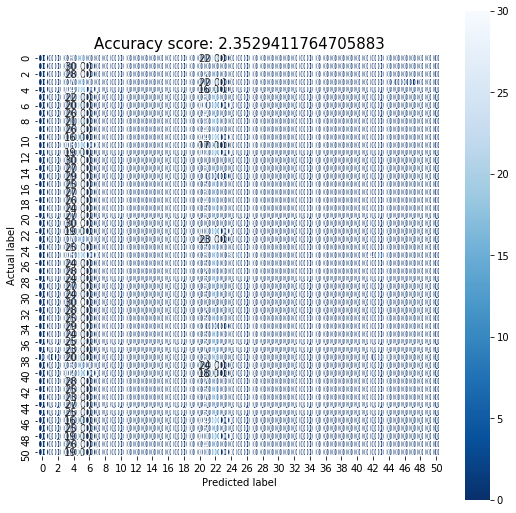

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(metrics.accuracy_score(predict, actual)*100)
plt.title(all_sample_title,size=15)